# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_rel, wilcoxon, t, chi2_contingency
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import OLSInfluence

# Cargo los datos

In [2]:
!wget https://raw.githubusercontent.com/bitazaratustra/proyecto_gv/main/data/base_ecocardio.csv

df = pd.read_csv('base_ecocardio.csv')
df.head()

Paciente  NAGUE +  vel it  Eeprim  AI vol index  rumble SEX  EDAD  \
0    BORDA DIEGO        1     NaN    14.2          35.9     NaN   M    23   
1    BORDA DIEGO        0     NaN    10.5          19.5     NaN   M    23   
2  CARDOZO CLARA        0     NaN    11.4          40.2     NaN   F    59   
3  CARDOZO CLARA        1     NaN    17.0          52.2     NaN   F    59   
4    CONDORI ANA        0     NaN     6.7          14.5     NaN   F    43   

   POSDIAL  PSAP  ...  VD3dil    TEy  VCImin  Colap  Ssup  Dsup  SFF  Portmx  \
0        0   NaN  ...     0.0  296.0       3     70    68    50   58      17   
1        1   NaN  ...     1.0  330.0       3     67    59    36   62      14   
2        1   NaN  ...     0.0  250.0       9     36    20    18   53      19   
3        0   NaN  ...     0.0  275.0      16     11    23    22   51      21   
4        1   NaN  ...     0.0  264.0       0    100    18    13   58      14   

   Portmin  derra  
0       12      0  
1       12      0  
2       14      1  
3       13      1  
4       11      0  

[5 rows x 111 columns]

In [ ]:
categorical_vars = ['SEX', 'HTA', 'DBT', 'DLP', 'AHF', 'TBQ', 'BB', 'BCA', 'IECA', 'ARA II', 'ARNI', 'MRA', 'SGLT', 'INSULINA']


bins = [0, 30, 45, 60, 75, 100]
labels = ['18-30', '31-45', '46-60', '61-75', '76+']
df['Edad_Rango'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=False)

df_freq = df[df['POSDIAL'] == 1]


def get_freq_table(var):
    freq = df_freq[var].value_counts()
    percentage = df_freq[var].value_counts(normalize=True) * 100
    return freq, percentage


table1_data = []


for var in categorical_vars:
    freq, percentage = get_freq_table(var)


    if var == 'SEX':
        categories = {'F': 'Mujer'}
    elif var == 'HTA':
        categories = {1: 'HTA'}
    elif var == 'DBT':
        categories = {1: 'Diabetes'}
    elif var == 'DLP':
        categories = {1: 'Dislipidemia'}
    elif var == 'AHF':
        categories = {1: 'AHF'}
    elif var == 'TBQ':
        categories = {1: 'Tabaquismo'}
    elif var == 'BB':
        categories = {1: 'BB'}
    elif var == 'BCA':
        categories = {1: 'BCA'}
    elif var == 'IECA':
        categories = {1: 'IECA'}
    elif var == 'ARA II':
        categories = {1: 'ARA II'}
    elif var == 'ARNI':
        categories = {1: 'ARNI'}
    elif var == 'MRA':
        categories = {1: 'MRA'}
    elif var == 'SGLT':
        categories = {1: 'SGLT'}
    elif var == 'INSULINA':
        categories = {1: 'INSULINA'}

    else:
        categories = {}


    for category, freq_val in freq.items():
        if category in categories:
            category_name = categories.get(category, category)
            table1_data.append([category_name, freq_val, f"{percentage[category]:.2f}%"])


    missing_categories = set(categories.values()) - set(freq.index)
    for missing_category in missing_categories:

        table1_data.append([missing_category, 0, "0.00%"])

age_freq, age_percentage = get_freq_table('Edad_Rango')
for age, freq_val in age_freq.items():
    table1_data.append([f"Edad {age}", freq_val, f"{age_percentage[age]:.2f}%"])

table1 = pd.DataFrame(table1_data, columns=["Categoría", "Frecuencia Abs", "Frecuencia Relativa (%)"])

table1 = table1[table1["Frecuencia Abs"] > 0]
df.drop(columns='Edad_Rango', inplace=True)
table1

Categoría  Frecuencia Abs Frecuencia Relativa (%)
0          Mujer              30                  39.47%
2            HTA              56                  75.68%
4       Diabetes              22                  28.95%
6   Dislipidemia               6                   7.89%
9     Tabaquismo              10                  13.16%
11            BB              16                  21.05%
13           BCA              18                  23.68%
15          IECA              12                  15.79%
17        ARA II              18                  23.68%
19          ARNI               2                   2.63%
21           MRA               2                   2.63%
24      INSULINA              12                  15.79%
26    Edad 46-60              34                  44.74%
27    Edad 31-45              18                  23.68%
28    Edad 18-30              10                  13.16%
29    Edad 61-75              10                  13.16%
30      Edad 76+               4                   5.26%

# EDA

════════════════════════════════════════════════════════════
Variables excluidas por >30% missing:
{'TapPsap', 'vel it', 'grIT', 'PSAP'}
════════════════════════════════════════════════════════════

[ANÁLISIS DE VALORES PERDIDOS - VARIABLES INCLUIDAS]
+--------------+-------------------+-----------------+------------------+-----------------+----------+----------+----------+----------+-------------------------+
|   Variable   | Pacientes Totales | Pre-Missing (%) | Post-Missing (%) | Pares Completos | MCAR_HTA | MCAR_DBT | MCAR_SEX | MCAR_DLP | Significativas (p<0.05) |
+--------------+-------------------+-----------------+------------------+-----------------+----------+----------+----------+----------+-------------------------+
|    Eeprim    |        38         |      0.0%       |       0.0%       |       38        |  1.000   |  1.000   |  1.000   |  1.000   |            0            |
| AI vol index |        38         |      0.0%       |       0.0%       |       38        |  1.000  

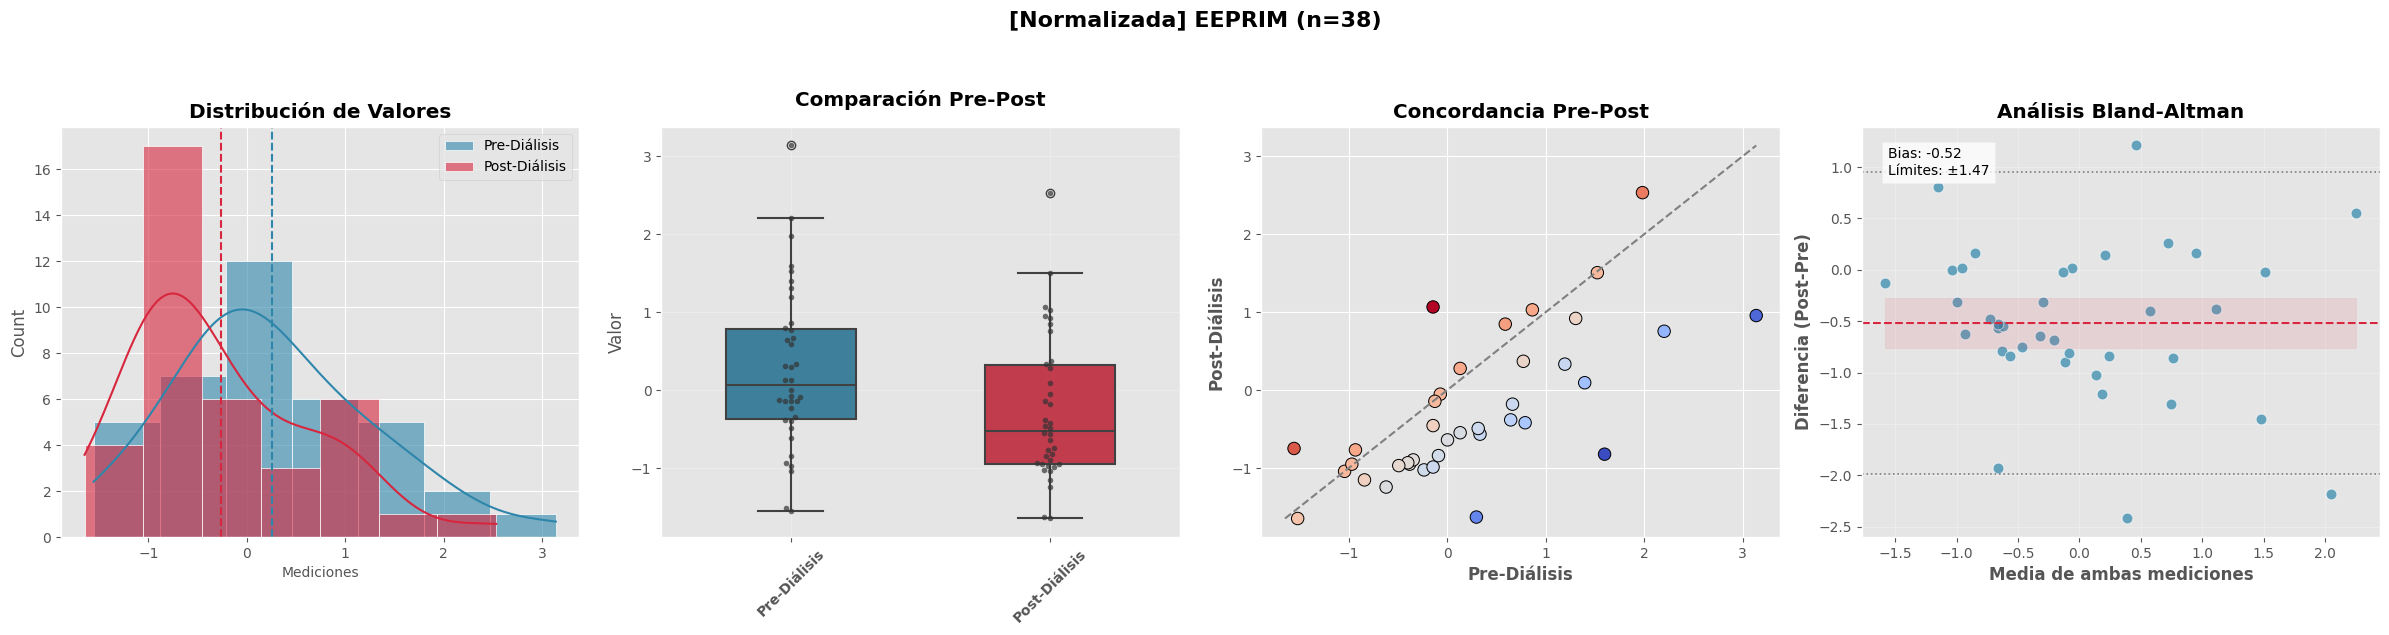


    📊 ANÁLISIS ESTADÍSTICO - EEPRIM
    ▪ Diferencia media (IC 95%): -0.52 (-0.76 a -0.27)
    ▪ Prueba de normalidad: W = 0.971, p = 0.4276
    ▪ Prueba seleccionada: t(37) = 4.25, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.69
    
────────────────────────────────────────────────────────────────────────────────


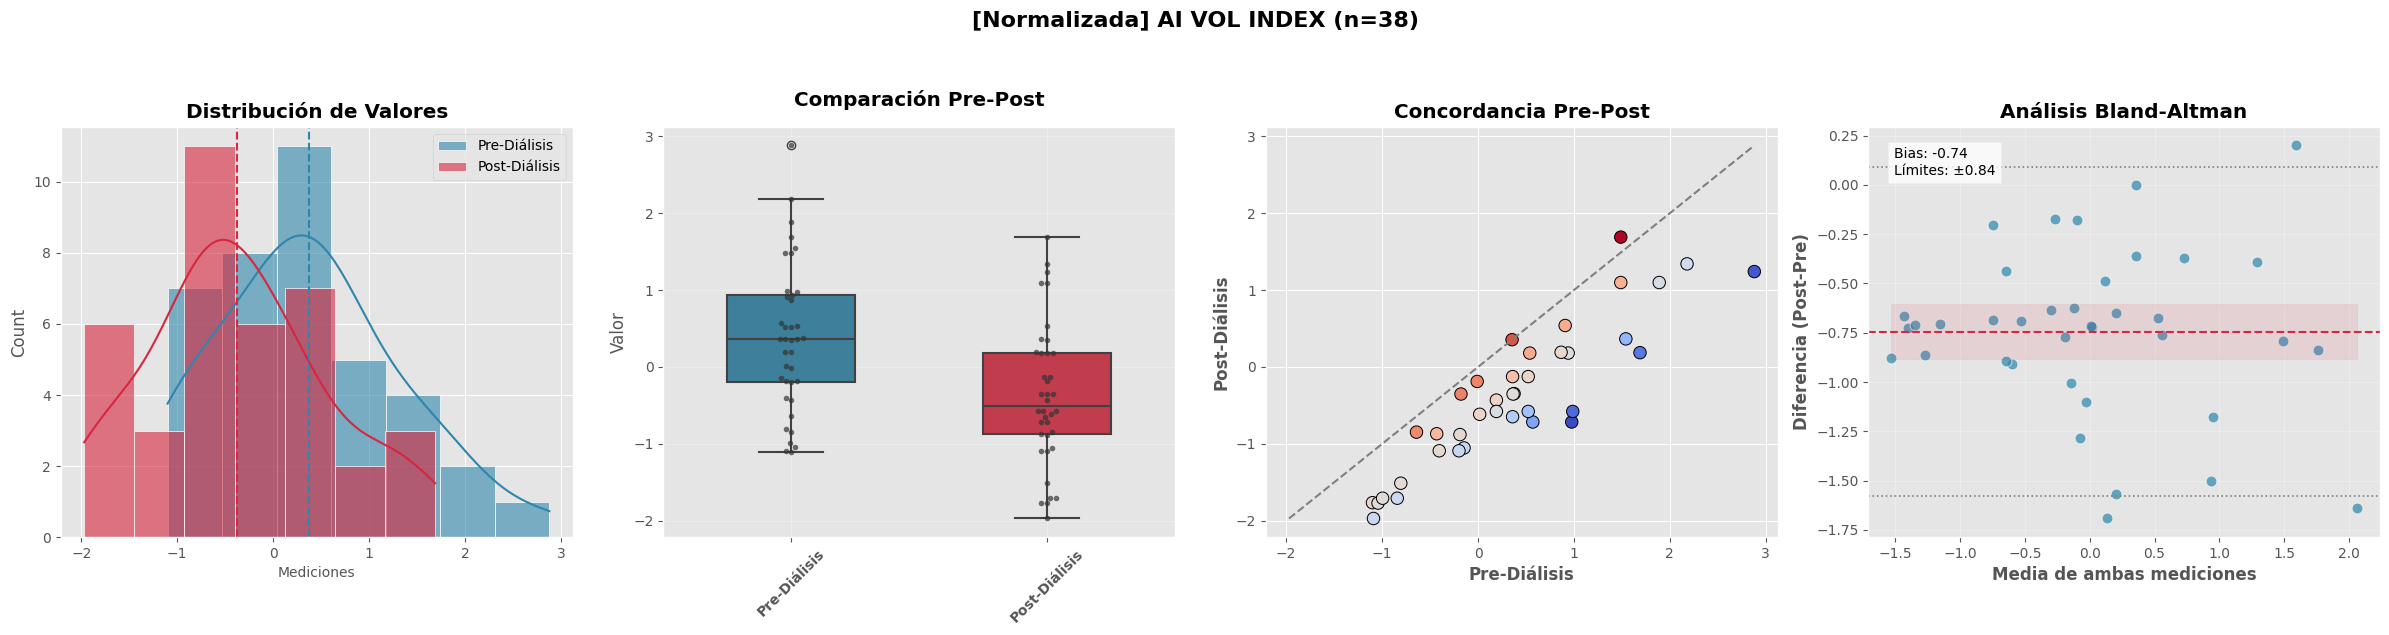


    📊 ANÁLISIS ESTADÍSTICO - AI VOL INDEX
    ▪ Diferencia media (IC 95%): -0.74 (-0.88 a -0.60)
    ▪ Prueba de normalidad: W = 0.957, p = 0.1486
    ▪ Prueba seleccionada: t(37) = 10.75, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -1.74
    
────────────────────────────────────────────────────────────────────────────────


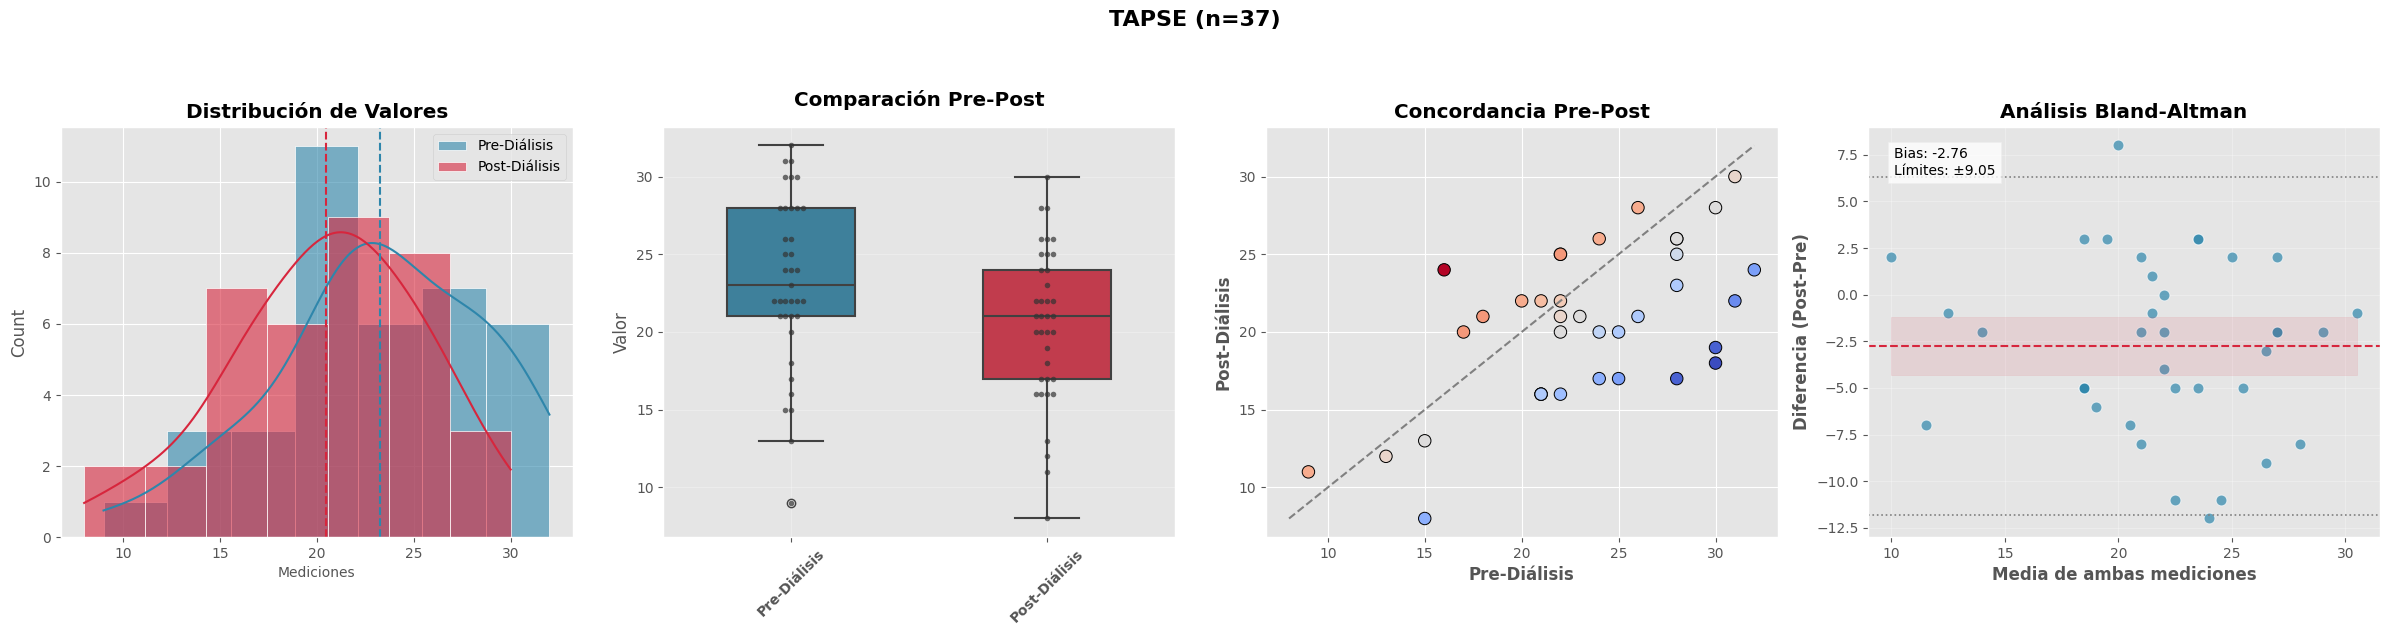


    📊 ANÁLISIS ESTADÍSTICO - TAPSE
    ▪ Diferencia media (IC 95%): -2.76 (-4.30 a -1.22)
    ▪ Prueba de normalidad: W = 0.974, p = 0.5302
    ▪ Prueba seleccionada: t(36) = 3.63, p = 0.0009
    ▪ Tamaño del efecto (Cohen's d): -0.60
    
────────────────────────────────────────────────────────────────────────────────


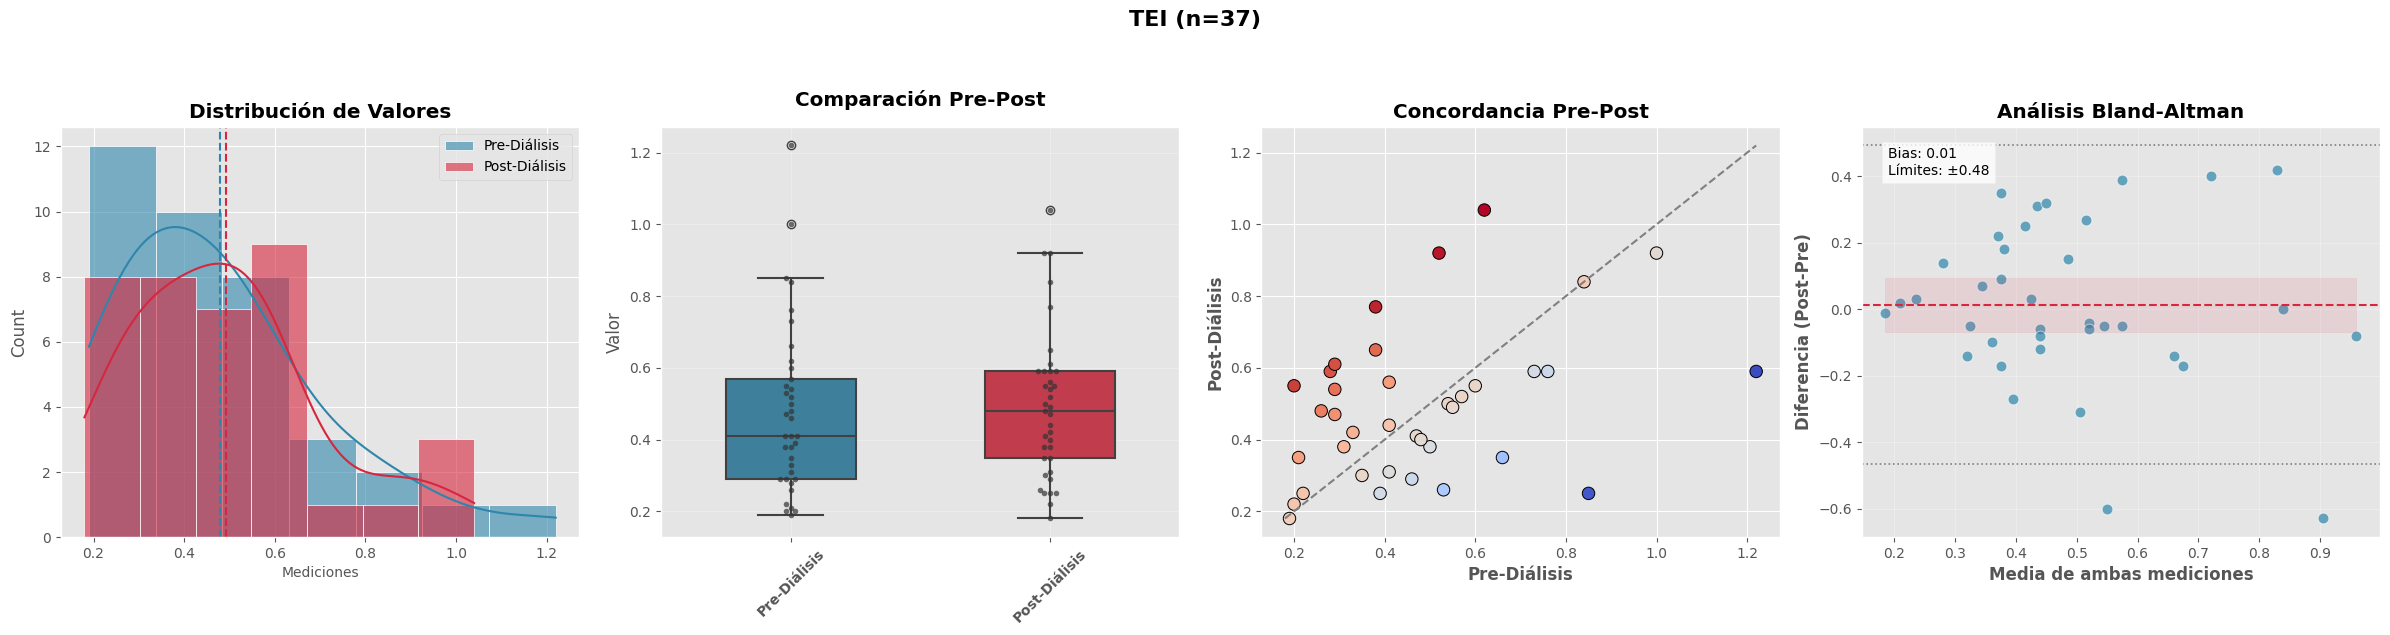


    📊 ANÁLISIS ESTADÍSTICO - TEI
    ▪ Diferencia media (IC 95%): 0.01 (-0.07 a 0.10)
    ▪ Prueba de normalidad: W = 0.946, p = 0.0725
    ▪ Prueba seleccionada: t(36) = -0.34, p = 0.7337
    ▪ Tamaño del efecto (Cohen's d): 0.06
    
────────────────────────────────────────────────────────────────────────────────


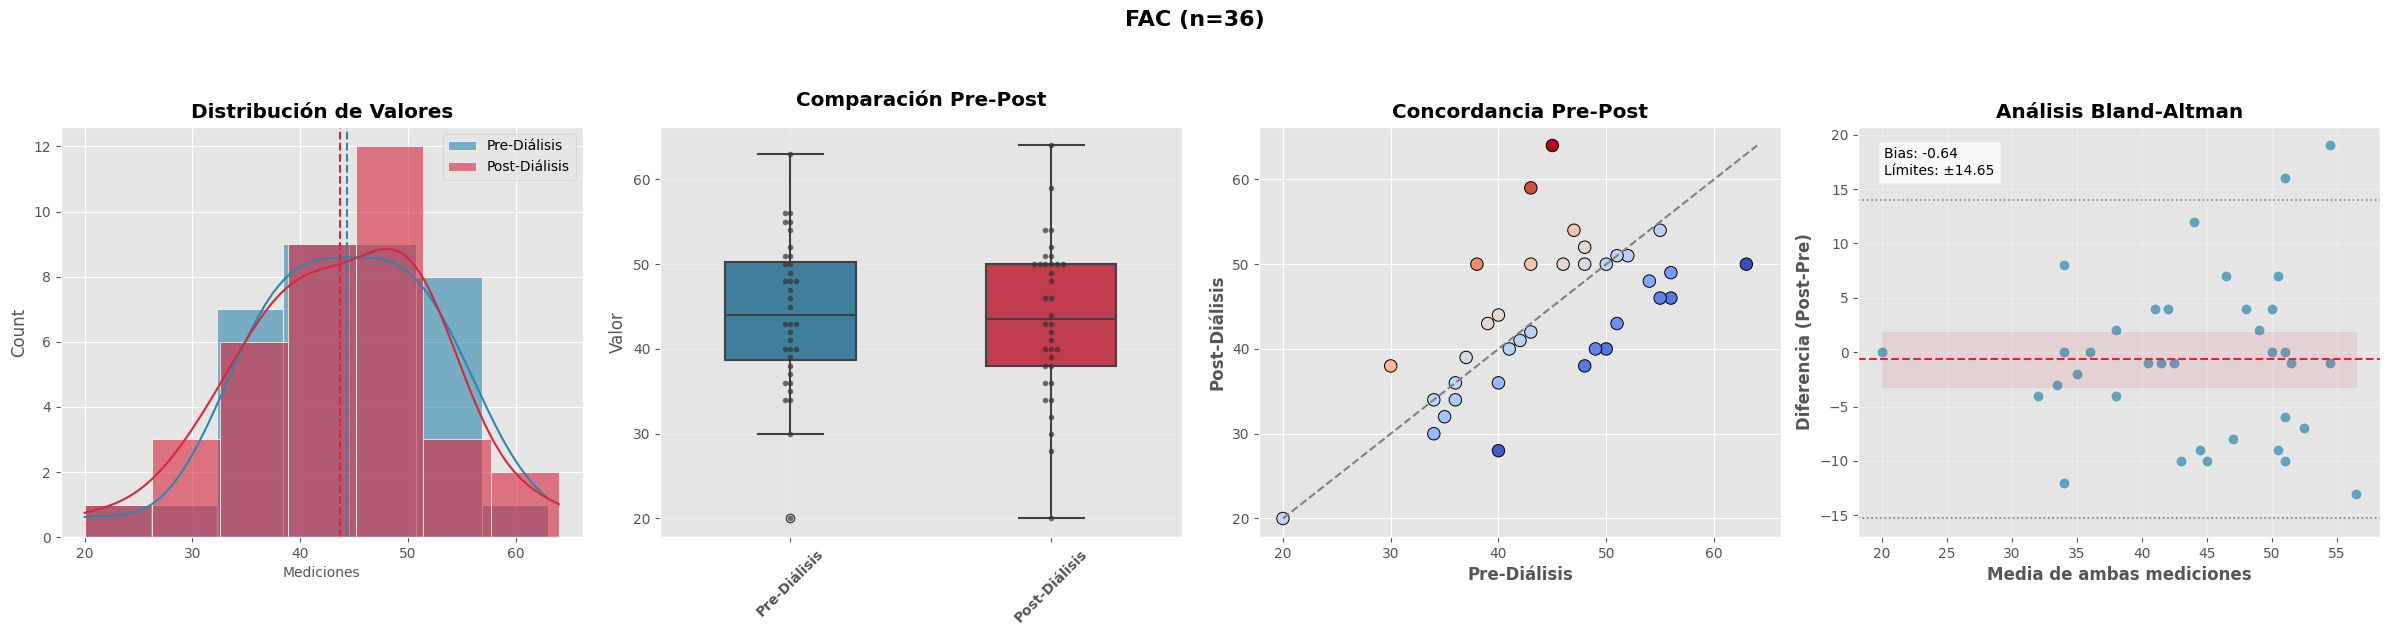


    📊 ANÁLISIS ESTADÍSTICO - FAC
    ▪ Diferencia media (IC 95%): -0.64 (-3.17 a 1.89)
    ▪ Prueba de normalidad: W = 0.956, p = 0.1670
    ▪ Prueba seleccionada: t(35) = 0.51, p = 0.6112
    ▪ Tamaño del efecto (Cohen's d): -0.09
    
────────────────────────────────────────────────────────────────────────────────


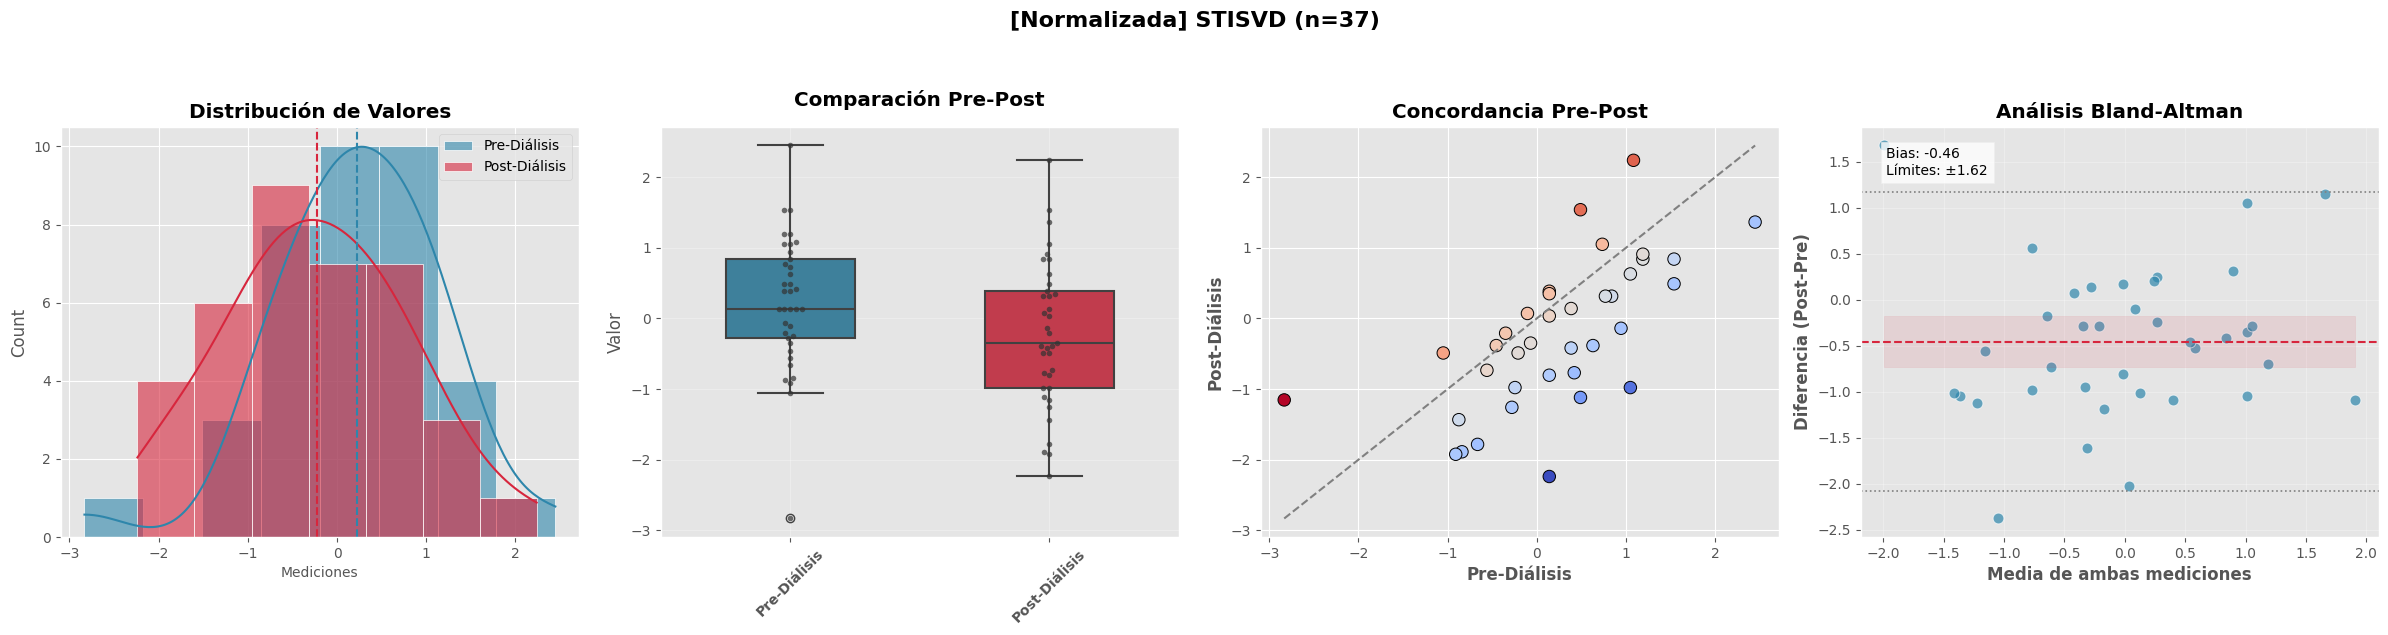


    📊 ANÁLISIS ESTADÍSTICO - STISVD
    ▪ Diferencia media (IC 95%): -0.46 (-0.73 a -0.18)
    ▪ Prueba de normalidad: W = 0.974, p = 0.5371
    ▪ Prueba seleccionada: t(36) = 3.34, p = 0.0019
    ▪ Tamaño del efecto (Cohen's d): -0.55
    
────────────────────────────────────────────────────────────────────────────────


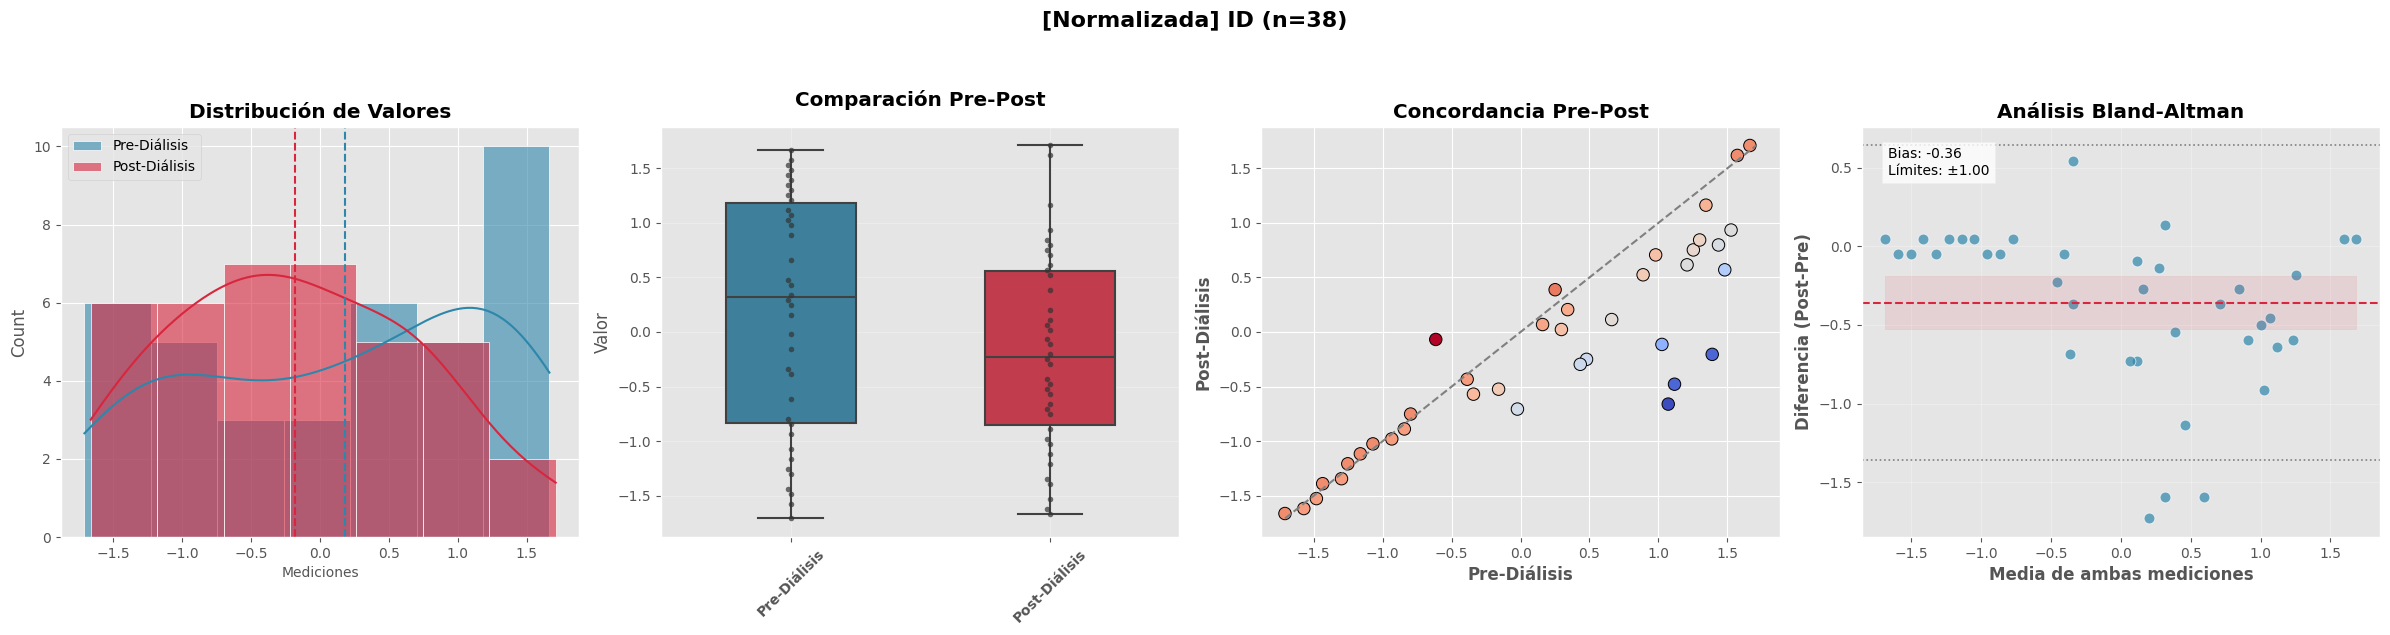


    📊 ANÁLISIS ESTADÍSTICO - ID
    ▪ Diferencia media (IC 95%): -0.36 (-0.53 a -0.19)
    ▪ Prueba de normalidad: W = 0.873, p = 0.0005
    ▪ Prueba seleccionada: Z = -3.872, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.70
    
────────────────────────────────────────────────────────────────────────────────


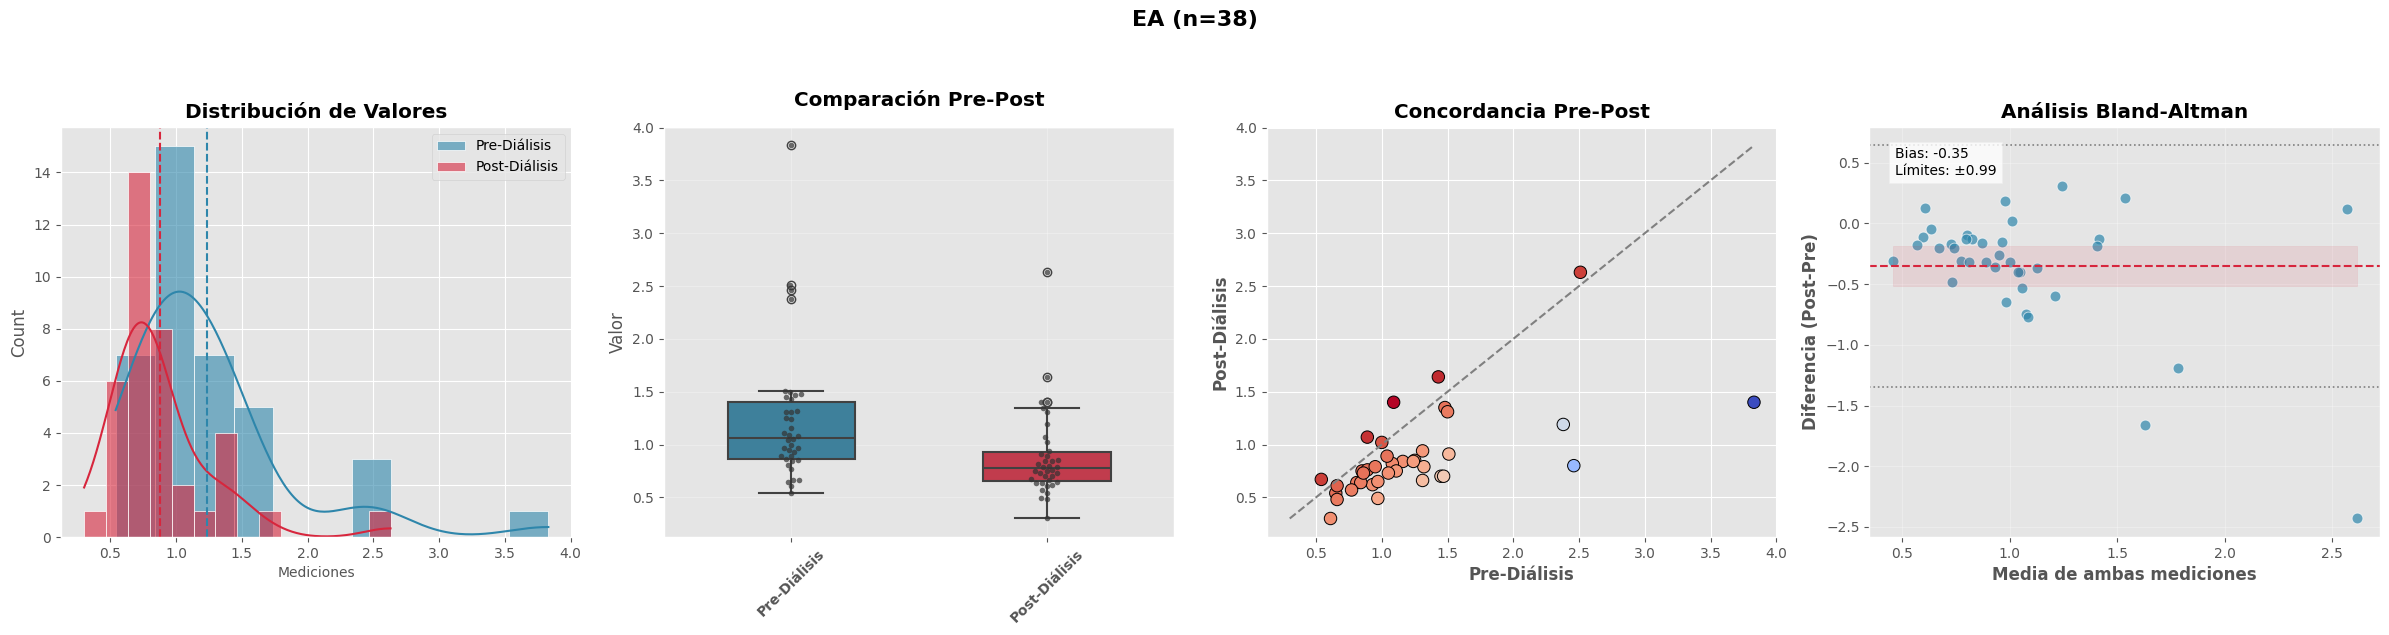


    📊 ANÁLISIS ESTADÍSTICO - EA
    ▪ Diferencia media (IC 95%): -0.35 (-0.52 a -0.19)
    ▪ Prueba de normalidad: W = 0.770, p = 0.0000
    ▪ Prueba seleccionada: Z = -4.430, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.69
    
────────────────────────────────────────────────────────────────────────────────


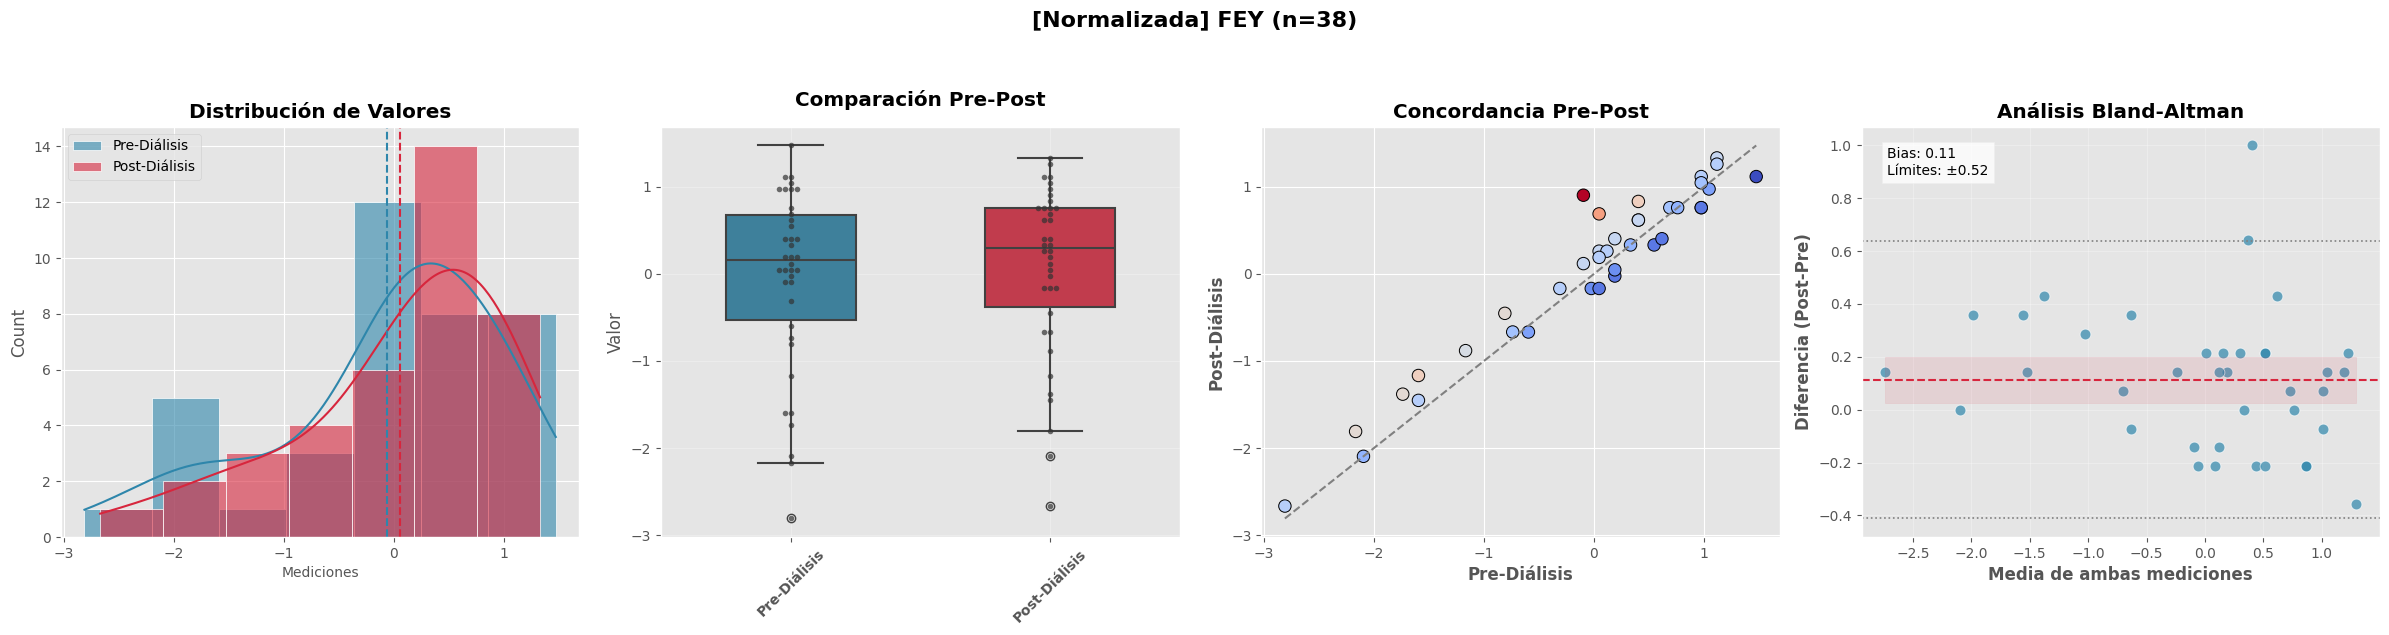


    📊 ANÁLISIS ESTADÍSTICO - FEY
    ▪ Diferencia media (IC 95%): 0.11 (0.02 a 0.20)
    ▪ Prueba de normalidad: W = 0.933, p = 0.0246
    ▪ Prueba seleccionada: Z = -2.705, p = 0.0317
    ▪ Tamaño del efecto (Cohen's d): 0.42
    
────────────────────────────────────────────────────────────────────────────────


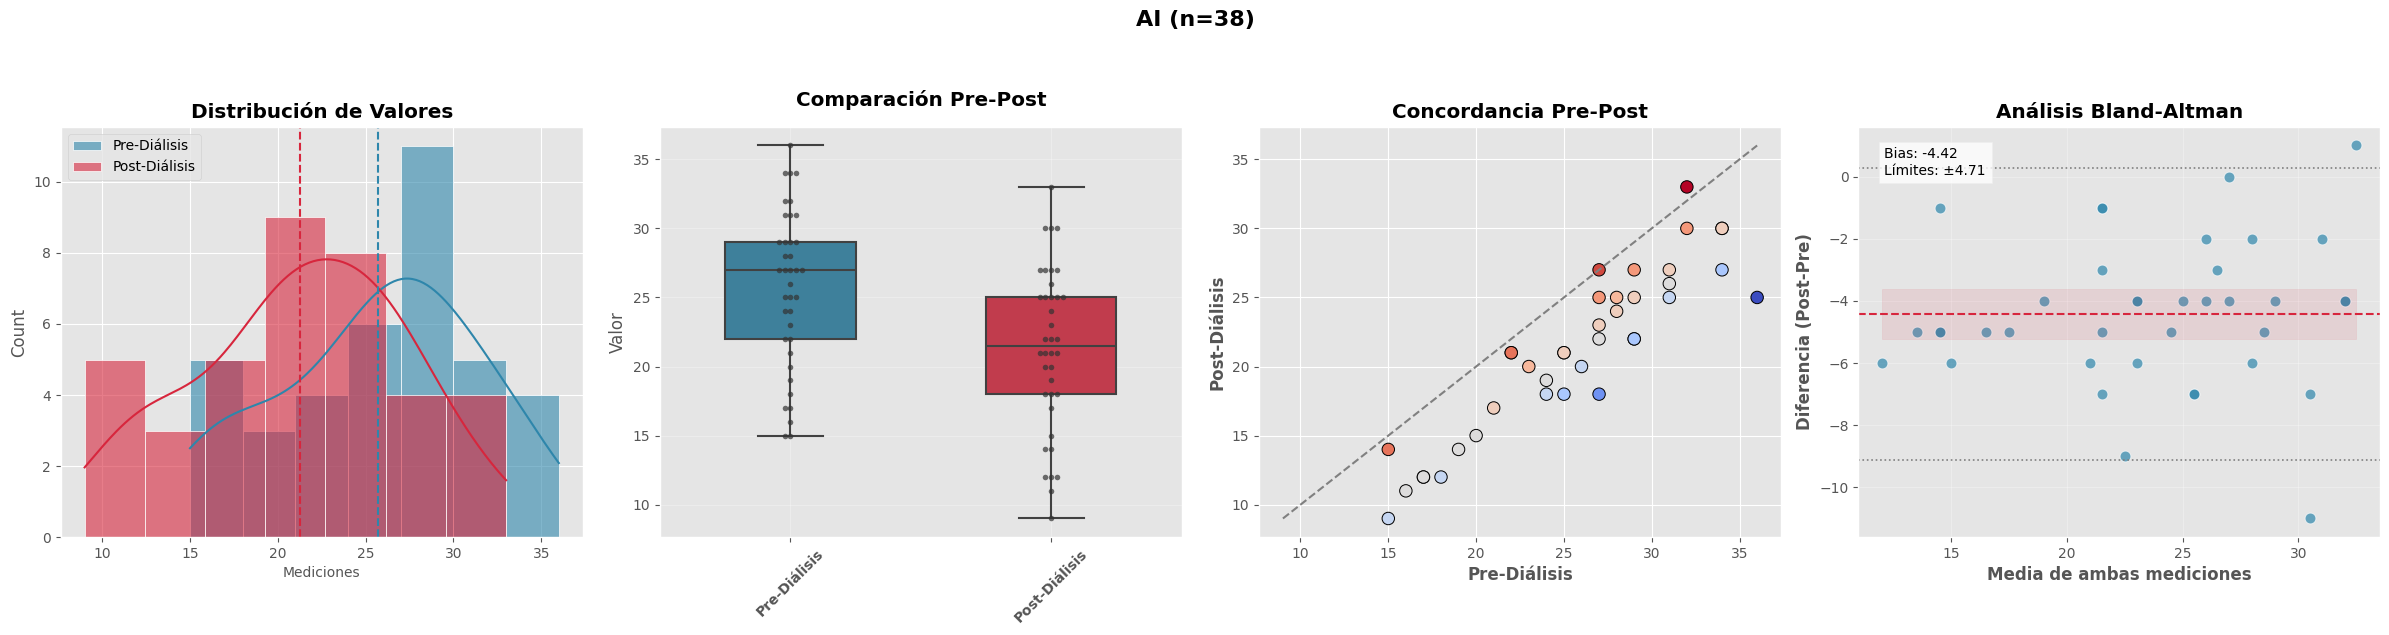


    📊 ANÁLISIS ESTADÍSTICO - AI
    ▪ Diferencia media (IC 95%): -4.42 (-5.21 a -3.63)
    ▪ Prueba de normalidad: W = 0.964, p = 0.2613
    ▪ Prueba seleccionada: t(37) = 11.35, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -1.84
    
────────────────────────────────────────────────────────────────────────────────


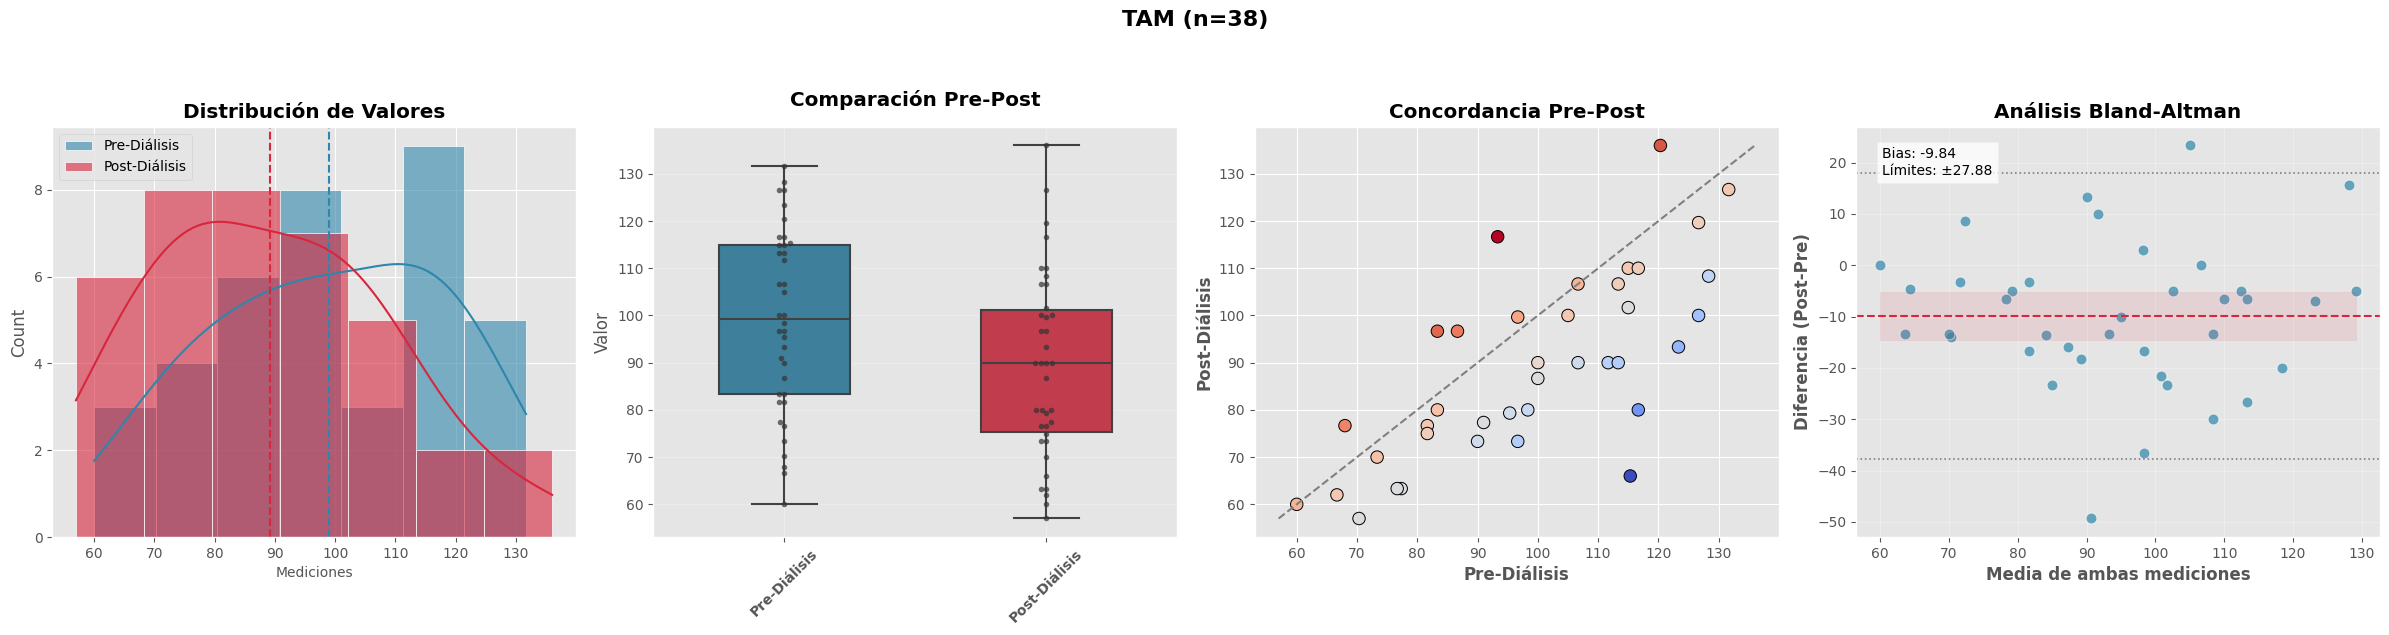


    📊 ANÁLISIS ESTADÍSTICO - TAM
    ▪ Diferencia media (IC 95%): -9.84 (-14.52 a -5.17)
    ▪ Prueba de normalidad: W = 0.977, p = 0.6025
    ▪ Prueba seleccionada: t(37) = 4.27, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.69
    
────────────────────────────────────────────────────────────────────────────────


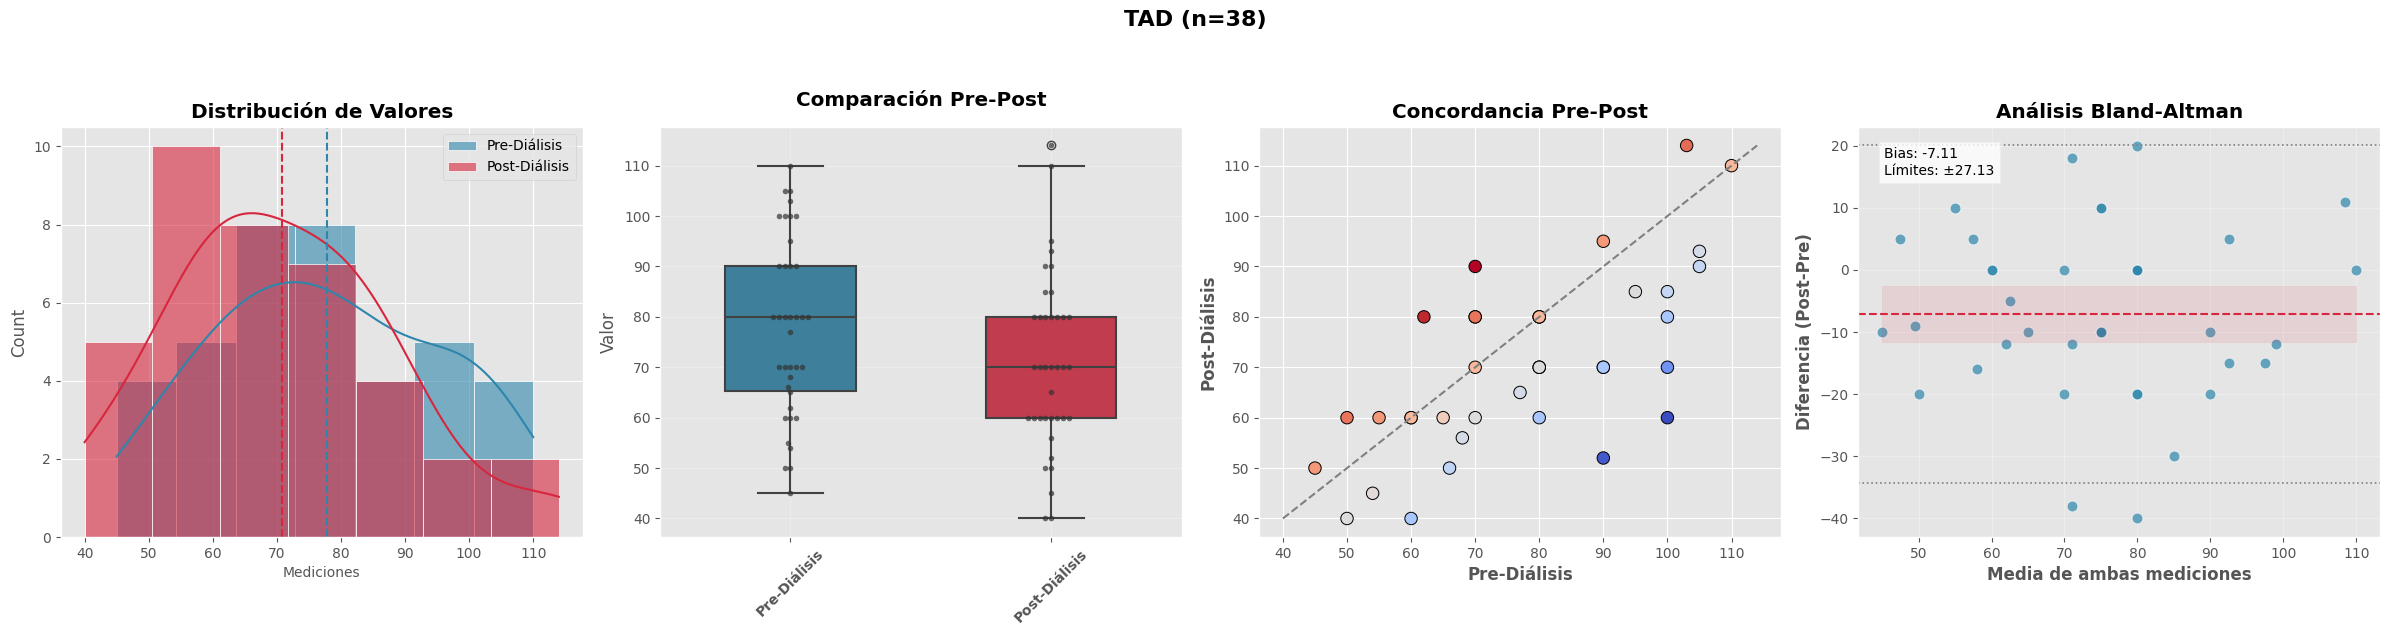


    📊 ANÁLISIS ESTADÍSTICO - TAD
    ▪ Diferencia media (IC 95%): -7.11 (-11.66 a -2.56)
    ▪ Prueba de normalidad: W = 0.969, p = 0.3722
    ▪ Prueba seleccionada: t(37) = 3.16, p = 0.0031
    ▪ Tamaño del efecto (Cohen's d): -0.51
    
────────────────────────────────────────────────────────────────────────────────


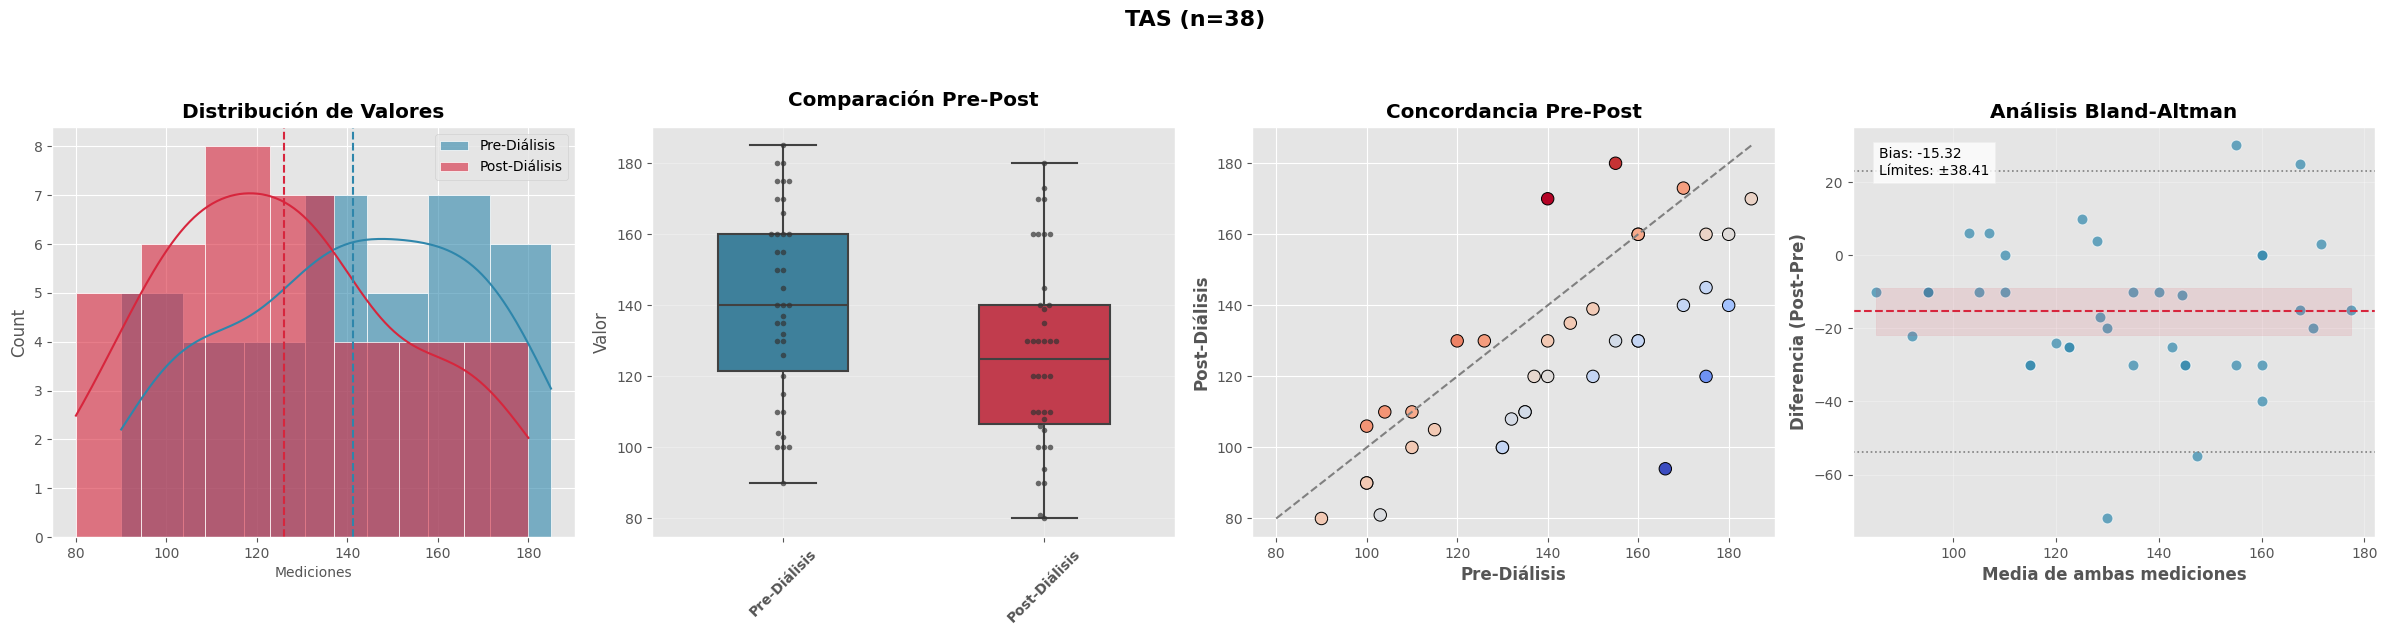


    📊 ANÁLISIS ESTADÍSTICO - TAS
    ▪ Diferencia media (IC 95%): -15.32 (-21.76 a -8.87)
    ▪ Prueba de normalidad: W = 0.960, p = 0.1852
    ▪ Prueba seleccionada: t(37) = 4.82, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.78
    
────────────────────────────────────────────────────────────────────────────────


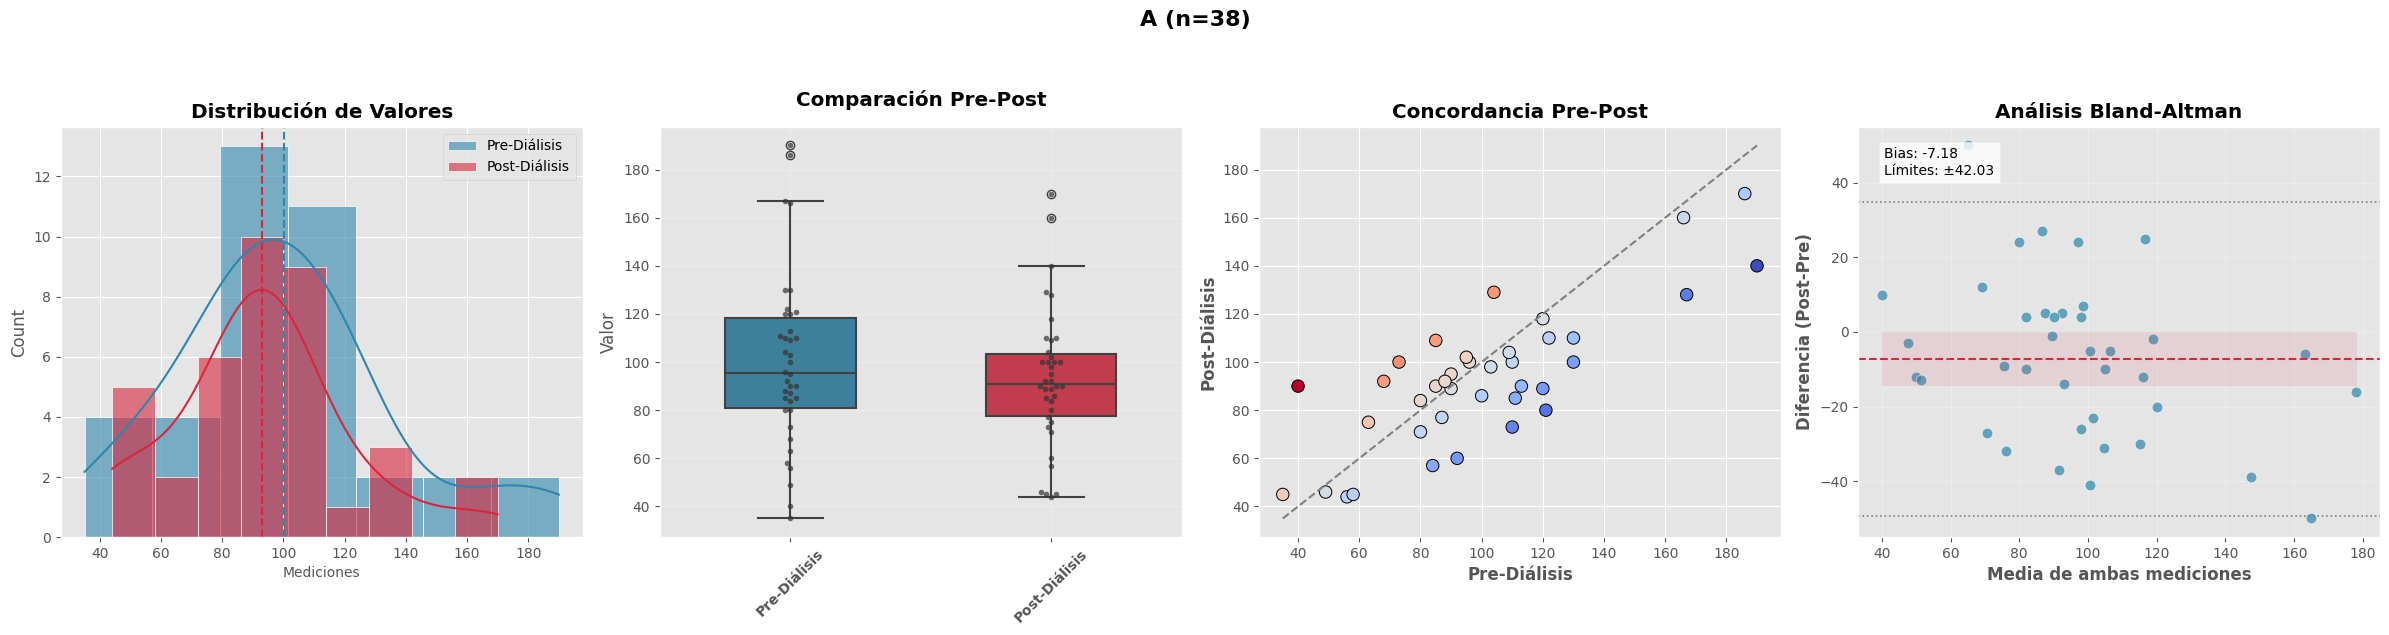


    📊 ANÁLISIS ESTADÍSTICO - A
    ▪ Diferencia media (IC 95%): -7.18 (-14.23 a -0.14)
    ▪ Prueba de normalidad: W = 0.983, p = 0.8322
    ▪ Prueba seleccionada: t(37) = 2.07, p = 0.0460
    ▪ Tamaño del efecto (Cohen's d): -0.34
    
────────────────────────────────────────────────────────────────────────────────


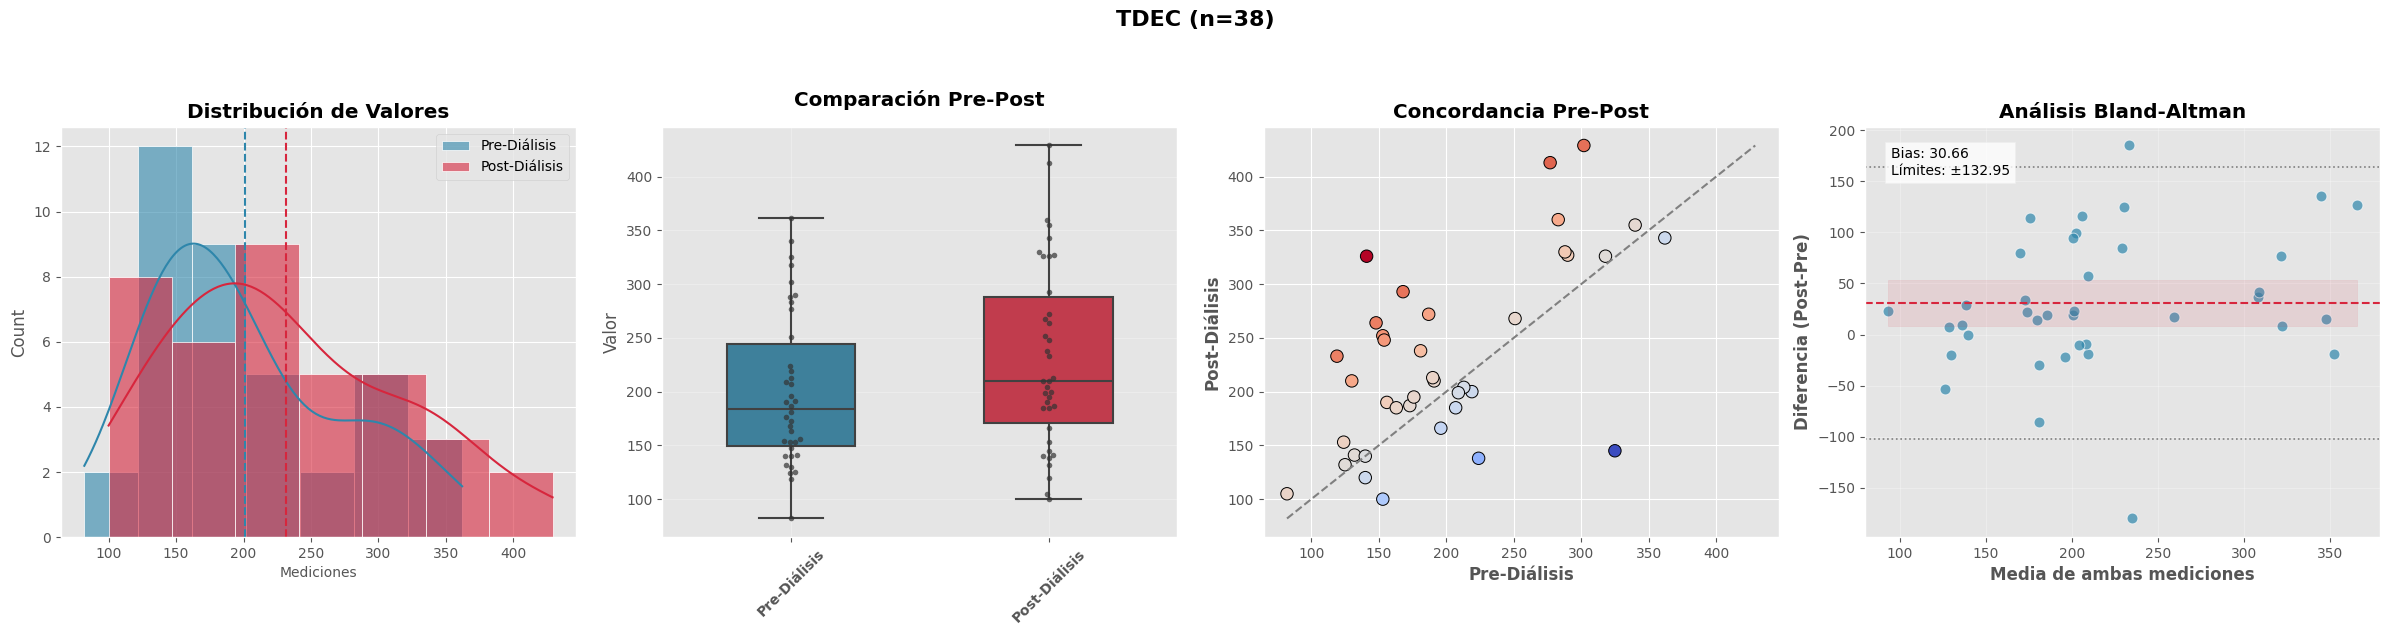


    📊 ANÁLISIS ESTADÍSTICO - TDEC
    ▪ Diferencia media (IC 95%): 30.66 (8.36 a 52.95)
    ▪ Prueba de normalidad: W = 0.953, p = 0.1101
    ▪ Prueba seleccionada: t(37) = -2.79, p = 0.0084
    ▪ Tamaño del efecto (Cohen's d): 0.45
    
────────────────────────────────────────────────────────────────────────────────


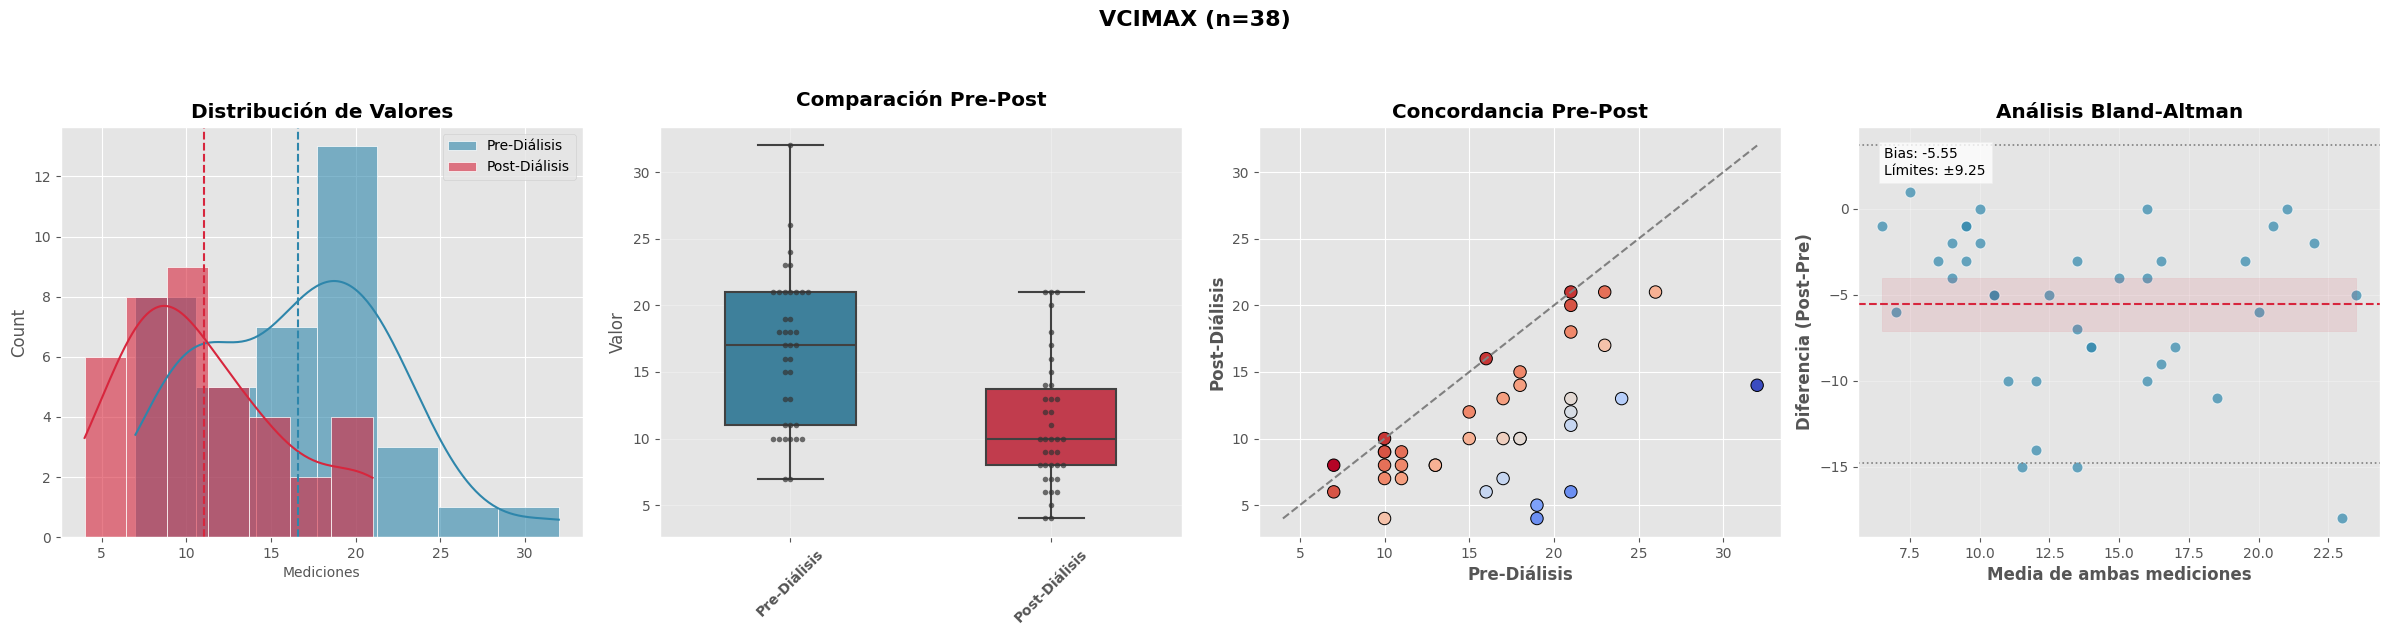


    📊 ANÁLISIS ESTADÍSTICO - VCIMAX
    ▪ Diferencia media (IC 95%): -5.55 (-7.10 a -4.00)
    ▪ Prueba de normalidad: W = 0.923, p = 0.0120
    ▪ Prueba seleccionada: Z = -5.330, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -1.18
    
────────────────────────────────────────────────────────────────────────────────


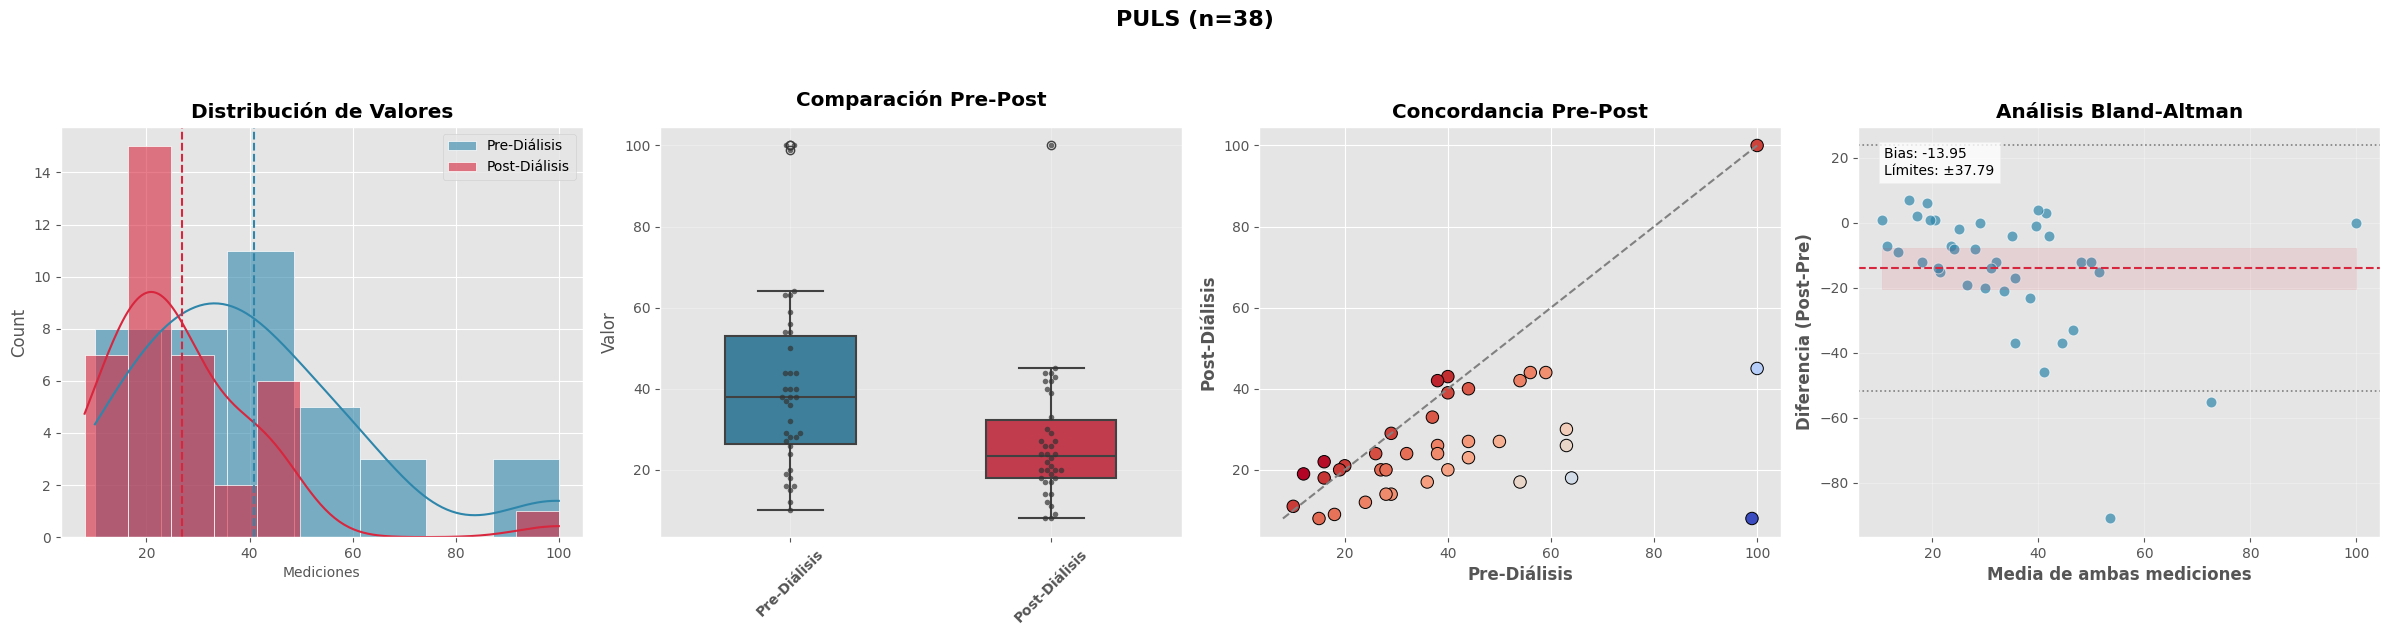


    📊 ANÁLISIS ESTADÍSTICO - PULS
    ▪ Diferencia media (IC 95%): -13.95 (-20.29 a -7.61)
    ▪ Prueba de normalidad: W = 0.803, p = 0.0000
    ▪ Prueba seleccionada: Z = -4.604, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.72
    
────────────────────────────────────────────────────────────────────────────────


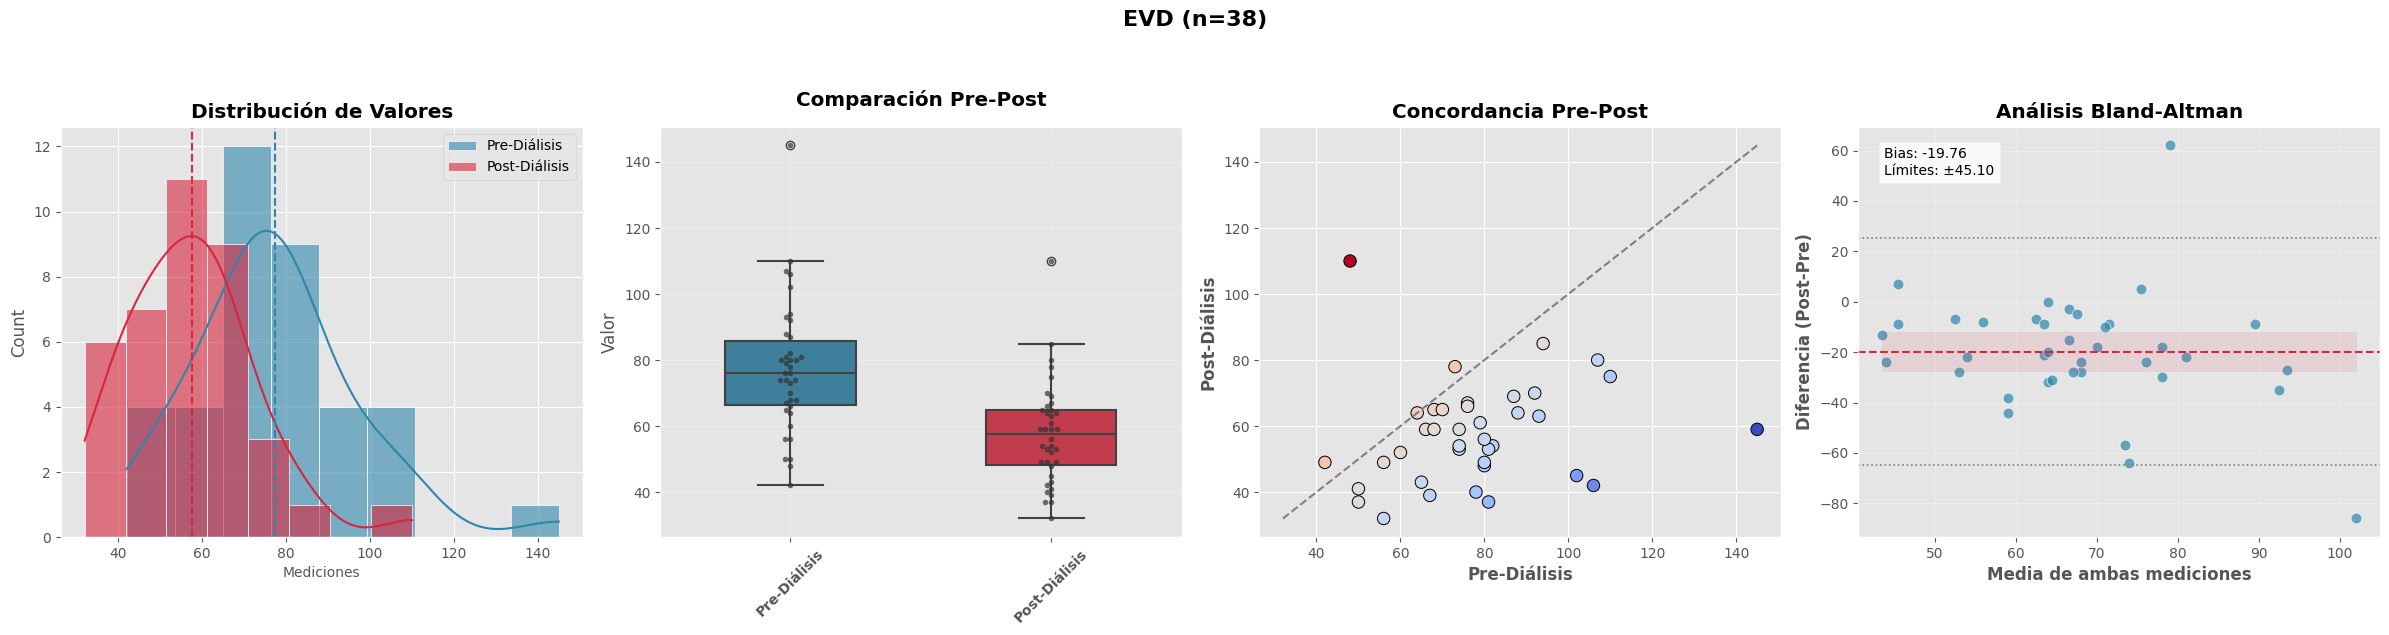


    📊 ANÁLISIS ESTADÍSTICO - EVD
    ▪ Diferencia media (IC 95%): -19.76 (-27.33 a -12.20)
    ▪ Prueba de normalidad: W = 0.891, p = 0.0014
    ▪ Prueba seleccionada: Z = -4.757, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.86
    
────────────────────────────────────────────────────────────────────────────────


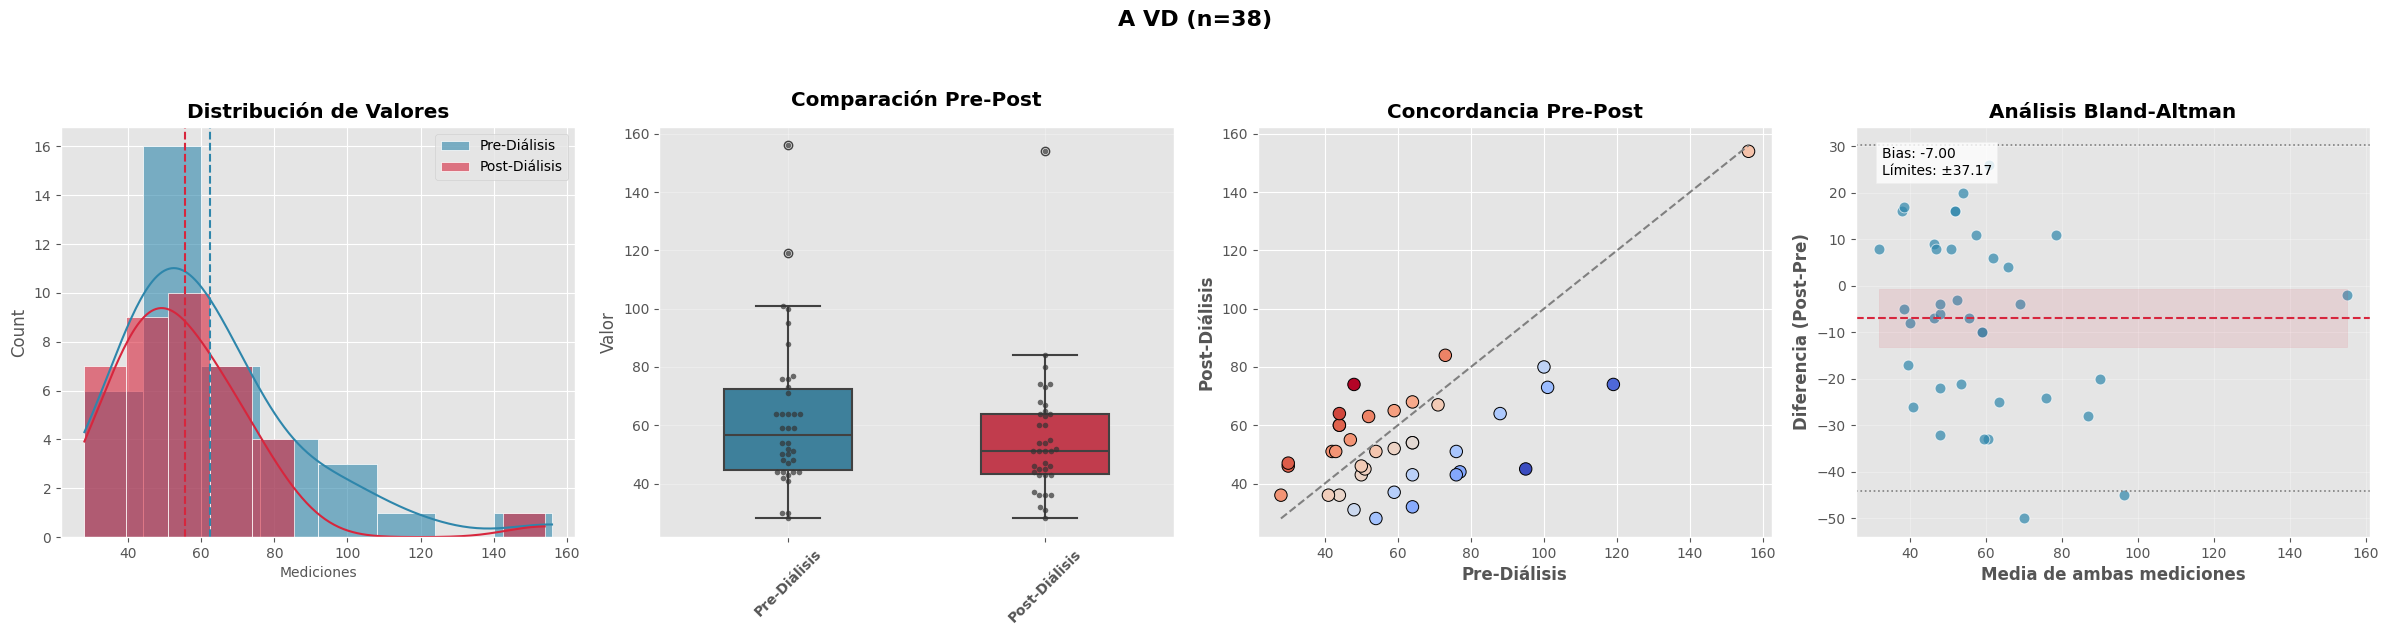


    📊 ANÁLISIS ESTADÍSTICO - A VD
    ▪ Diferencia media (IC 95%): -7.00 (-13.23 a -0.77)
    ▪ Prueba de normalidad: W = 0.968, p = 0.3378
    ▪ Prueba seleccionada: t(37) = 2.28, p = 0.0288
    ▪ Tamaño del efecto (Cohen's d): -0.37
    
────────────────────────────────────────────────────────────────────────────────


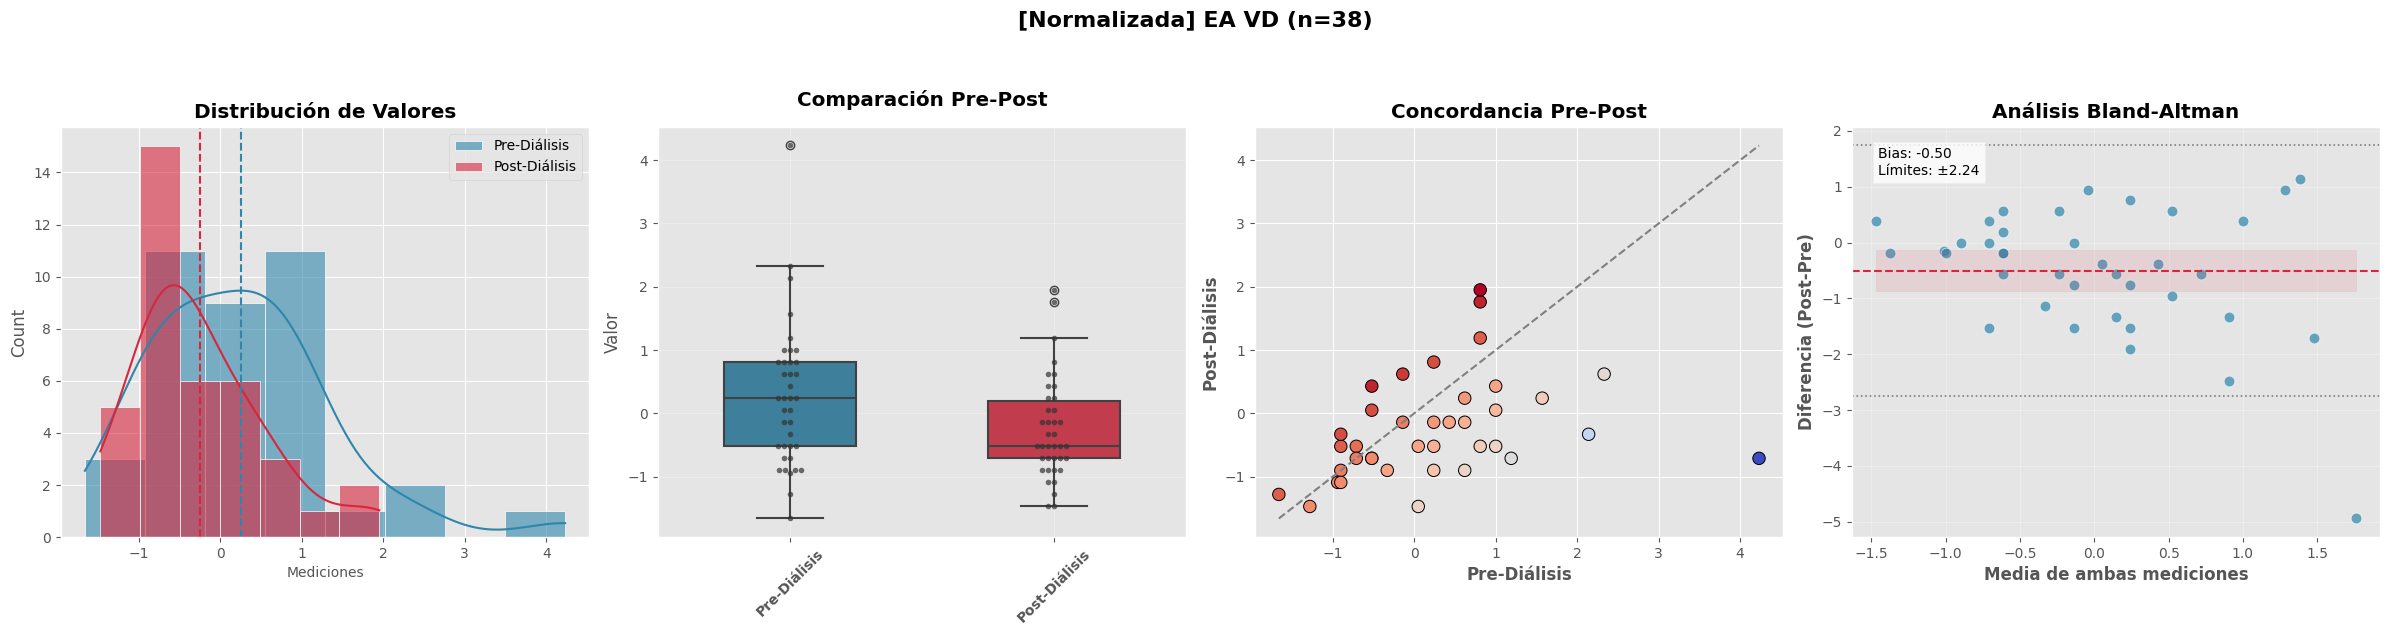


    📊 ANÁLISIS ESTADÍSTICO - EA VD
    ▪ Diferencia media (IC 95%): -0.50 (-0.87 a -0.12)
    ▪ Prueba de normalidad: W = 0.886, p = 0.0011
    ▪ Prueba seleccionada: Z = -2.915, p = 0.0171
    ▪ Tamaño del efecto (Cohen's d): -0.44
    
────────────────────────────────────────────────────────────────────────────────


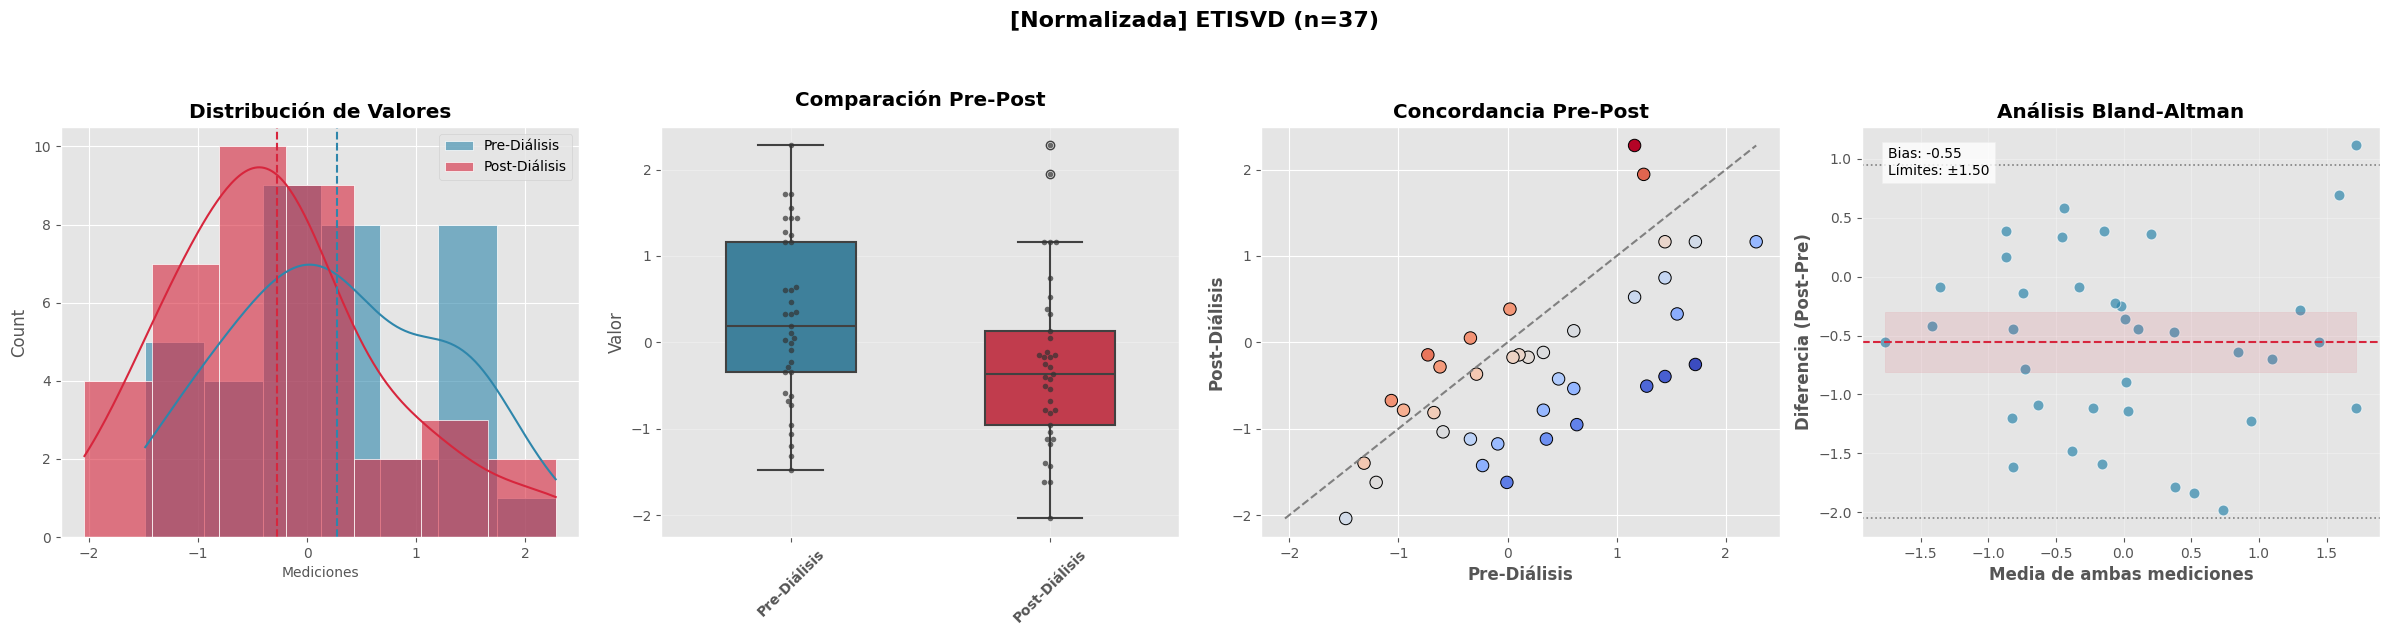


    📊 ANÁLISIS ESTADÍSTICO - ETISVD
    ▪ Diferencia media (IC 95%): -0.55 (-0.81 a -0.30)
    ▪ Prueba de normalidad: W = 0.983, p = 0.8152
    ▪ Prueba seleccionada: t(36) = 4.39, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.72
    
────────────────────────────────────────────────────────────────────────────────


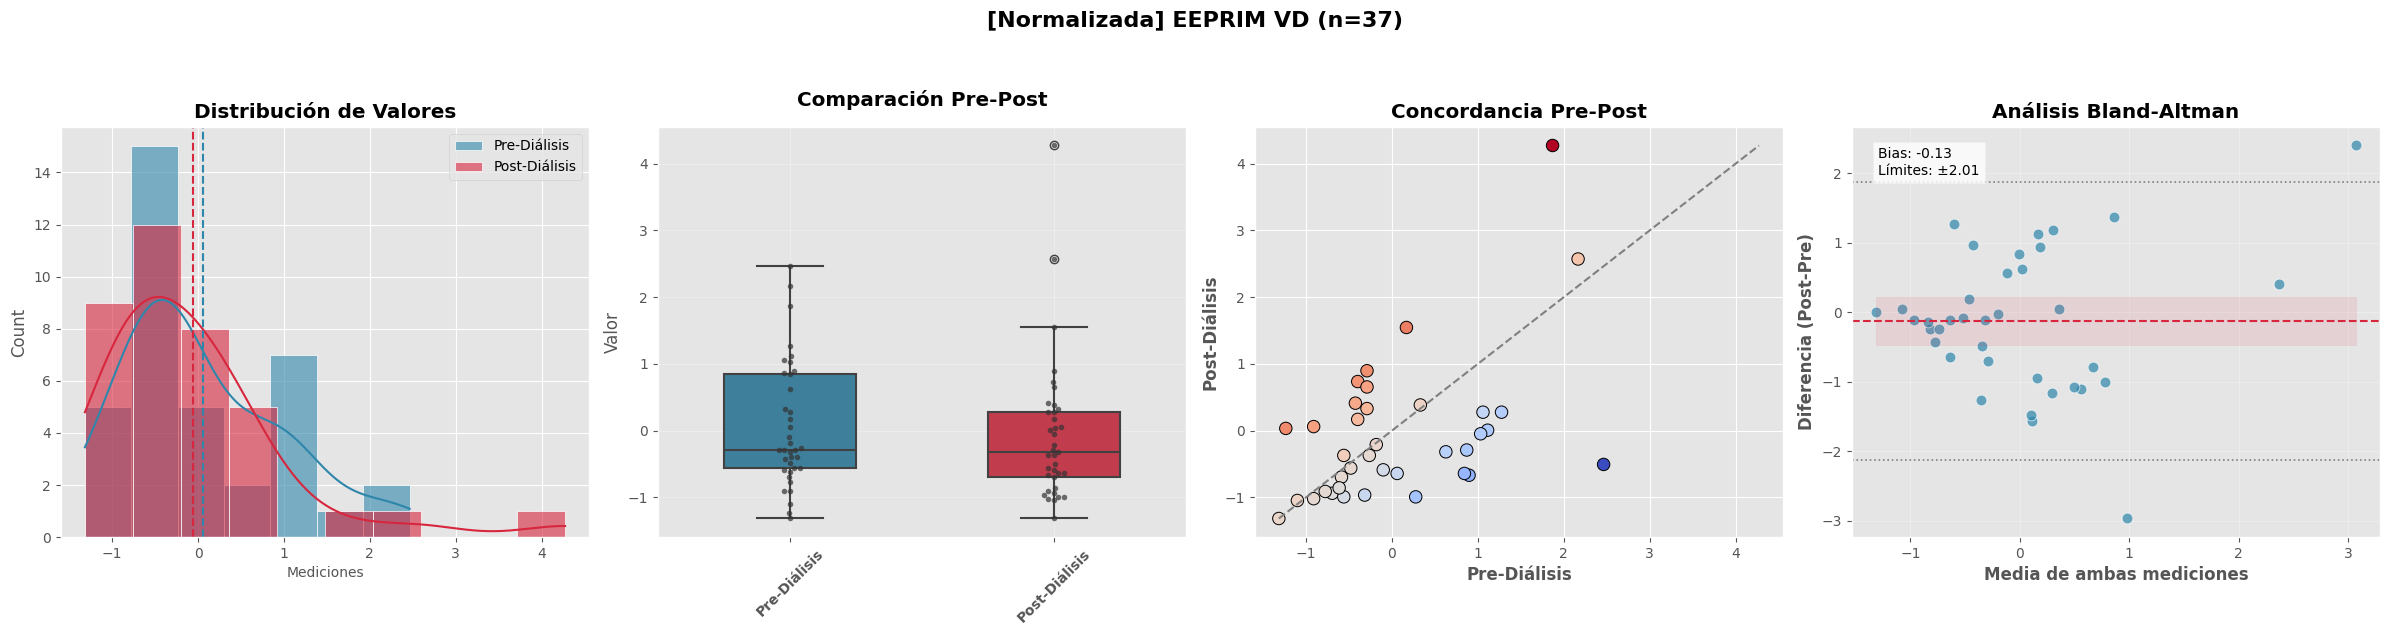


    📊 ANÁLISIS ESTADÍSTICO - EEPRIM VD
    ▪ Diferencia media (IC 95%): -0.13 (-0.47 a 0.21)
    ▪ Prueba de normalidad: W = 0.980, p = 0.7241
    ▪ Prueba seleccionada: t(36) = 0.75, p = 0.4578
    ▪ Tamaño del efecto (Cohen's d): -0.12
    
────────────────────────────────────────────────────────────────────────────────


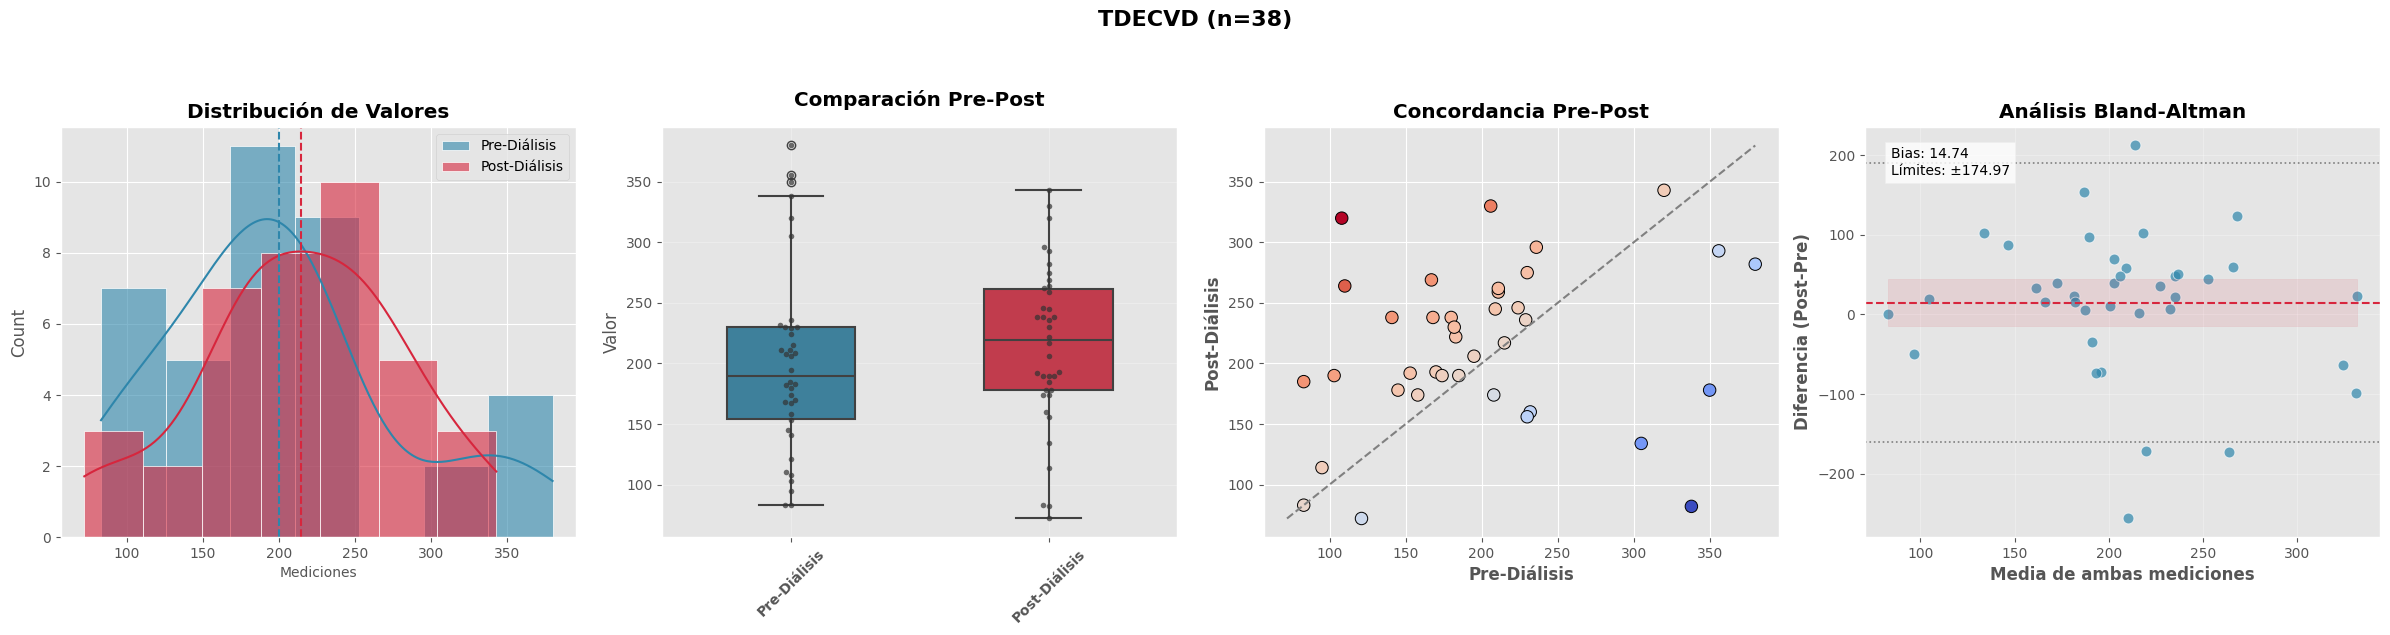


    📊 ANÁLISIS ESTADÍSTICO - TDECVD
    ▪ Diferencia media (IC 95%): 14.74 (-14.61 a 44.08)
    ▪ Prueba de normalidad: W = 0.930, p = 0.0197
    ▪ Prueba seleccionada: Z = -1.893, p = 0.0925
    ▪ Tamaño del efecto (Cohen's d): 0.17
    
────────────────────────────────────────────────────────────────────────────────


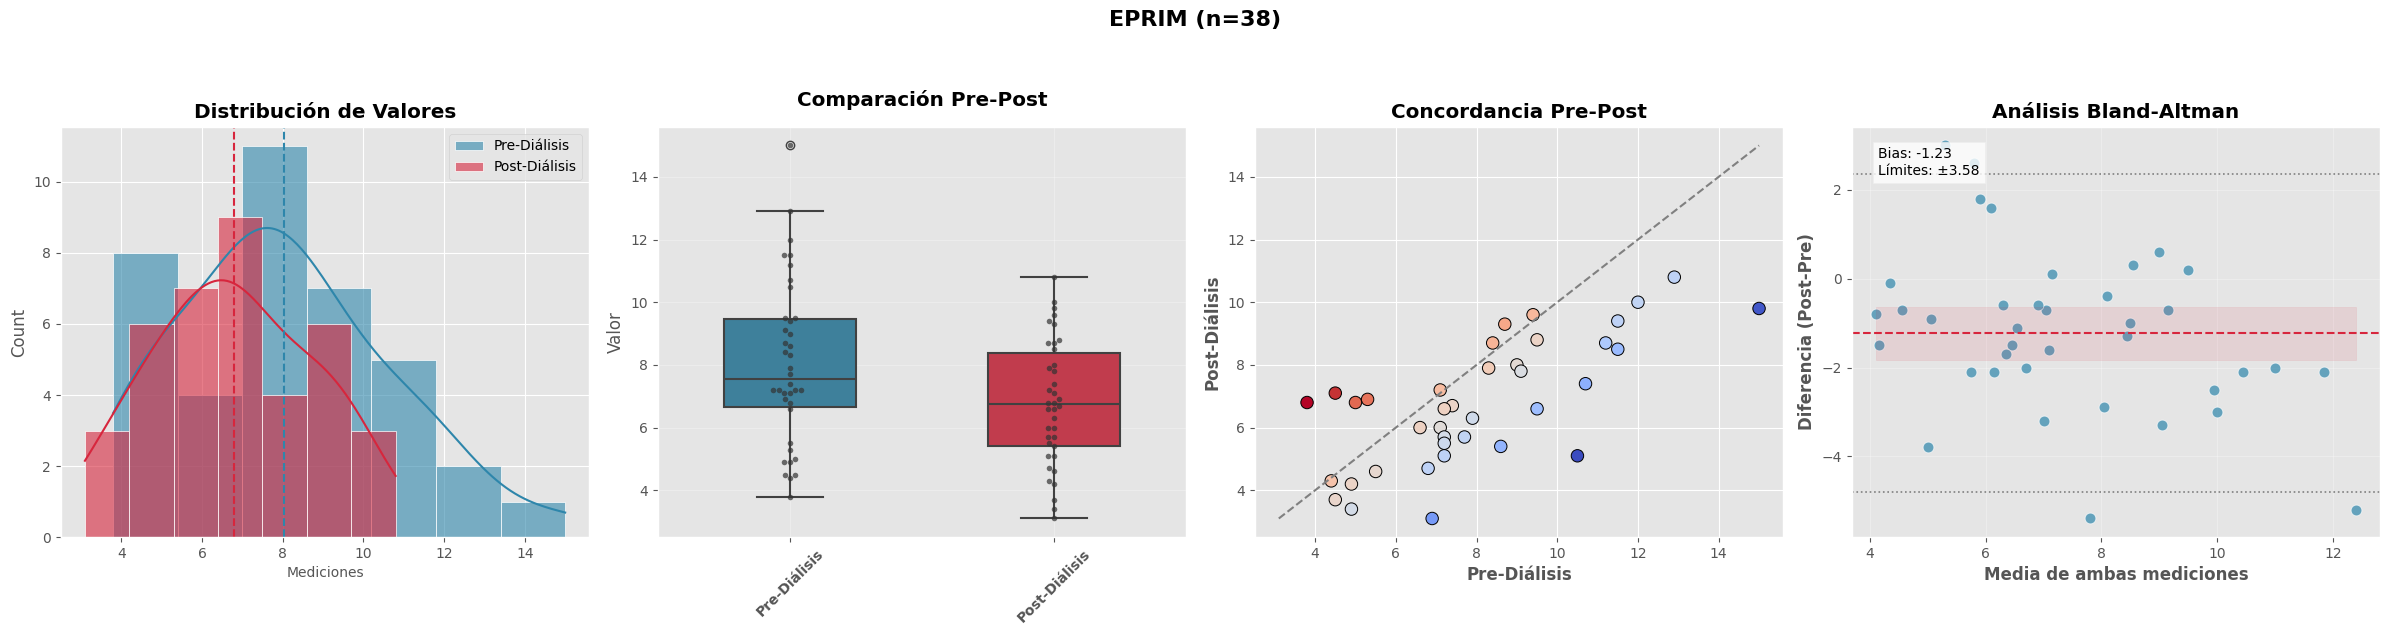


    📊 ANÁLISIS ESTADÍSTICO - EPRIM
    ▪ Diferencia media (IC 95%): -1.23 (-1.83 a -0.63)
    ▪ Prueba de normalidad: W = 0.976, p = 0.5701
    ▪ Prueba seleccionada: t(37) = 4.15, p = 0.0002
    ▪ Tamaño del efecto (Cohen's d): -0.67
    
────────────────────────────────────────────────────────────────────────────────


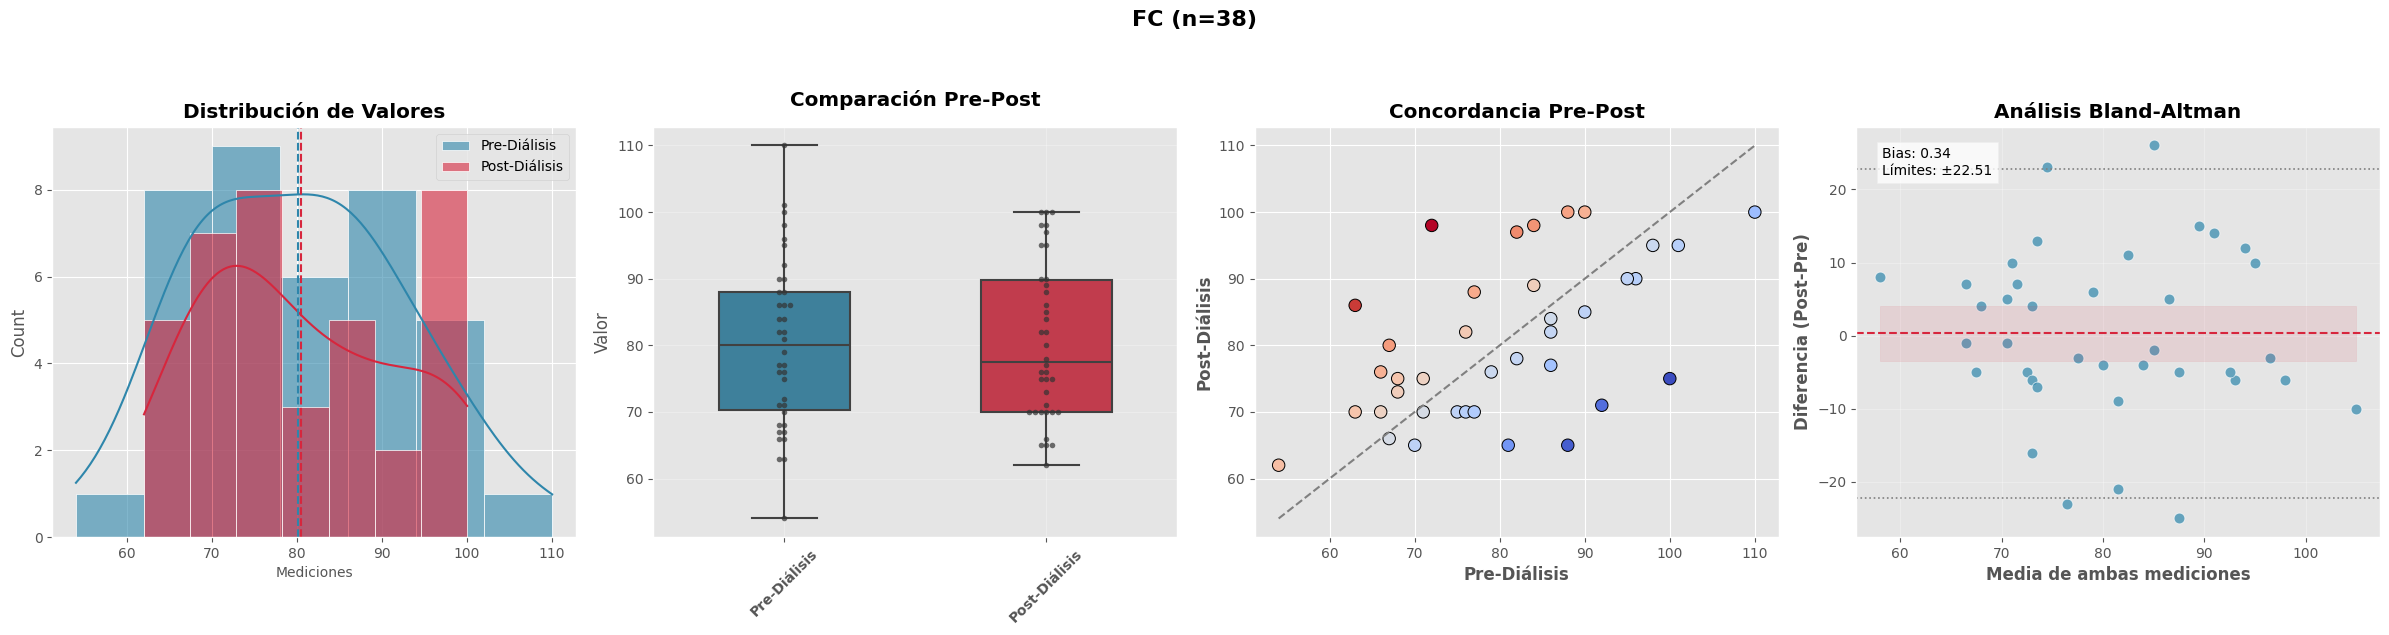


    📊 ANÁLISIS ESTADÍSTICO - FC
    ▪ Diferencia media (IC 95%): 0.34 (-3.43 a 4.12)
    ▪ Prueba de normalidad: W = 0.973, p = 0.4793
    ▪ Prueba seleccionada: t(37) = -0.18, p = 0.8553
    ▪ Tamaño del efecto (Cohen's d): 0.03
    
────────────────────────────────────────────────────────────────────────────────


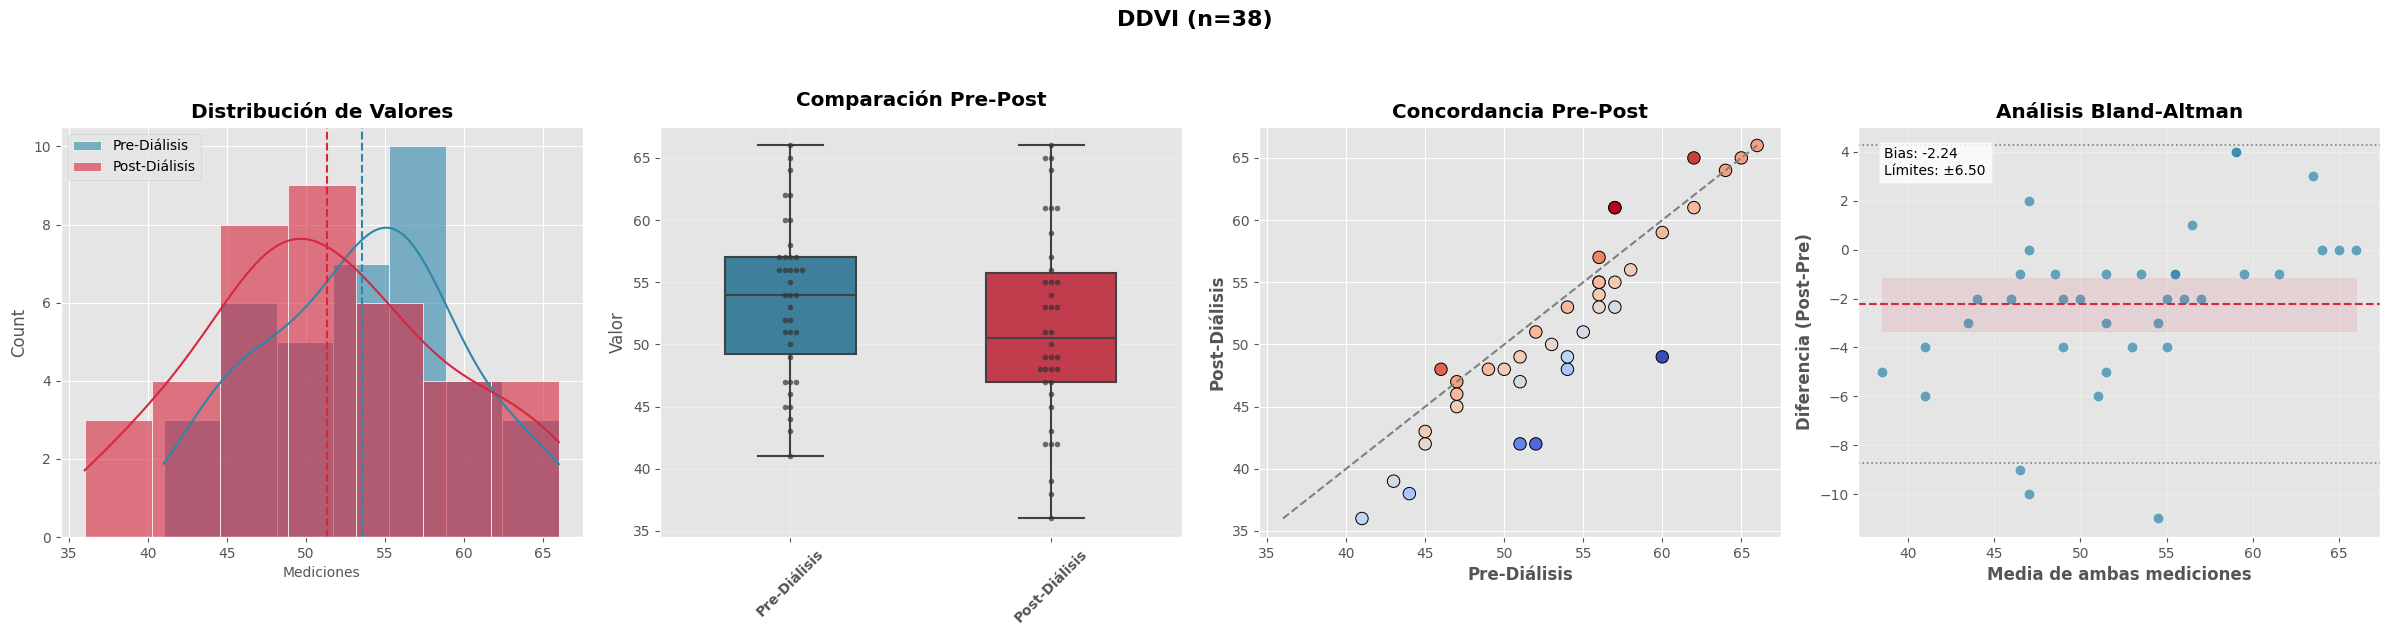


    📊 ANÁLISIS ESTADÍSTICO - DDVI
    ▪ Diferencia media (IC 95%): -2.24 (-3.33 a -1.15)
    ▪ Prueba de normalidad: W = 0.941, p = 0.0445
    ▪ Prueba seleccionada: Z = -4.111, p = 0.0003
    ▪ Tamaño del efecto (Cohen's d): -0.67
    
────────────────────────────────────────────────────────────────────────────────


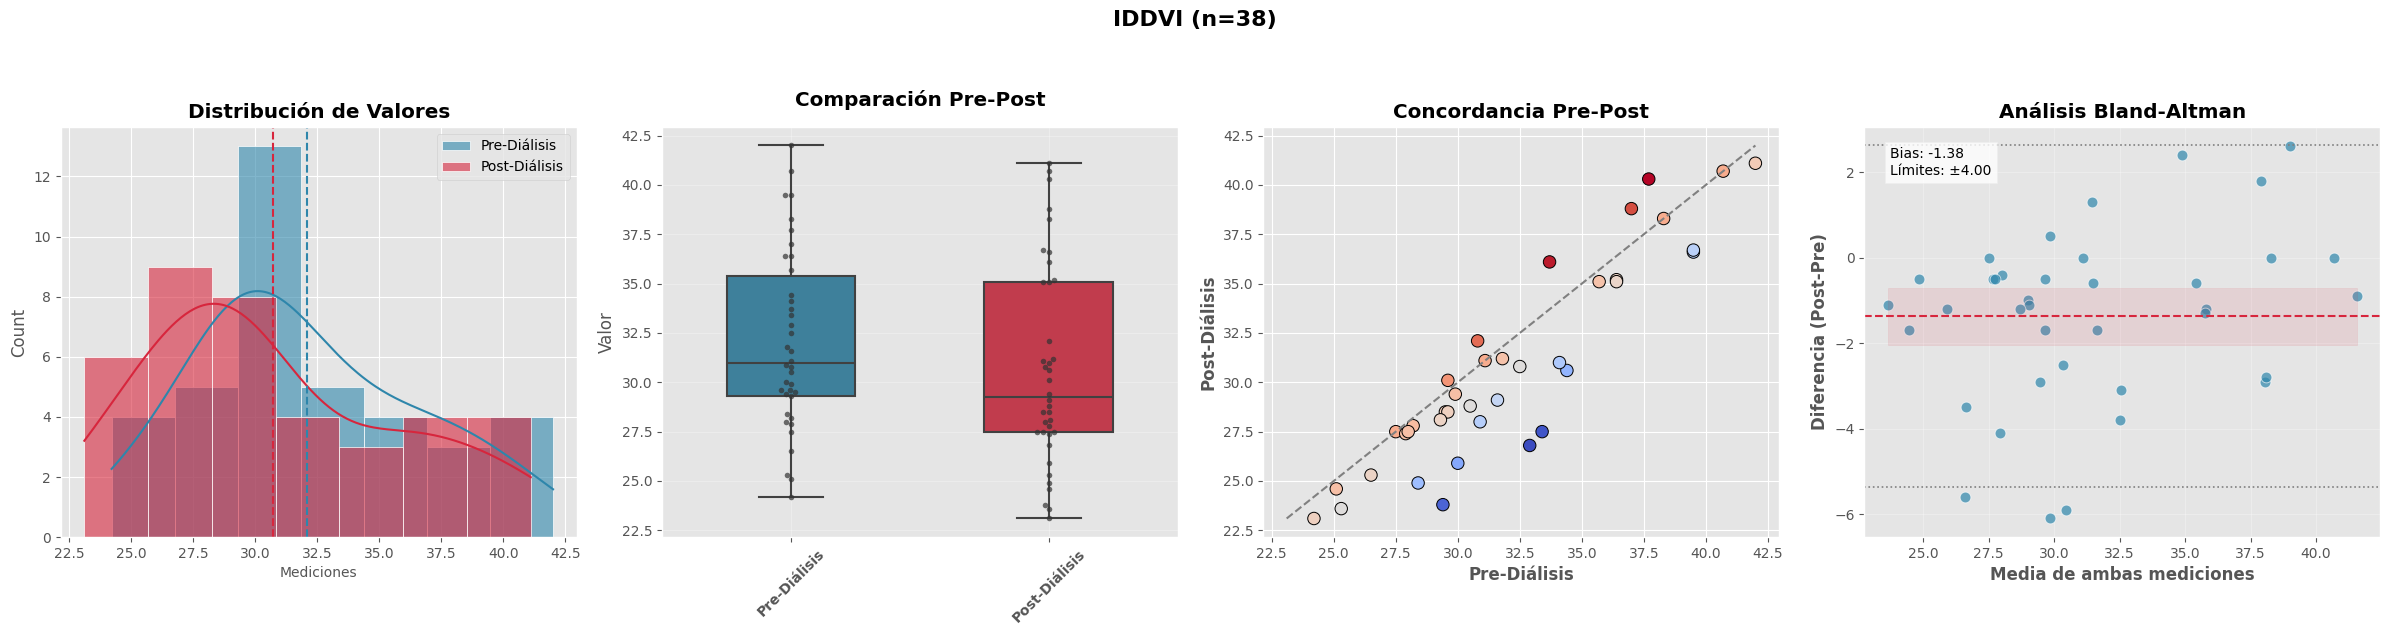


    📊 ANÁLISIS ESTADÍSTICO - IDDVI
    ▪ Diferencia media (IC 95%): -1.38 (-2.05 a -0.71)
    ▪ Prueba de normalidad: W = 0.952, p = 0.1072
    ▪ Prueba seleccionada: t(37) = 4.16, p = 0.0002
    ▪ Tamaño del efecto (Cohen's d): -0.67
    
────────────────────────────────────────────────────────────────────────────────


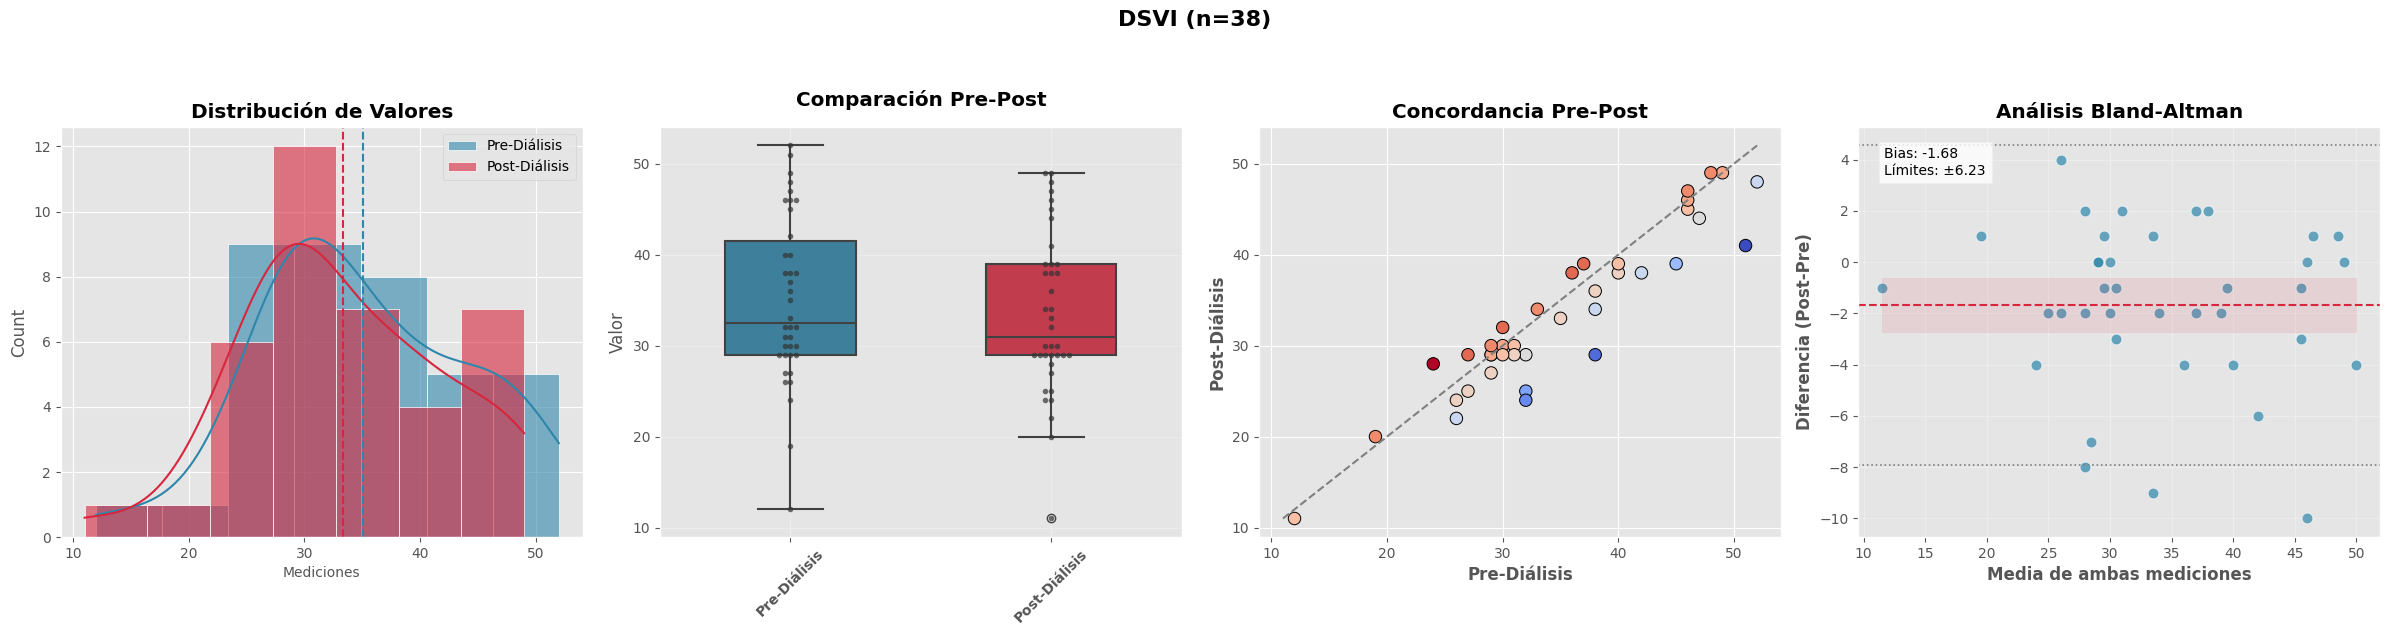


    📊 ANÁLISIS ESTADÍSTICO - DSVI
    ▪ Diferencia media (IC 95%): -1.68 (-2.73 a -0.64)
    ▪ Prueba de normalidad: W = 0.932, p = 0.0240
    ▪ Prueba seleccionada: Z = -3.669, p = 0.0033
    ▪ Tamaño del efecto (Cohen's d): -0.53
    
────────────────────────────────────────────────────────────────────────────────


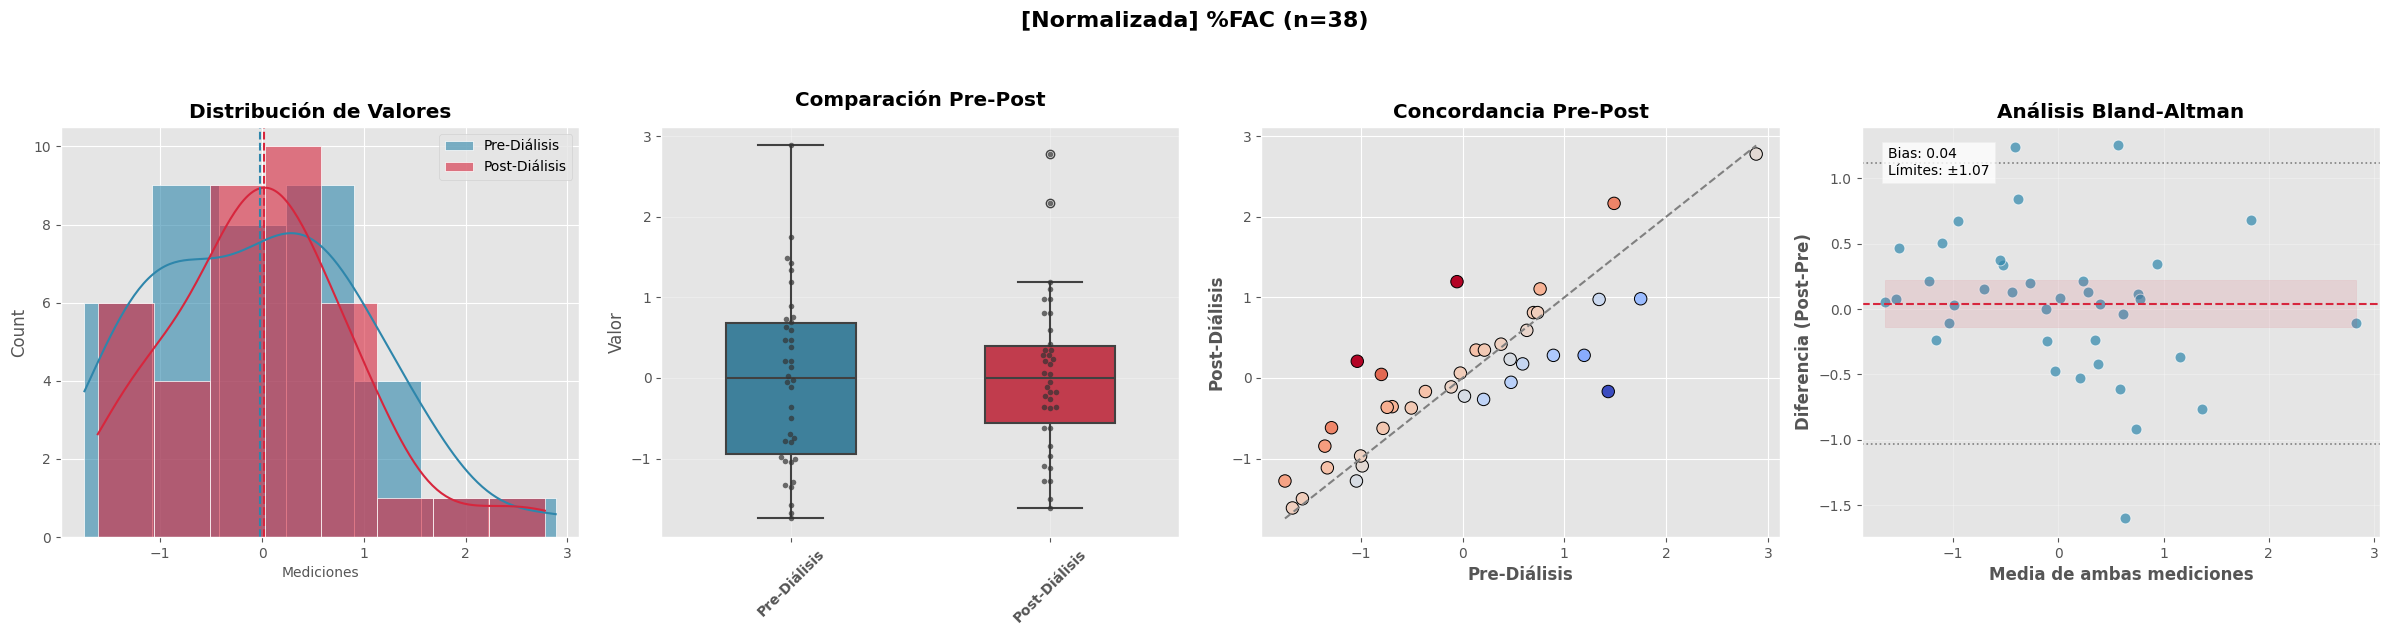


    📊 ANÁLISIS ESTADÍSTICO - %FAC
    ▪ Diferencia media (IC 95%): 0.04 (-0.14 a 0.22)
    ▪ Prueba de normalidad: W = 0.961, p = 0.2077
    ▪ Prueba seleccionada: t(37) = -0.46, p = 0.6467
    ▪ Tamaño del efecto (Cohen's d): 0.07
    
────────────────────────────────────────────────────────────────────────────────


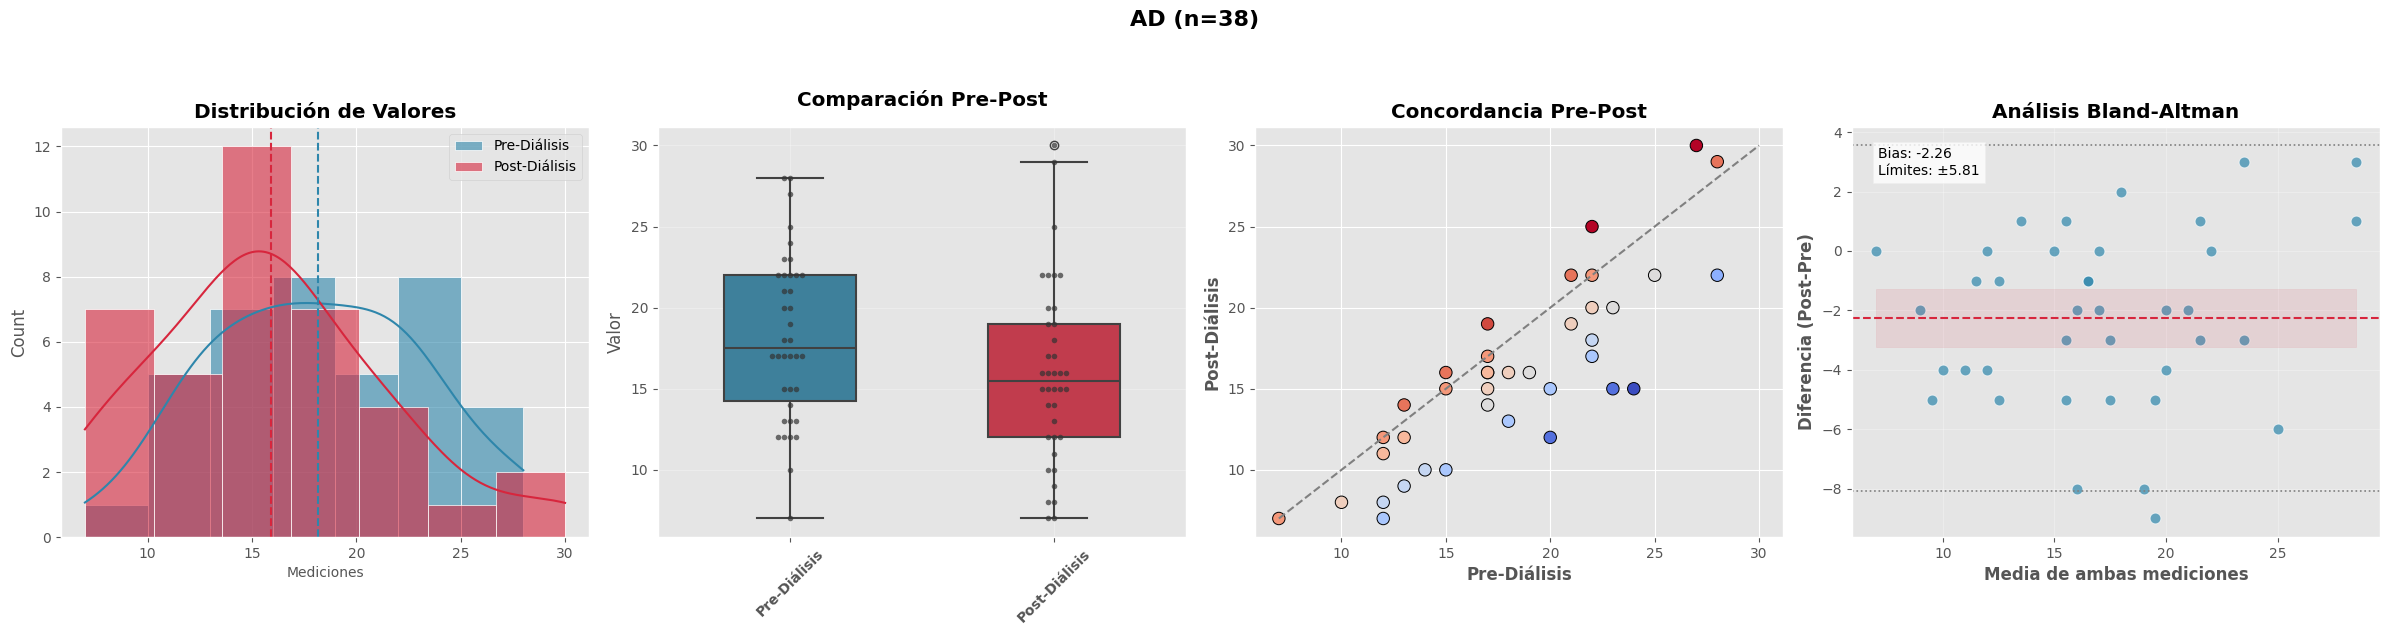


    📊 ANÁLISIS ESTADÍSTICO - AD
    ▪ Diferencia media (IC 95%): -2.26 (-3.24 a -1.29)
    ▪ Prueba de normalidad: W = 0.972, p = 0.4390
    ▪ Prueba seleccionada: t(37) = 4.70, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.76
    
────────────────────────────────────────────────────────────────────────────────


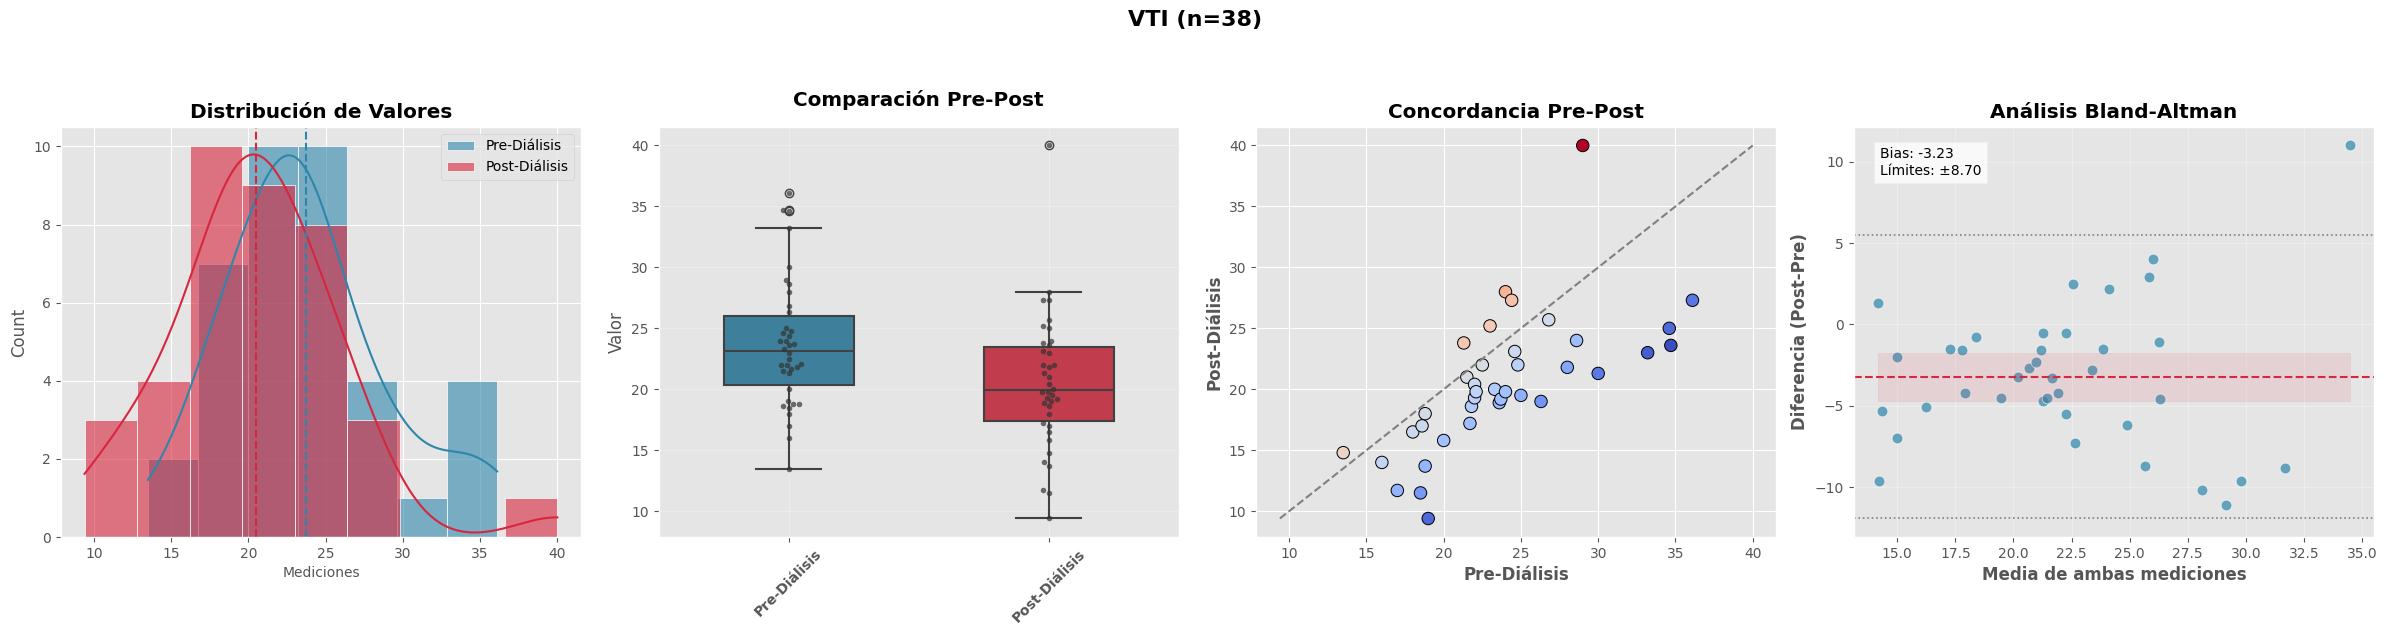


    📊 ANÁLISIS ESTADÍSTICO - VTI
    ▪ Diferencia media (IC 95%): -3.23 (-4.69 a -1.77)
    ▪ Prueba de normalidad: W = 0.958, p = 0.1667
    ▪ Prueba seleccionada: t(37) = 4.48, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.73
    
────────────────────────────────────────────────────────────────────────────────


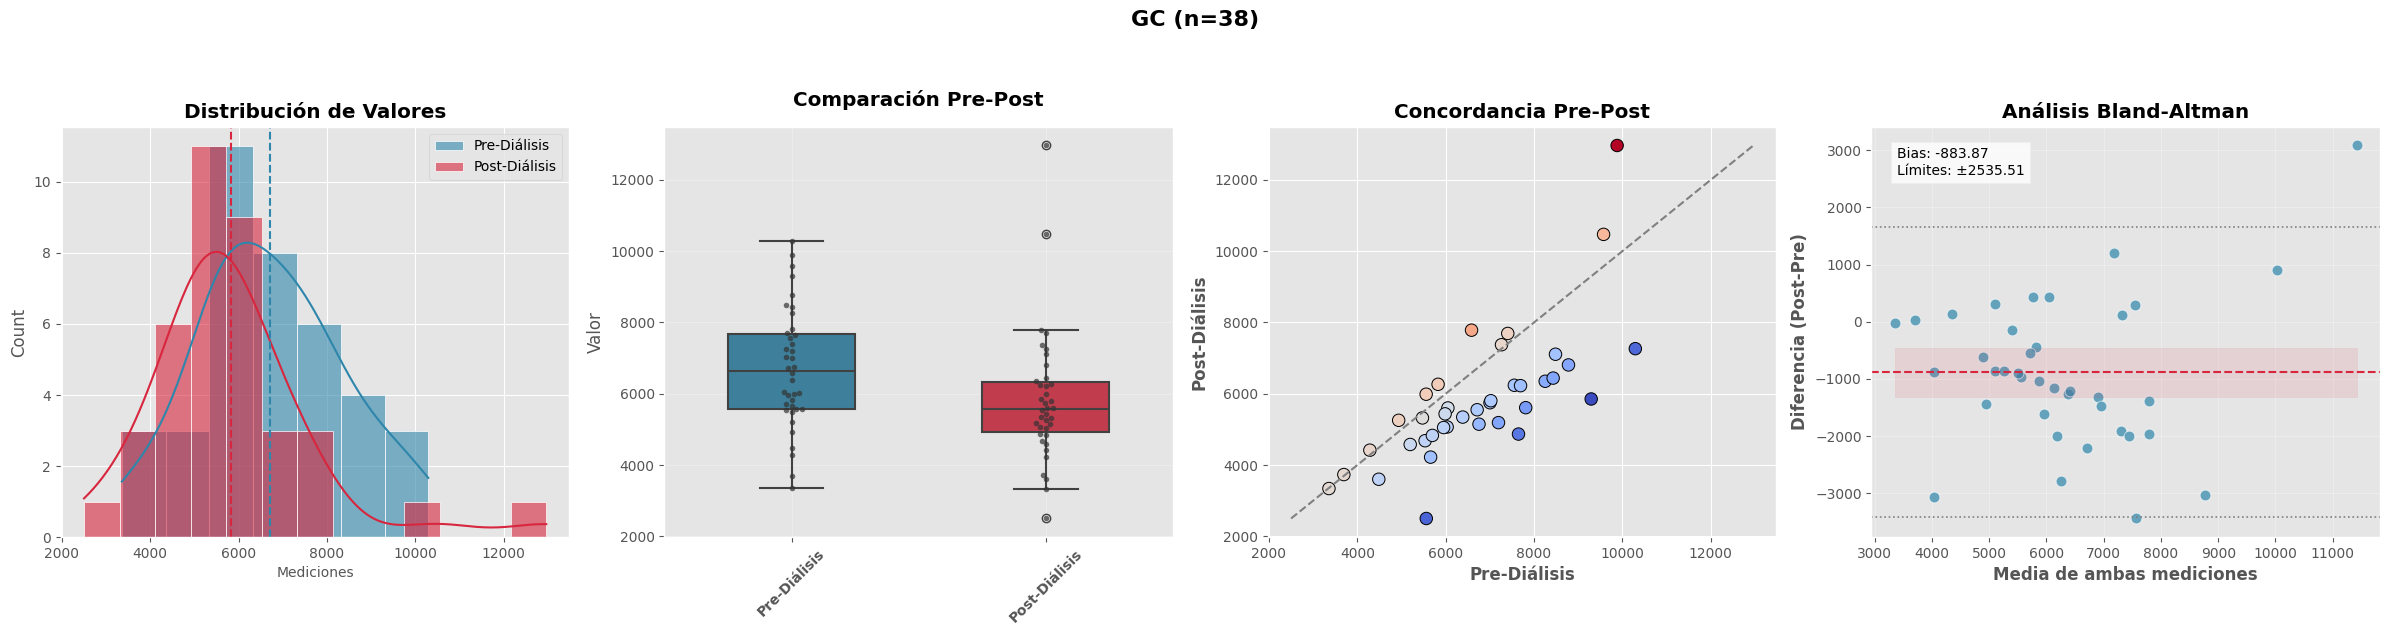


    📊 ANÁLISIS ESTADÍSTICO - GC
    ▪ Diferencia media (IC 95%): -883.87 (-1309.07 a -458.66)
    ▪ Prueba de normalidad: W = 0.971, p = 0.4146
    ▪ Prueba seleccionada: t(37) = 4.21, p = 0.0002
    ▪ Tamaño del efecto (Cohen's d): -0.68
    
────────────────────────────────────────────────────────────────────────────────


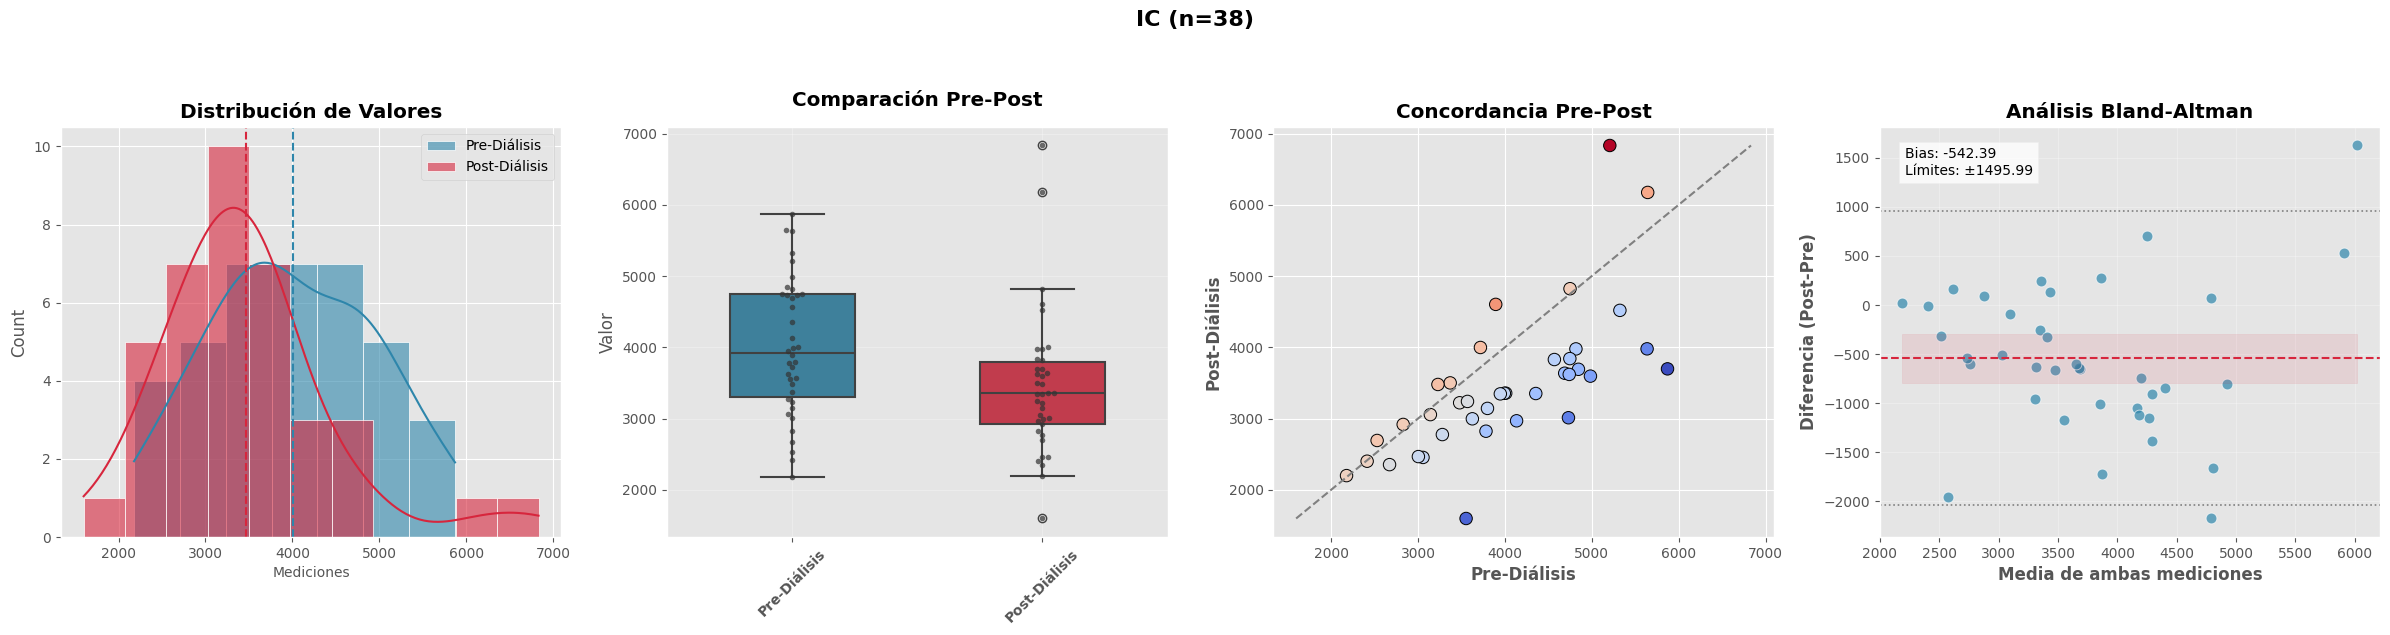


    📊 ANÁLISIS ESTADÍSTICO - IC
    ▪ Diferencia media (IC 95%): -542.39 (-793.27 a -291.52)
    ▪ Prueba de normalidad: W = 0.982, p = 0.7793
    ▪ Prueba seleccionada: t(37) = 4.38, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.71
    
────────────────────────────────────────────────────────────────────────────────


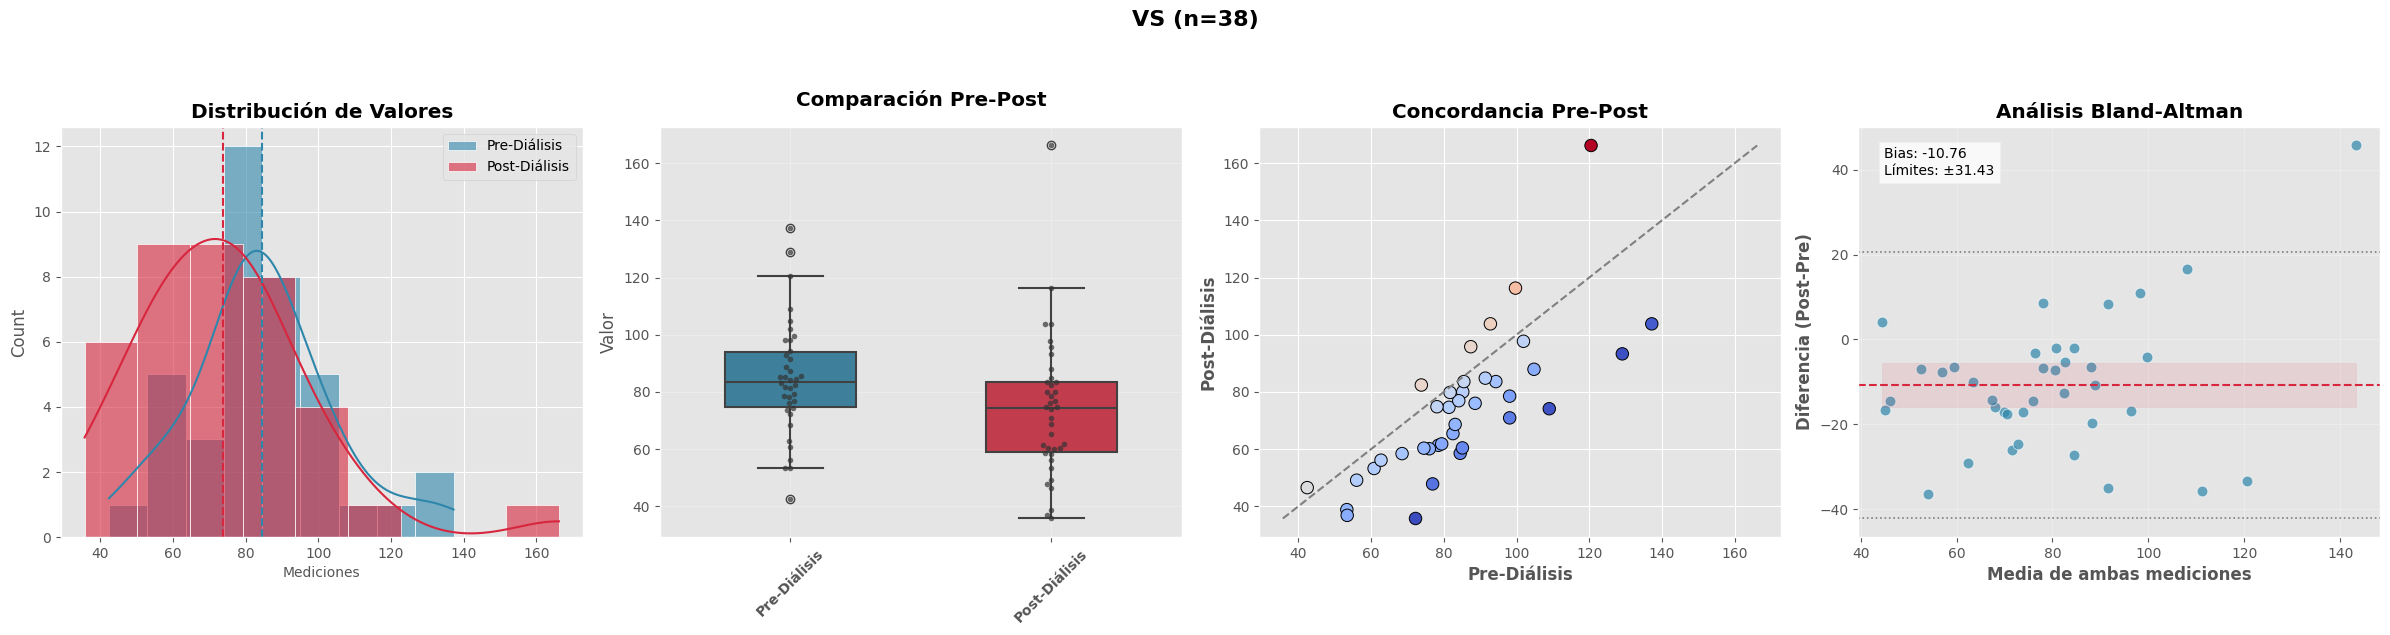


    📊 ANÁLISIS ESTADÍSTICO - VS
    ▪ Diferencia media (IC 95%): -10.76 (-16.03 a -5.49)
    ▪ Prueba de normalidad: W = 0.927, p = 0.0167
    ▪ Prueba seleccionada: Z = -3.792, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.67
    
────────────────────────────────────────────────────────────────────────────────


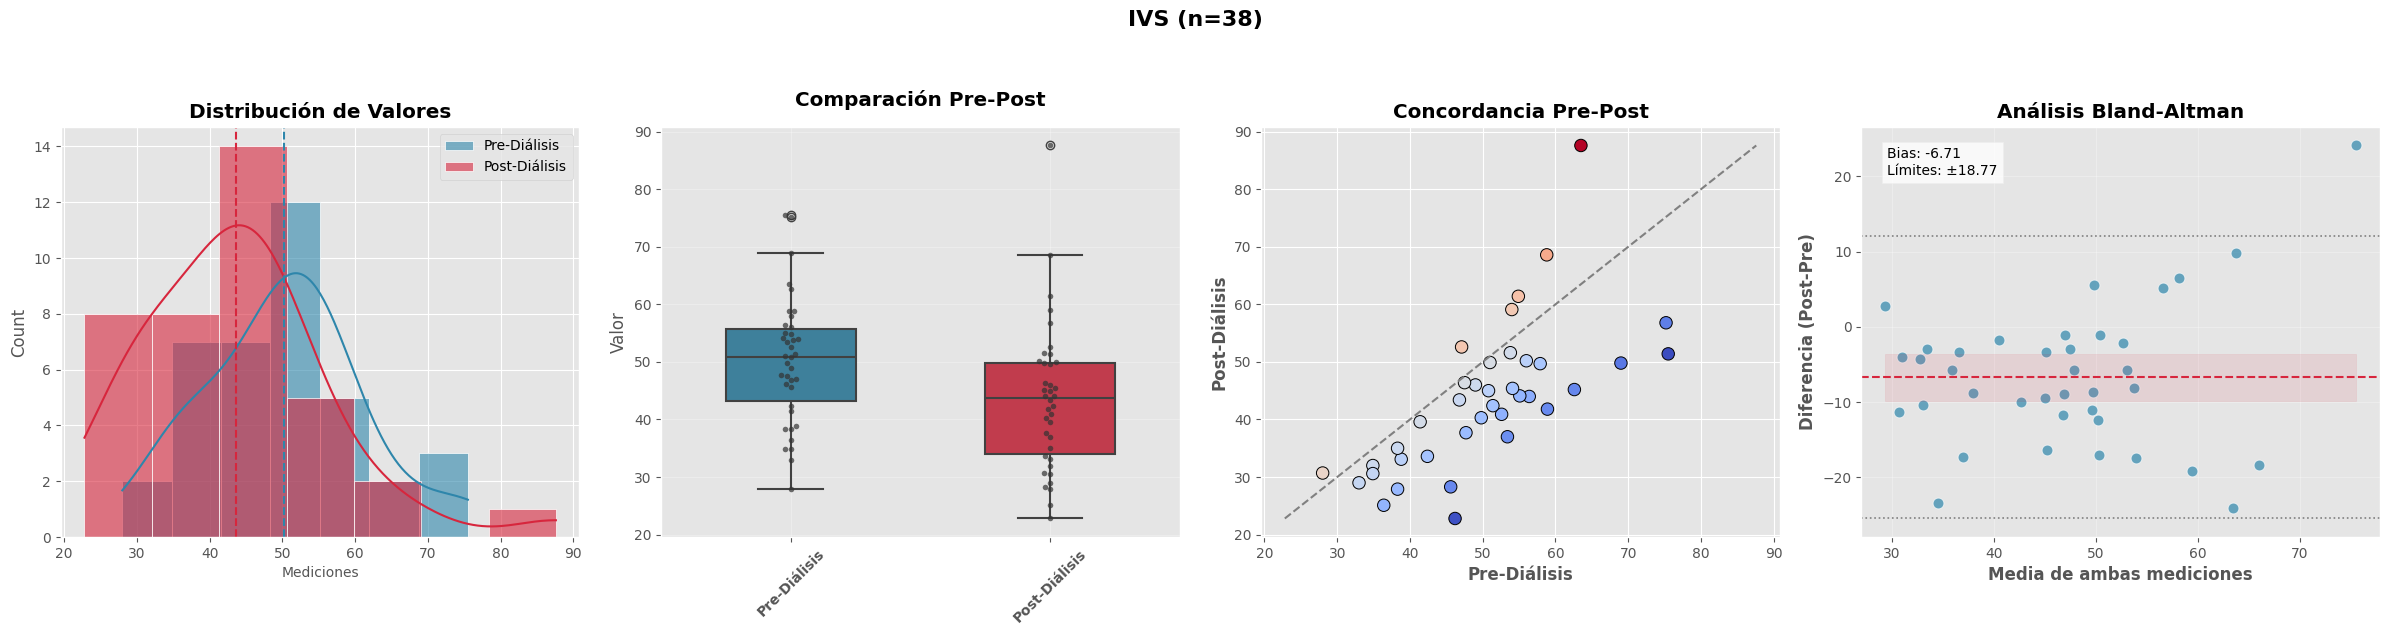


    📊 ANÁLISIS ESTADÍSTICO - IVS
    ▪ Diferencia media (IC 95%): -6.71 (-9.86 a -3.56)
    ▪ Prueba de normalidad: W = 0.957, p = 0.1562
    ▪ Prueba seleccionada: t(37) = 4.32, p = 0.0001
    ▪ Tamaño del efecto (Cohen's d): -0.70
    
────────────────────────────────────────────────────────────────────────────────


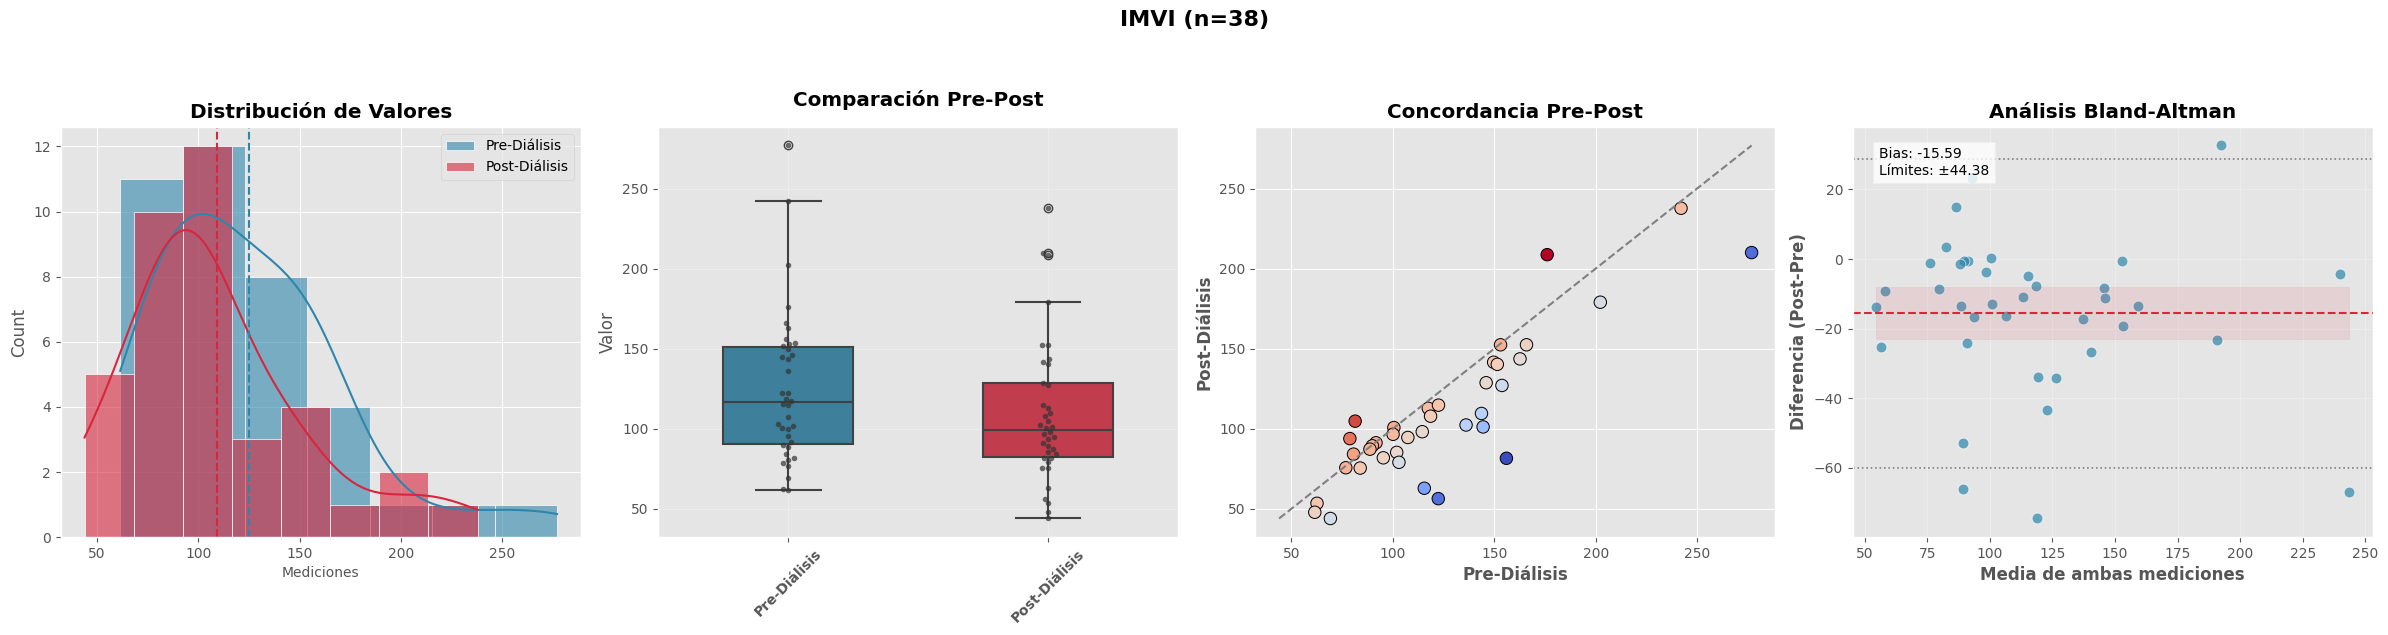


    📊 ANÁLISIS ESTADÍSTICO - IMVI
    ▪ Diferencia media (IC 95%): -15.59 (-23.04 a -8.15)
    ▪ Prueba de normalidad: W = 0.922, p = 0.0115
    ▪ Prueba seleccionada: Z = -4.126, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -0.69
    
────────────────────────────────────────────────────────────────────────────────


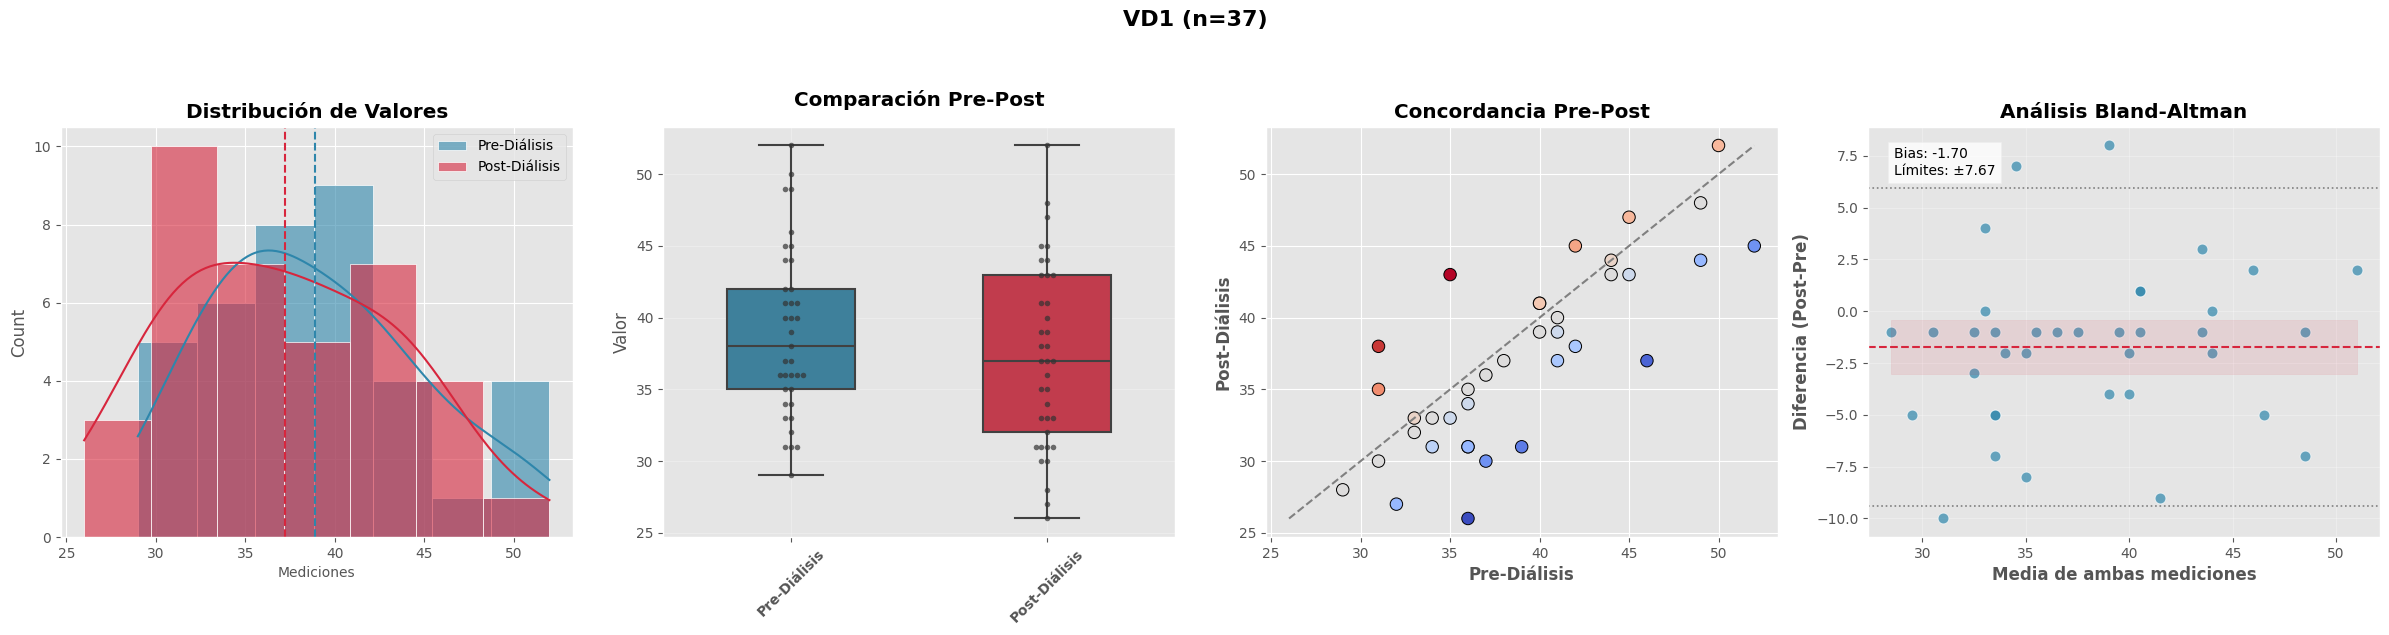


    📊 ANÁLISIS ESTADÍSTICO - VD1
    ▪ Diferencia media (IC 95%): -1.70 (-3.01 a -0.40)
    ▪ Prueba de normalidad: W = 0.958, p = 0.1796
    ▪ Prueba seleccionada: t(36) = 2.65, p = 0.0120
    ▪ Tamaño del efecto (Cohen's d): -0.43
    
────────────────────────────────────────────────────────────────────────────────


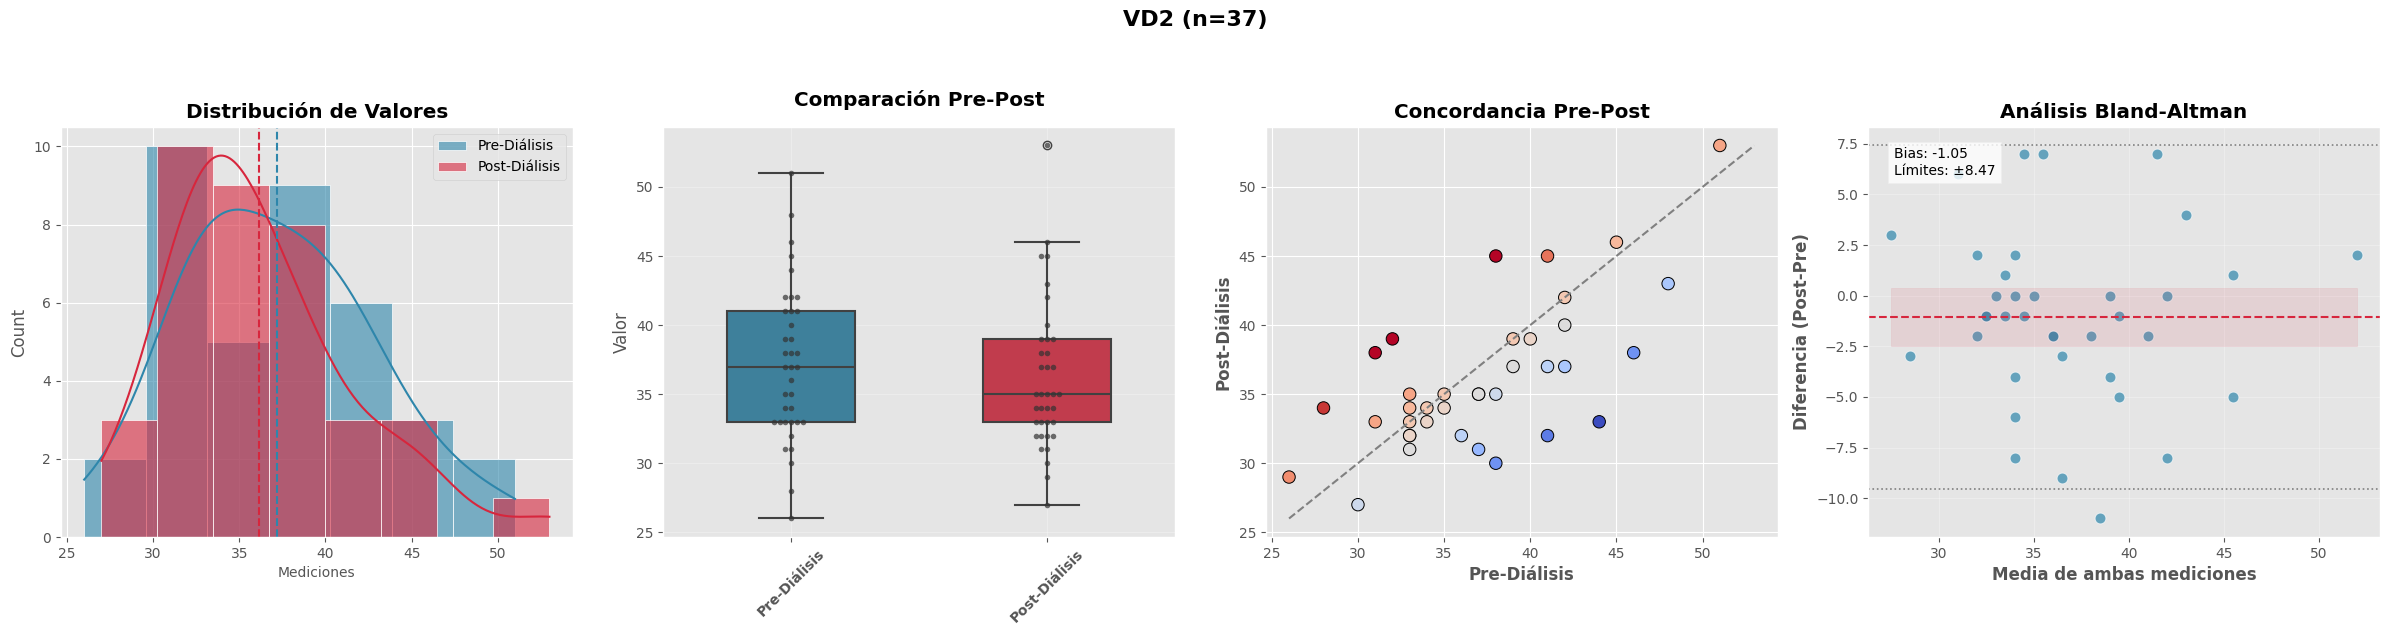


    📊 ANÁLISIS ESTADÍSTICO - VD2
    ▪ Diferencia media (IC 95%): -1.05 (-2.49 a 0.39)
    ▪ Prueba de normalidad: W = 0.969, p = 0.3886
    ▪ Prueba seleccionada: t(36) = 1.48, p = 0.1465
    ▪ Tamaño del efecto (Cohen's d): -0.24
    
────────────────────────────────────────────────────────────────────────────────


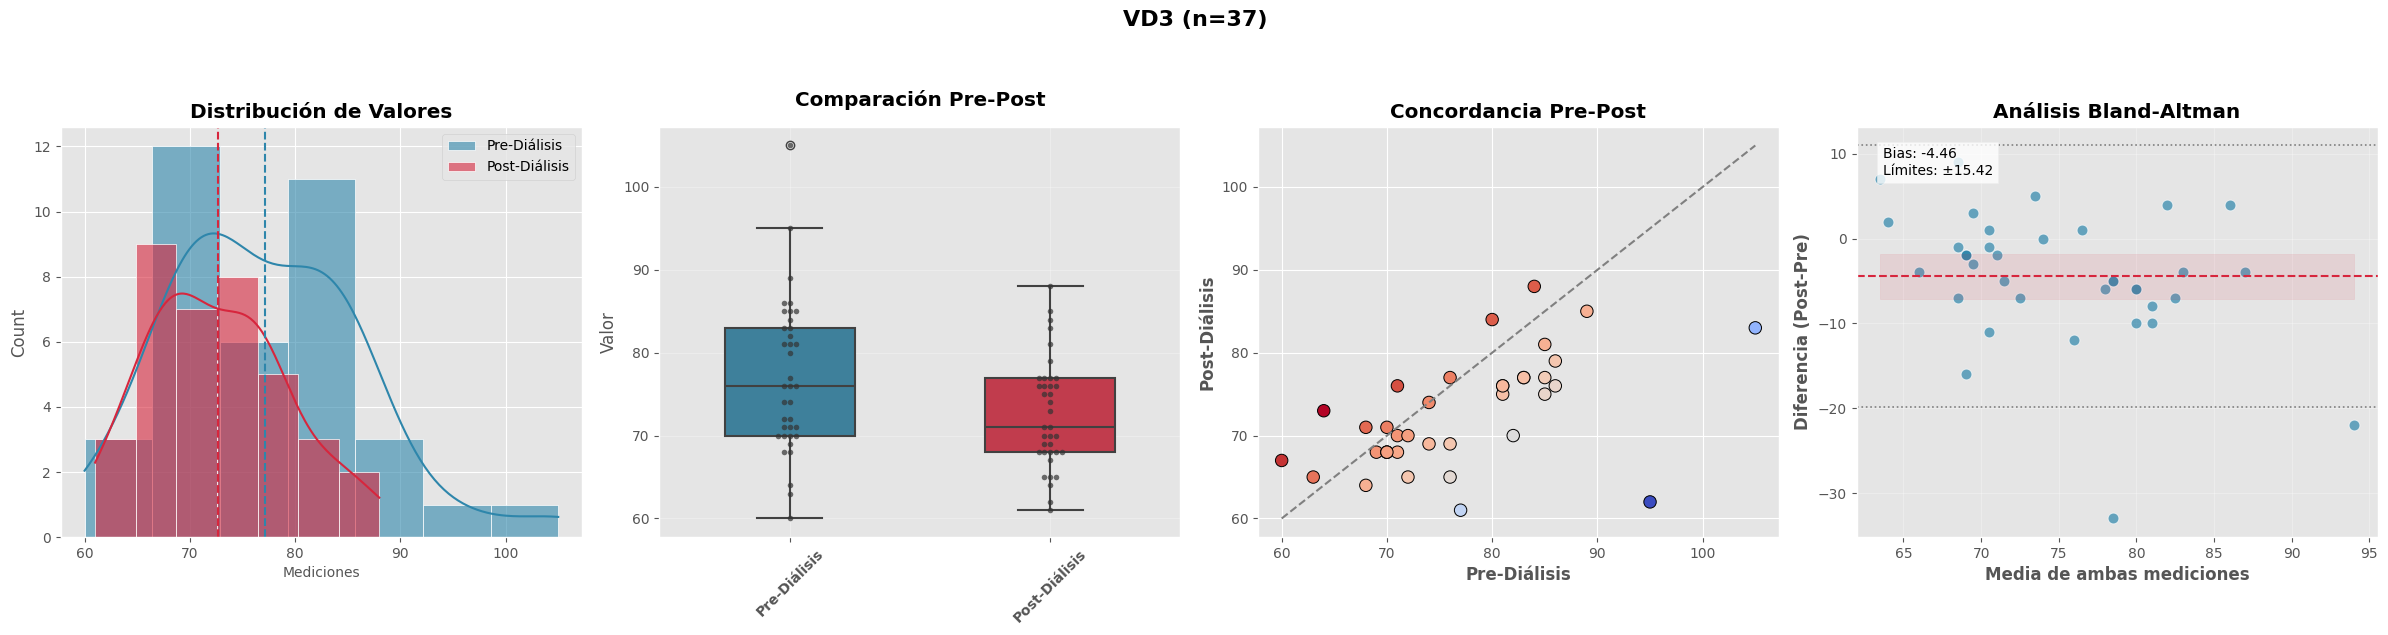


    📊 ANÁLISIS ESTADÍSTICO - VD3
    ▪ Diferencia media (IC 95%): -4.46 (-7.08 a -1.84)
    ▪ Prueba de normalidad: W = 0.901, p = 0.0032
    ▪ Prueba seleccionada: Z = -3.440, p = 0.0010
    ▪ Tamaño del efecto (Cohen's d): -0.57
    
────────────────────────────────────────────────────────────────────────────────


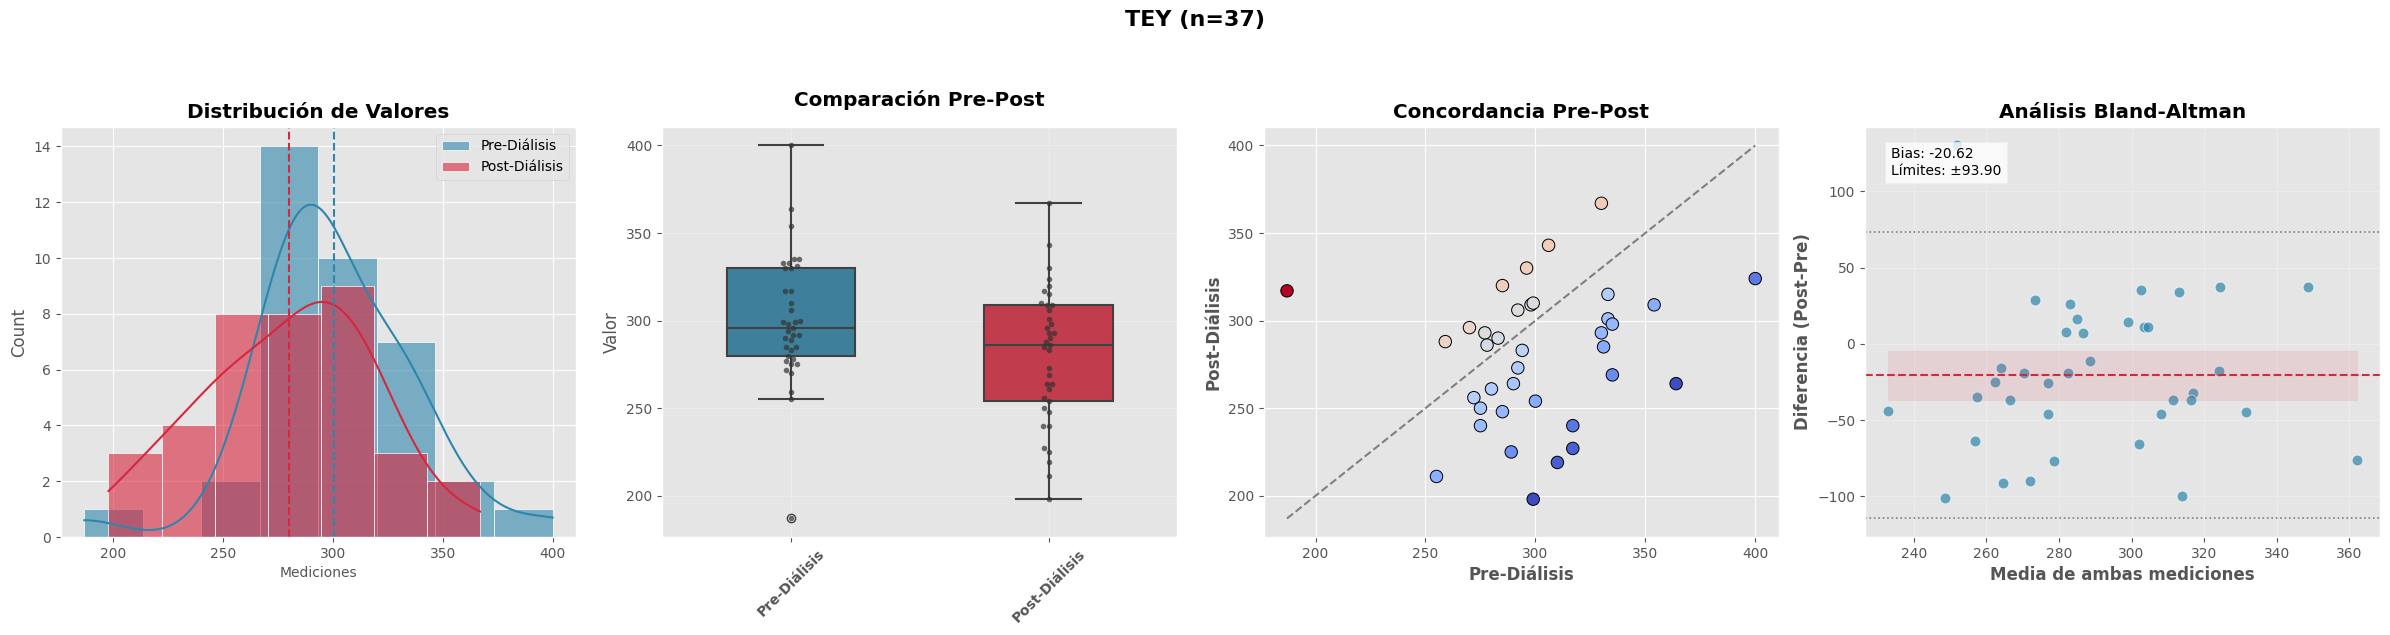


    📊 ANÁLISIS ESTADÍSTICO - TEY
    ▪ Diferencia media (IC 95%): -20.62 (-36.59 a -4.65)
    ▪ Prueba de normalidad: W = 0.953, p = 0.1164
    ▪ Prueba seleccionada: t(36) = 2.62, p = 0.0128
    ▪ Tamaño del efecto (Cohen's d): -0.43
    
────────────────────────────────────────────────────────────────────────────────


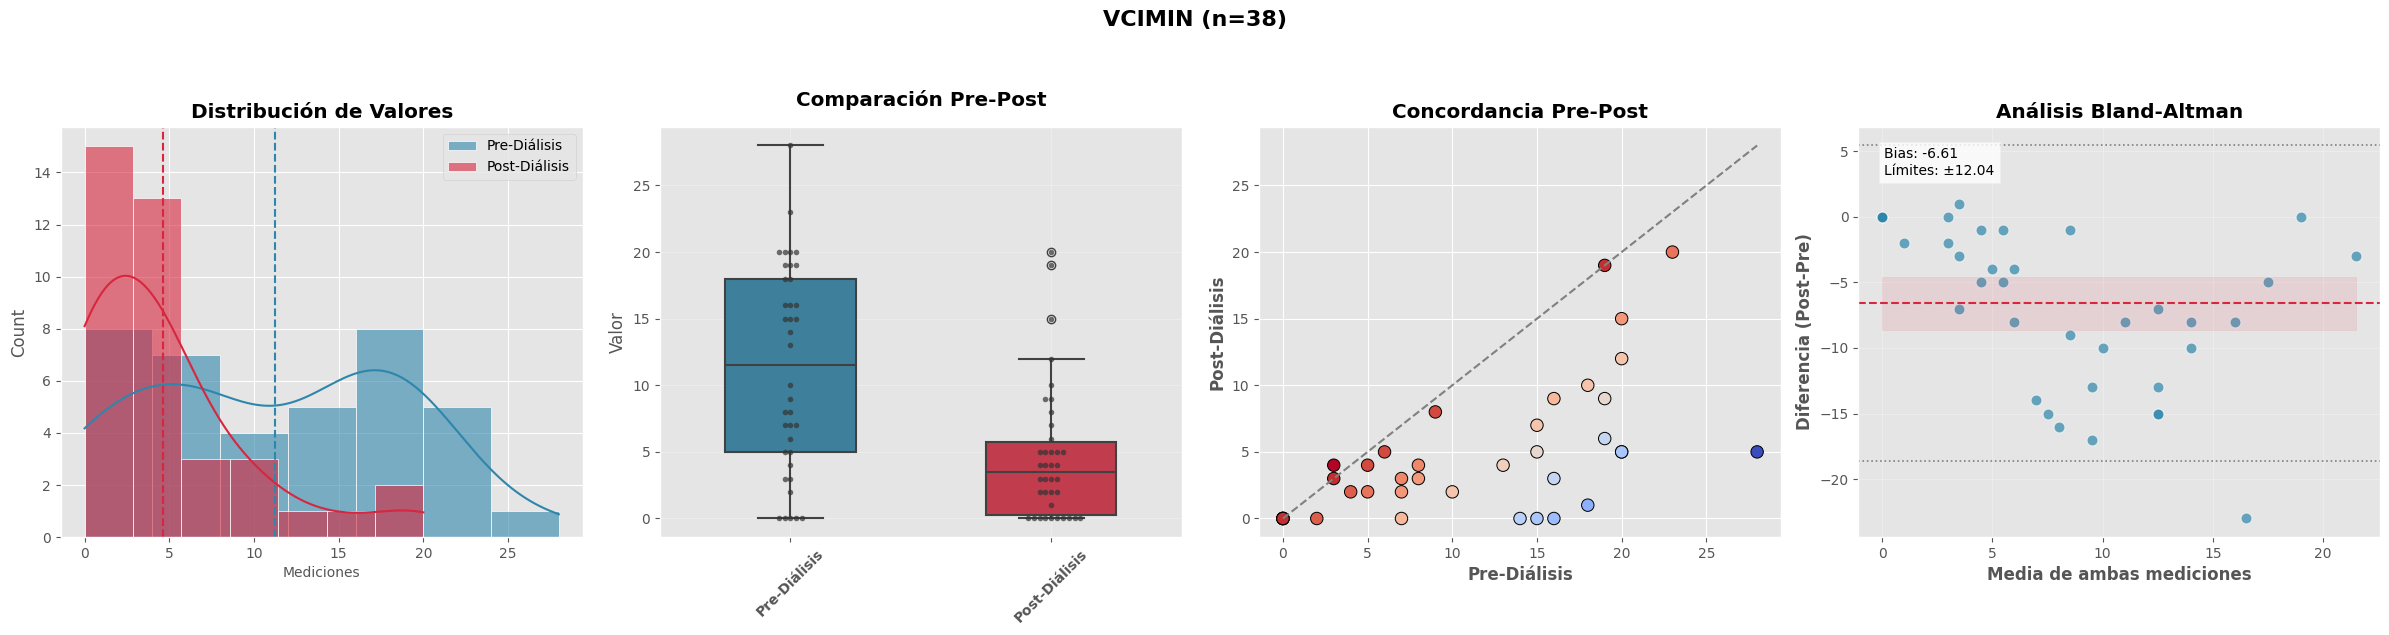


    📊 ANÁLISIS ESTADÍSTICO - VCIMIN
    ▪ Diferencia media (IC 95%): -6.61 (-8.63 a -4.59)
    ▪ Prueba de normalidad: W = 0.913, p = 0.0063
    ▪ Prueba seleccionada: Z = -5.337, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): -1.07
    
────────────────────────────────────────────────────────────────────────────────


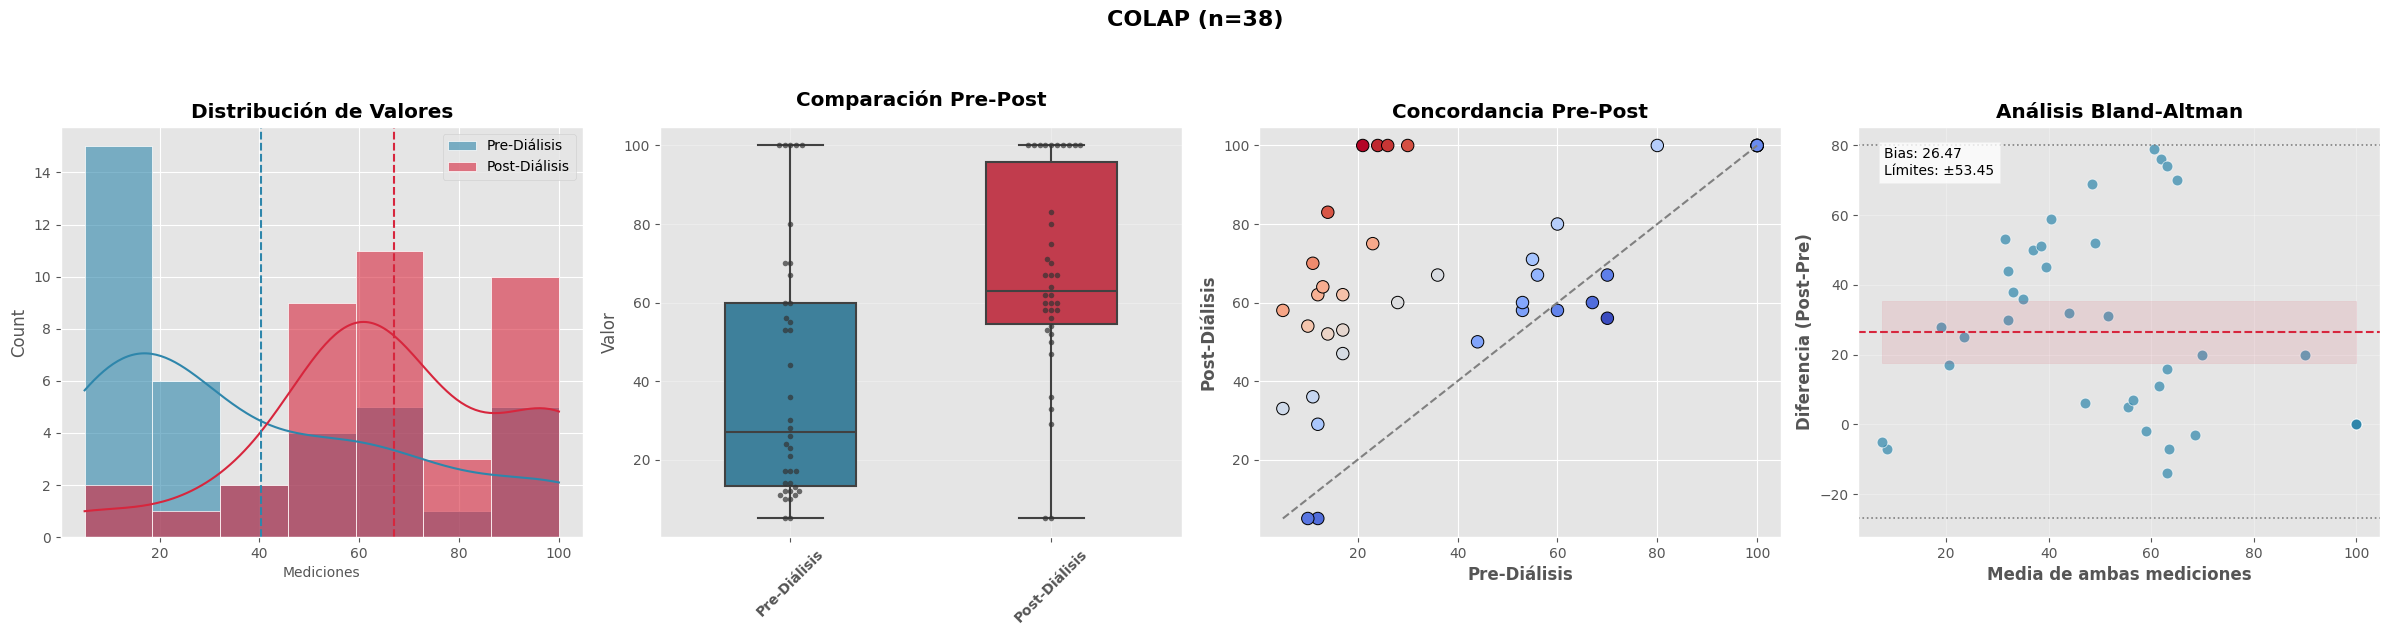


    📊 ANÁLISIS ESTADÍSTICO - COLAP
    ▪ Diferencia media (IC 95%): 26.47 (17.51 a 35.44)
    ▪ Prueba de normalidad: W = 0.933, p = 0.0248
    ▪ Prueba seleccionada: Z = -4.931, p = 0.0000
    ▪ Tamaño del efecto (Cohen's d): 0.97
    
────────────────────────────────────────────────────────────────────────────────


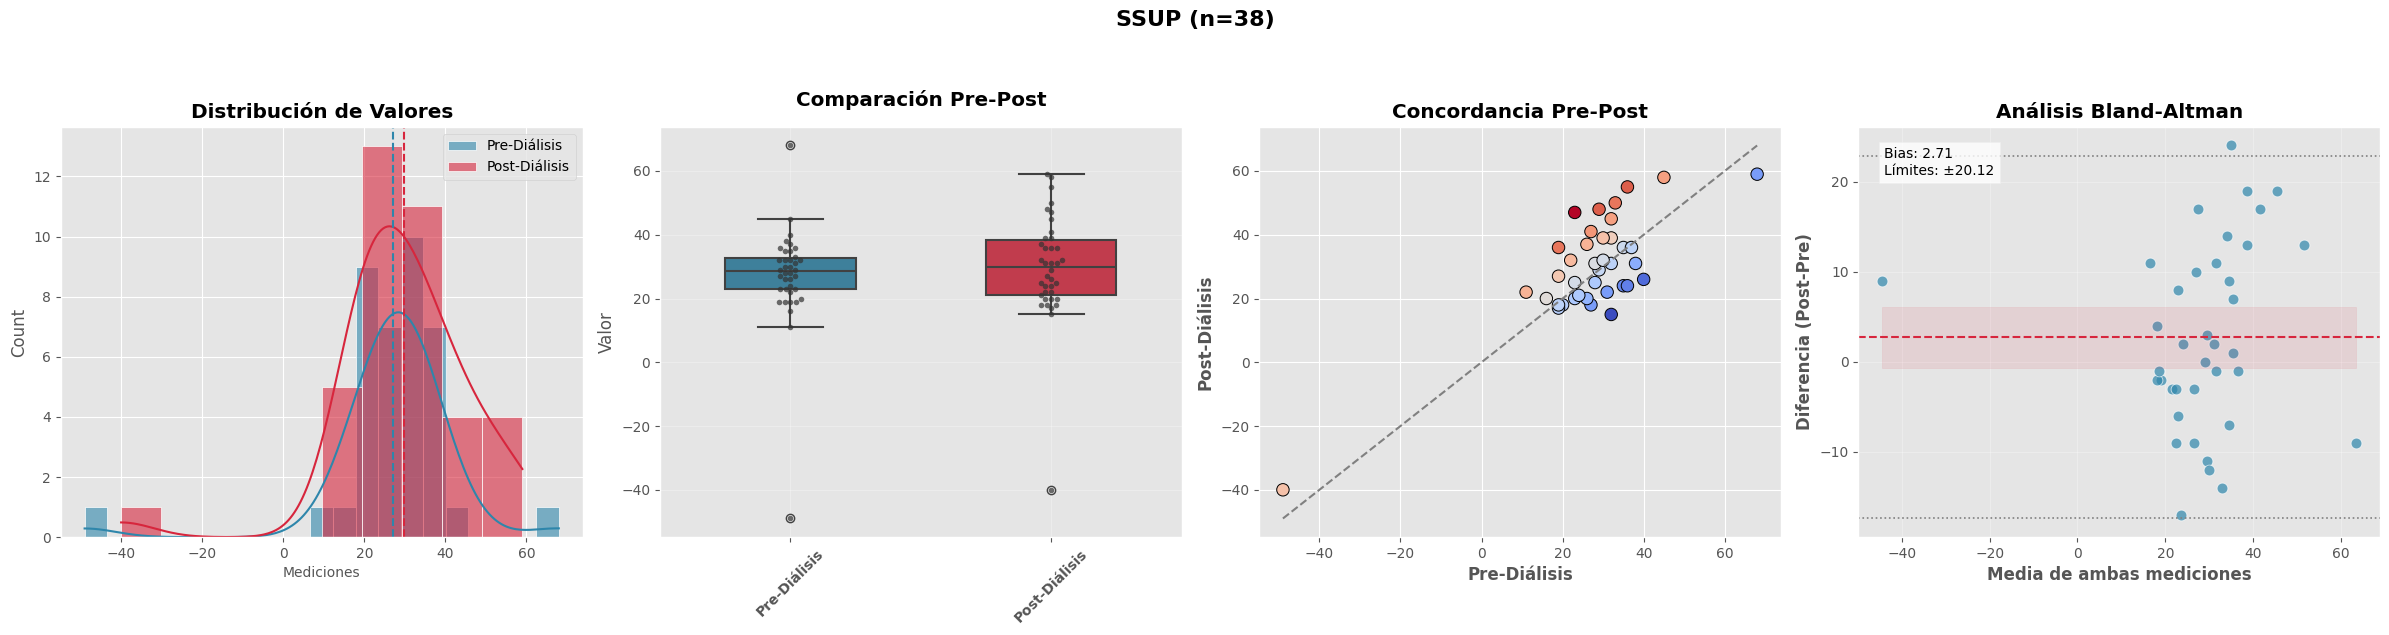


    📊 ANÁLISIS ESTADÍSTICO - SSUP
    ▪ Diferencia media (IC 95%): 2.71 (-0.66 a 6.08)
    ▪ Prueba de normalidad: W = 0.979, p = 0.6787
    ▪ Prueba seleccionada: t(37) = -1.63, p = 0.1120
    ▪ Tamaño del efecto (Cohen's d): 0.26
    
────────────────────────────────────────────────────────────────────────────────


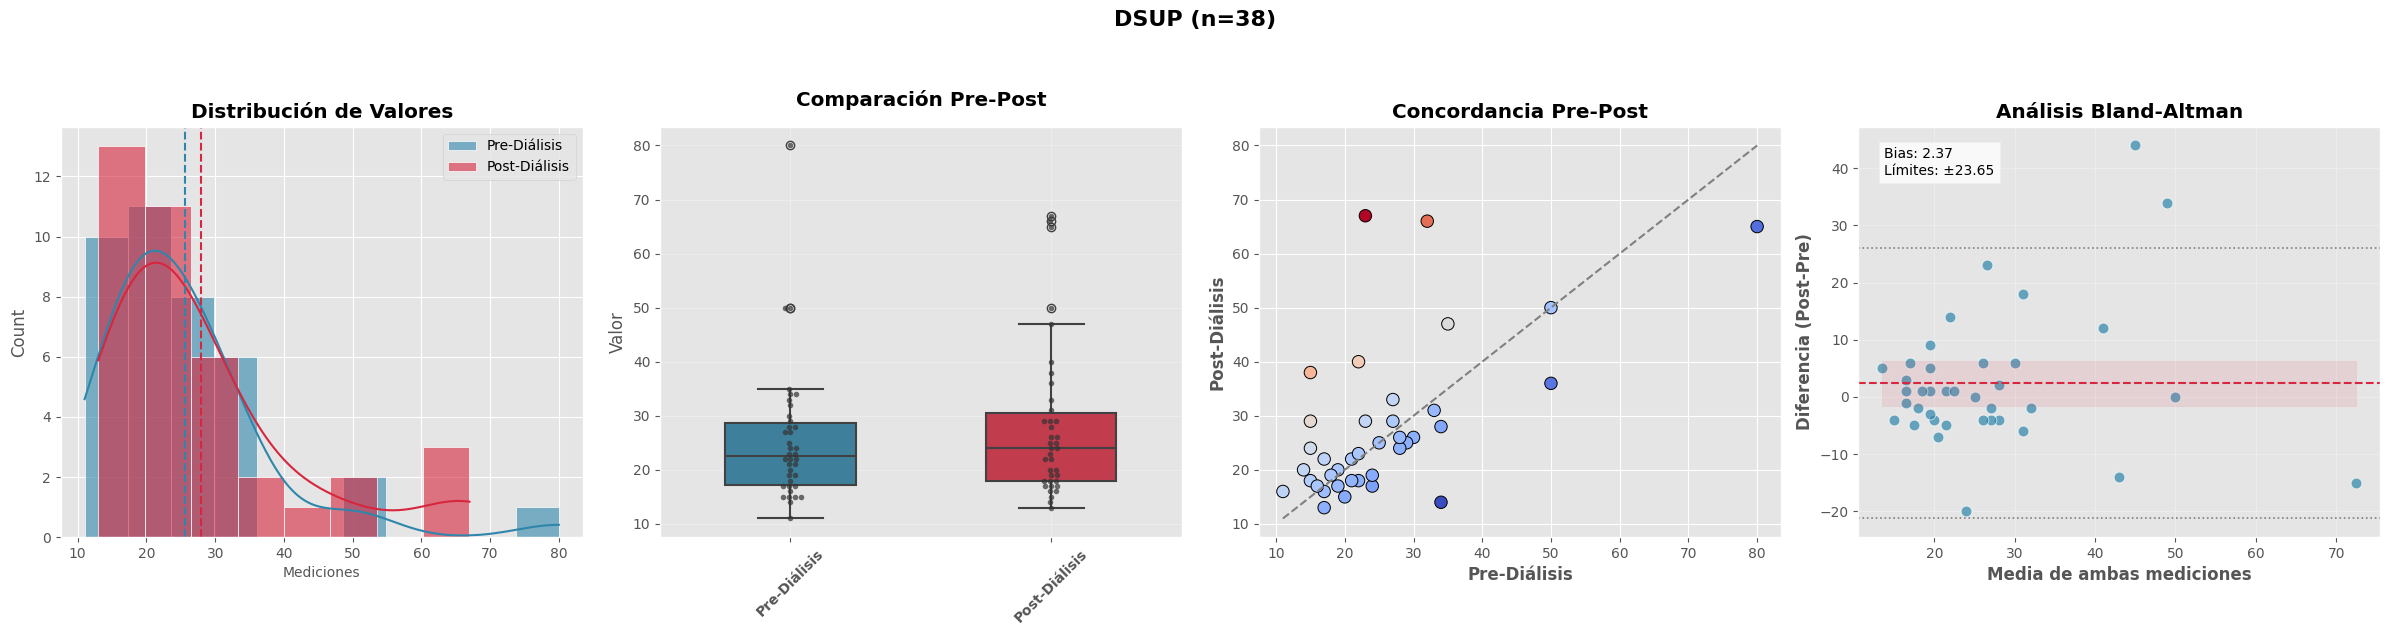


    📊 ANÁLISIS ESTADÍSTICO - DSUP
    ▪ Diferencia media (IC 95%): 2.37 (-1.60 a 6.33)
    ▪ Prueba de normalidad: W = 0.863, p = 0.0003
    ▪ Prueba seleccionada: Z = -1.059, p = 0.5765
    ▪ Tamaño del efecto (Cohen's d): 0.20
    
────────────────────────────────────────────────────────────────────────────────


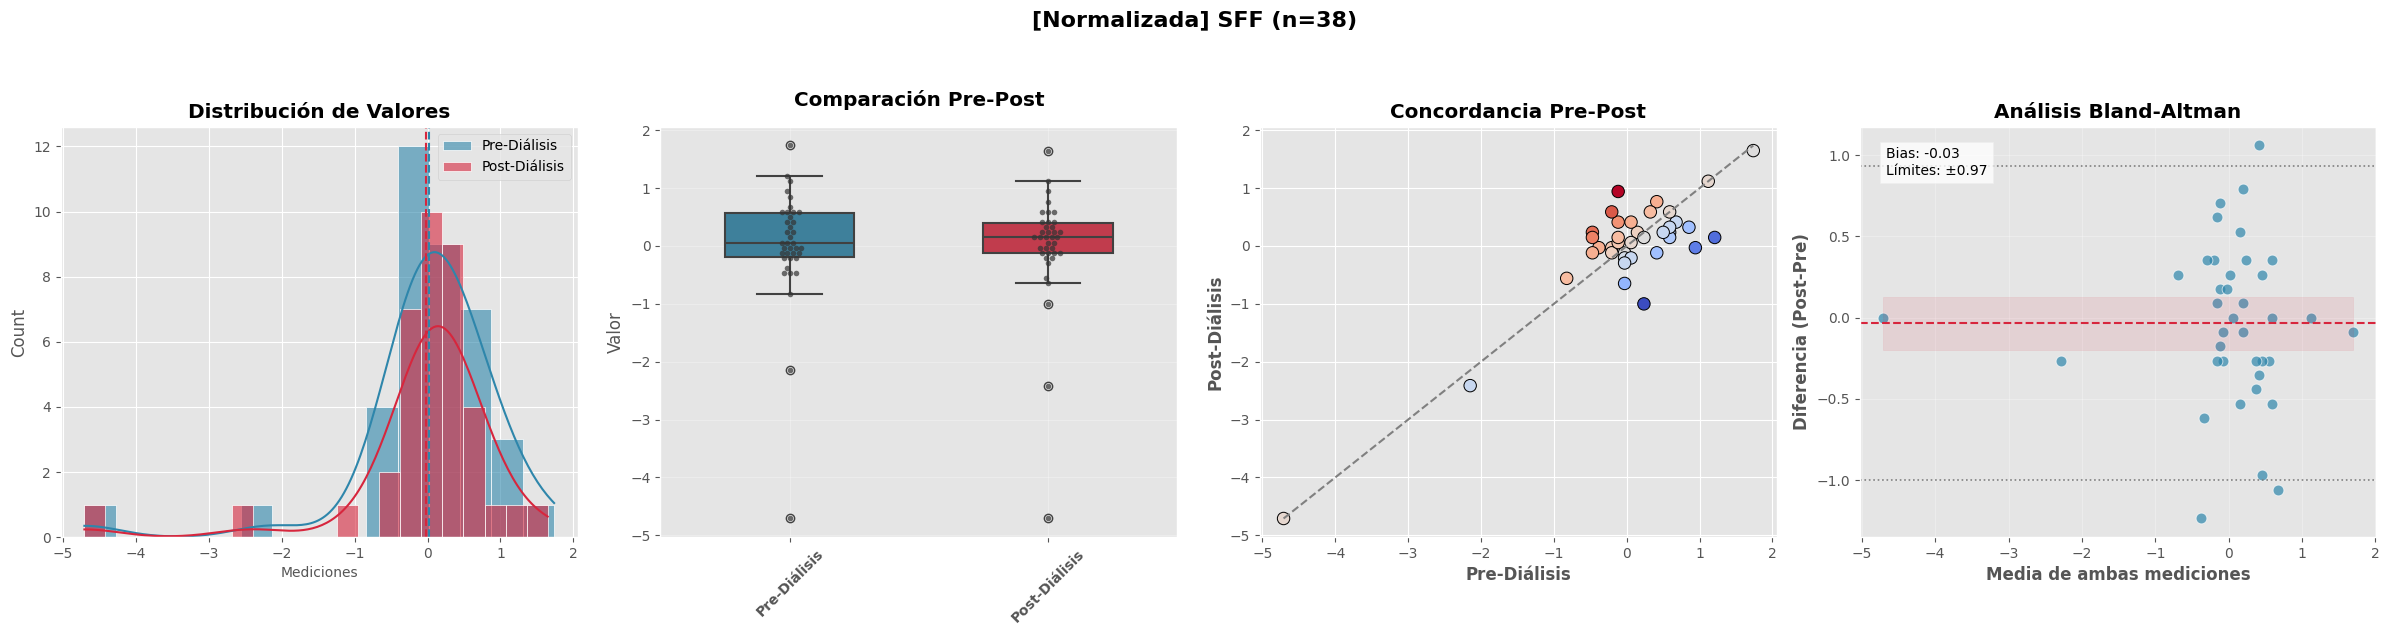


    📊 ANÁLISIS ESTADÍSTICO - SFF
    ▪ Diferencia media (IC 95%): -0.03 (-0.20 a 0.13)
    ▪ Prueba de normalidad: W = 0.981, p = 0.7467
    ▪ Prueba seleccionada: t(37) = 0.44, p = 0.6655
    ▪ Tamaño del efecto (Cohen's d): -0.07
    
────────────────────────────────────────────────────────────────────────────────


In [ ]:
np.random.seed(42)

missing_threshold = 0.30
variables_non_physiological = [
    'vel it', 'Eeprim', 'AI vol index', 'TapPsap', 'grIT', 'StisVD', 'Id', 'FEy',
    'EA VD', 'EtisVD', 'Eeprim VD', '%fac', 'SFF', 'TAPSE', 'TEI', 'FAC', 'TAM',
    'TAD', 'TAS', 'Tdec', 'VCImax', 'EVD', 'A VD', 'Eprim', 'FC', 'DDVI', 'IDDVI',
    'DSVI', 'VTI', 'GC', 'IC', 'VS', 'IVS', 'IMVI', 'VD1', 'VD2', 'VD3', 'VCImin',
    'Colap', 'Ssup', 'Dsup'
]

scaler = StandardScaler()
df_z = df.copy()
df_z[variables_non_physiological] = scaler.fit_transform(df[variables_non_physiological])
df_z = df_z.add_suffix('_z') if len(variables_non_physiological) > 0 else df.copy()

plt.style.use('ggplot')
sns.set_palette(["#2E86AB", "#D7263D"])

static_cols = [
    'Paciente', 'POSDIAL', 'Acceso', 'SEX', 'EDAD', 'HTA', 'DBT', 'DLP', 'AHF',
    'TBQ', 'BB', 'BCA', 'IECA', 'PESO','TALLA', 'ARA II', 'ARNI', 'MRA', 'SGLT',
    'INSULINA', 'HTO', 'HB', 'ALBUMIN', 'Id', 'Id1'
]

problem_cols = [
    'rumble', 'DisfTEI', 'Disf TAPSE', 'Disf FAC', 'Disf Stis', 'IT', 'KtV',
    'DIAL DESD', 'DiastolMITRAL', 'Id1', 'ConMS 1', 'VD global', 'CAVA', 'PORT',
    'POR1', 'Cav 1', 'CONG', 'CEmodsev', 'SUPRAH', 'Eeprim VD 6', 'DIASTOL', 'FEVI',
    'FAV', 'BALANCE', 'bal 1500', 'bal 1500-3000', 'bal 3000', 'SC', 'SIV', 'PP',
    'AD dil', 'Anillo', 'VD1dil', 'VD2dil', 'VD3dil', 'Portmx', 'Portmin', 'derra', 'NAGUE +'
]

columns_to_drop = static_cols + problem_cols
initial_variables = df.drop(columns=columns_to_drop).columns.tolist()

missing_stats = []
for var in initial_variables:
    pre_missing = df[df['POSDIAL'] == 0][var].isna().mean()
    post_missing = df[df['POSDIAL'] == 1][var].isna().mean()
    max_missing = max(pre_missing, post_missing)
    missing_stats.append((var, max_missing))

variables_to_analyze = [var for var, missing in missing_stats if missing <= missing_threshold]

print("═"*60)
print(f"Variables excluidas por >{missing_threshold:.0%} missing:")
print(set(initial_variables) - set(variables_to_analyze))
print("═"*60)

def analyze_missing_data(df, variables, covariates=['HTA', 'DBT', 'SEX', 'DLP']):
    missing_summary = []
    for var in variables:
        total_pacientes = df['Paciente'].nunique()
        pre_missing = df[df['POSDIAL'] == 0][var].isna().sum()
        post_missing = df[df['POSDIAL'] == 1][var].isna().sum()
        merged = df.pivot(index='Paciente', columns='POSDIAL', values=var).dropna()
        n_paired = len(merged)
        mcar_results = {}
        for covar in covariates:
            try:
                if df[covar].dtype == 'object' or df[covar].nunique() < 5:
                    contingency = pd.crosstab(df[var].isna(), df[covar])
                    _, pval, _, _ = chi2_contingency(contingency)
                else:
                    present_data = df[df[var].notna()][covar]
                    missing_data = df[df[var].isna()][covar]
                    _, pval = ttest_ind(present_data, missing_data, nan_policy='omit')
                mcar_results[covar] = f"{pval:.3f}"
            except:
                mcar_results[covar] = "Error"
        missing_summary.append({
            'Variable': var, 'Pacientes Totales': total_pacientes,
            'Pre-Missing (%)': f"{(pre_missing/total_pacientes)*100:.1f}%",
            'Post-Missing (%)': f"{(post_missing/total_pacientes)*100:.1f}%",
            'Pares Completos': n_paired, 'MCAR_HTA': mcar_results['HTA'],
            'MCAR_DBT': mcar_results['DBT'], 'MCAR_SEX': mcar_results['SEX'],
            'MCAR_DLP': mcar_results['DLP'], 'Significativas (p<0.05)': sum(
                1 for v in mcar_results.values() if isinstance(v, str) and v.replace('.','').isdigit() and float(v) < 0.05)
        })
    return pd.DataFrame(missing_summary)

def paired_analysis(df, df_z, variable, min_paired=10):
    merged = df.pivot(index='Paciente', columns='POSDIAL', values=variable).dropna()
    merged_z = df_z.pivot(index='Paciente_z', columns='POSDIAL_z', values=f"{variable}_z").dropna()
    n = len(merged)
    if n < min_paired:
        print(f"\n⚠ {variable}: Datos insuficientes (n={n})")
        return

    pre, post = merged[0], merged[1]
    pre_z, post_z = merged_z[0], merged_z[1]
    diffs, diffs_z = post - pre, post_z - pre_z

    norm_flag = "[Normalizada] " if variable in variables_non_physiological else ""
    mean_diff_z, sd_diff_z = diffs_z.mean(), diffs_z.std(ddof=1)
    t_critical = t.ppf(0.975, df=n-1)
    ci_lower_z = mean_diff_z - t_critical * (sd_diff_z/np.sqrt(n))
    ci_upper_z = mean_diff_z + t_critical * (sd_diff_z/np.sqrt(n))
    cohen_d_z = mean_diff_z / sd_diff_z

    shapiro_stat, shapiro_p = shapiro(diffs_z)
    X = sm.add_constant(pre)
    modelo = sm.OLS(post, X).fit()
    beta0, beta1 = modelo.params
    r2 = modelo.rsquared

    fig, axs = plt.subplots(1, 4, figsize=(24, 6), dpi=100)
    fig.suptitle(f"{norm_flag}{variable.upper()} (n={n})", fontsize=16, y=1.05, fontweight='bold')

    sns.histplot(pre, ax=axs[0], color='#2E86AB', kde=True, edgecolor='w', alpha=0.6, label='Pre')
    sns.histplot(post, ax=axs[0], color='#D7263D', kde=True, edgecolor='w', alpha=0.6, label='Post')
    axs[0].axvline(pre.mean(), color='#2E86AB', linestyle='--', linewidth=1.5)
    axs[0].axvline(post.mean(), color='#D7263D', linestyle='--', linewidth=1.5)
    axs[0].set_title('Distribución de Valores')
    axs[0].legend()

    melted = pd.melt(merged.reset_index(), id_vars='Paciente', value_vars=[0,1], var_name='Tiempo', value_name='Valor')
    sns.boxplot(x='Tiempo', y='Valor', data=melted, ax=axs[1], width=0.5, linewidth=1.5, hue='Tiempo', legend=False)
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['Pre-Diálisis', 'Post-Diálisis'], fontweight='bold', rotation=45)
    sns.swarmplot(x='Tiempo', y='Valor', data=melted, ax=axs[1], color='#333333', size=4, alpha=0.7)
    axs[1].set_title('Comparación Pre-Post')
    axs[1].grid(True, alpha=0.3)

    min_val, max_val = min(pre.min(), post.min()), max(pre.max(), post.max())
    x_pred = np.linspace(min_val, max_val, 100)
    X_pred = sm.add_constant(x_pred)
    y_pred = modelo.predict(X_pred)
    pred_int = modelo.get_prediction(X_pred).conf_int()
    palette = sns.diverging_palette(250, 10, sep=80, as_cmap=True)
    vmax = max(abs(diffs.max()), abs(diffs.min()))
    scatter = axs[2].scatter(pre, post, c=diffs, cmap=palette, vmin=-vmax, vmax=vmax, edgecolor='k', s=80)
    plt.colorbar(scatter, ax=axs[2], shrink=0.8).set_label('Diferencia (Post-Pre)')
    axs[2].plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Identidad")
    axs[2].plot(x_pred, y_pred, color='#6C757D', linewidth=2, label="Regresión")
    axs[2].fill_between(x_pred, pred_int[:,0], pred_int[:,1], color='#AAB2BD', alpha=0.3, label="IC 95%")
    axs[2].set_title('Concordancia Pre-Post')
    axs[2].legend()

    avg = (pre + post)/2
    mean_diff = diffs.mean()
    std_diff = diffs.std(ddof=1)
    upper_loa = mean_diff + 1.96 * std_diff
    lower_loa = mean_diff - 1.96 * std_diff
    sns.scatterplot(x=avg, y=diffs, ax=axs[3], color='#2E86AB', s=60, alpha=0.7)
    axs[3].axhline(mean_diff, color='#D7263D', linestyle='--', linewidth=1.5)
    axs[3].axhline(upper_loa, color='gray', linestyle=':', linewidth=1.2)
    axs[3].axhline(lower_loa, color='gray', linestyle=':', linewidth=1.2)
    axs[3].text(0.05, 0.95, f'Bias: {mean_diff:.2f}\nLímites: ±{1.96*std_diff:.2f}',
                transform=axs[3].transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    axs[3].set_title('Bland-Altman')
    axs[3].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    if shapiro_p > 0.05:
        test_result = ttest_rel(pre_z, post_z)
        test_type = f"t({n-1}) = {test_result.statistic:.2f}, p = {test_result.pvalue:.4f}"
    else:
        test_result = wilcoxon(pre_z, post_z, method='approx')
        Z = (test_result.statistic - (n*(n+1)/4)) / np.sqrt(n*(n+1)*(2*n+1)/24)
        test_type = f"Z = {Z:.3f}, p = {test_result.pvalue:.4f}"

    print(f"""
    📊 ANÁLISIS ESTADÍSTICO - {variable.upper()}
    ▪ Diferencia media (IC 95%) [Estandarizada]: {mean_diff_z:.2f} ({ci_lower_z:.2f} a {ci_upper_z:.2f})
    ▪ Diferencia media (IC 95%) [Original]: {diffs.mean():.2f} ({diffs.mean()-1.96*diffs.std()/np.sqrt(n):.2f} a {diffs.mean()+1.96*diffs.std()/np.sqrt(n):.2f})
    ▪ Prueba de normalidad: W = {shapiro_stat:.3f}, p = {shapiro_p:.4f}
    ▪ Prueba seleccionada: {test_type}
    ▪ Tamaño del efecto (Cohen's d): {cohen_d_z:.2f}
    ▪ Regresión: y = {beta0:.2f} + {beta1:.2f}x (R² = {r2:.3f})
    """)
    print('─'*80)

missing_df = analyze_missing_data(df, variables_to_analyze)
print("\n[ANÁLISIS DE VALORES PERDIDOS - VARIABLES INCLUIDAS]")
print(tabulate(missing_df, headers='keys', tablefmt='pretty', showindex=False))

print("ANÁLISIS LONGITUDINAL PAREADO")
print("═"*60)
for var in variables_to_analyze:
    paired_analysis(df, df_z, var)

# MATERIALES Y *METODOS*

**2.4. Manejo de Datos y Análisis Estadístico**

*2.4.1. Preprocesamiento:*

*Valores faltantes:* 

Mediante análisis multivariado (Missing Completely at Random, MCAR), se evaluó la asociación de datos faltantes con variables clínicas clave (hipertensión, diabetes, sexo, dislipidemia) usando pruebas χ² (categóricas) y t-test (continuas). Variables con >30% faltantes en cualquier momento (pre/post) se excluyeron del análisis longitudinal.

*Normalización:*

Variables con unidades no directamente interpretables (e.g., índices ecocardiográficos derivados) se estandarizaron mediante escalado Z.
2.4.2. Análisis Estadístico:

*Normalidad:*

Evaluada con prueba de Shapiro-Wilk (α=0.05).

*Comparaciones pre-post:*

t-test pareado (datos normales) o prueba de Wilcoxon (no paramétricos), aplicados a datos estandarizados para homogenizar escalas.

*Tamaño del efecto:*

Cohen’s d en escala estandarizada (d=0.2: pequeño; d=0.5: moderado; d≥0.8: grande).

*Concordancia:*

Modelos de regresión lineal con IC 95% y gráficos de Bland-Altman (límites de acuerdo: ±1.96 DE).

*Visualización:* Histogramas superpuestos, diagramas de caja con swarmplots, y análisis de tendencia.

**2.4.3. Consideraciones Éticas y Software:**

Los datos se anonimizaron asignando identificadores únicos no vinculables. El análisis se implementó en Python 3.10 (SciPy v1.11, pandas v2.0.3, statsmodels v0.14), con visualización en matplotlib v3.7.1 y seaborn v0.12.2. El código cumple estándares FAIR y está disponible en [repositorio].